# What is Experimental Design

Experimental design is the process of creating a structured plan to test a hypothesis by actively changing one variable to see its effect on another. In broader terms, it is the process in which we carry out research in an objective and controlled way. The purpose of this is to ensure we draw specific conclusions in reference to a hypothesis we have. It's the scientific gold standard for determining if an action truly causes a specific outcome. Think of it as the difference between watching the rain and actually building different types of roofs to see which one keeps a house driest. The first is an observation; the second is an experiment.

We usually use precise and quantified language in drawing our conclusions:\
    __"P-value analysis indicates X had an effect on Y with a 10% risk of Type I error"__

#### Definition of Terms
1. __Subjects__: Subjects are what we are experimenting on. It could be people, employees, or users on a website.
2. __Treatment__: A treatment is some change given to one group of subjects. We can call that group the treatment group.
3. __Control__: The control group is not given any change.

#### Assigning Subjects to Test Groups

There are two ways we can assign subjects to test groups:
1. __Non-random__: We can just split the dataset non-randomly into chunks and assign each chunk to a group.
2. __Random Assignment__: Use random assignment to sample into our desired groups

## Experimental Data Setup
1. __Block randomization__: Sometimes, pure randomization can result to uneven number of subjects. A solution to this is __Block randomization__. This involves splitting into a block of size _n_ first, then randomly split. For example, 24 subjects could be split into two groups, then within each group, each subject is randomly assigned to Treatment and Control subgroups.
2. __Stratified randomization__: Experimental results could be impacted by covariates; covariates are variables that potentially affects experimental results but aren't the primary focus. We can circumvent the covariate issue by __stratified randomization__. This involves splitting based on a potential confounding variabele (covariate) first, followed by randomization.

In [1]:
import pandas as pd

productivity_subjects = pd.DataFrame({'subject_id': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 33,
  33: 34,
  34: 35,
  35: 36,
  36: 37,
  37: 38,
  38: 39,
  39: 40,
  40: 41,
  41: 42,
  42: 43,
  43: 44,
  44: 45,
  45: 46,
  46: 47,
  47: 48,
  48: 49,
  49: 50,
  50: 51,
  51: 52,
  52: 53,
  53: 54,
  54: 55,
  55: 56,
  56: 57,
  57: 58,
  58: 59,
  59: 60,
  60: 61,
  61: 62,
  62: 63,
  63: 64,
  64: 65,
  65: 66,
  66: 67,
  67: 68,
  68: 69,
  69: 70,
  70: 71,
  71: 72,
  72: 73,
  73: 74,
  74: 75,
  75: 76,
  76: 77,
  77: 78,
  78: 79,
  79: 80,
  80: 81,
  81: 82,
  82: 83,
  83: 84,
  84: 85,
  85: 86,
  86: 87,
  87: 88,
  88: 89,
  89: 90,
  90: 91,
  91: 92,
  92: 93,
  93: 94,
  94: 95,
  95: 96,
  96: 97,
  97: 98,
  98: 99,
  99: 100}})

In [2]:
## Block randomization

# Randomly assign half
block_1 = productivity_subjects.sample(frac = 0.5, random_state=42, replace = False)

# Set the block column
block_1['block'] = 1

# Create second assignment and label
block_2 = productivity_subjects.drop(block_1.index)
block_2['block'] = 2

# Concatenate and print
productivity_combined = pd.concat([block_1, block_2], axis=0)
print(productivity_combined['block'].value_counts())

block
1    50
2    50
Name: count, dtype: int64


In [3]:
## Stratified randonmization



## Test for Normality

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

chicken_data = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\chick_weight.csv")

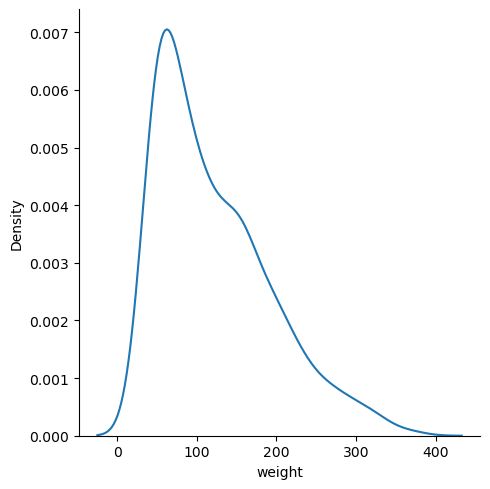

In [5]:
# Plot the distribution of the chickens' weight
sns.displot(data=chicken_data, x='weight', kind="kde")
plt.show()

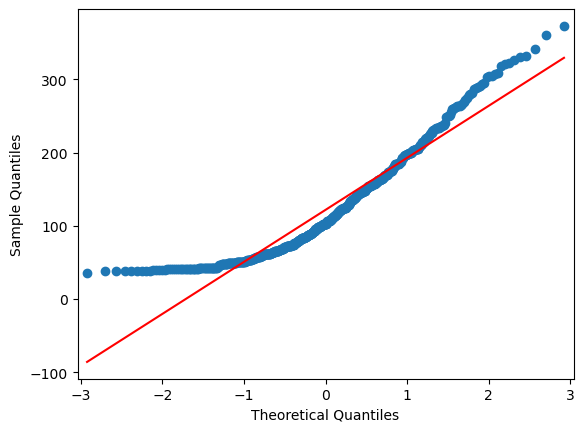

In [6]:
from statsmodels.graphics.gofplots import qqplot

# Plot the qq plot of the chickens' weight
qqplot(data=chicken_data['weight'], line='s')
plt.show()

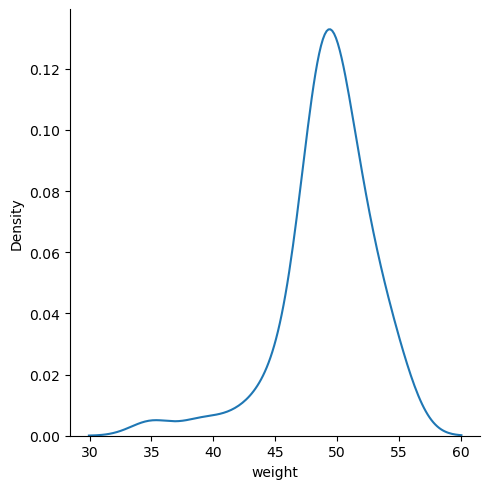

In [7]:
# Subset the data and plot the weight of the subset
subset_data = chicken_data[chicken_data['Time'] == 2]

sns.displot(data=subset_data, x='weight', kind="kde")
plt.show()

In [8]:
from scipy.stats import shapiro

# Run a Shapiro-Wilk normality test on the weight column
test_statistic, p_value = shapiro(chicken_data['weight'])

print(f"p: {round(p_value, 4)} test stat: {round(test_statistic, 4)}")

p: 0.0 test stat: 0.9087


In [9]:
from scipy.stats import anderson

# Run the Anderson-Darling test
result = anderson(chicken_data['weight'], dist='norm')

print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 14.6868
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.572 0.652 0.782 0.912 1.085]


## Factorial Design

Factorial Design is an experimental setup where you test the effects of two or more independent variables (called factors) simultaneously. More importantly, it allows you to see if these factors interact with each other. In this setup, every possible combination of factor levels is tested.

The key question it helps you answer is not just _"Does factor A have an effect?"_ and _"Does factor B have an effect?"_, but also the crucial question:
_"Does the effect of factor A depend on the level of factor B?"_

Imagine you run a fish farm in Port Harcourt and want to find the best way to grow catfish quickly. You suspect two factors are important: the type of feed and the water temperature.

Factor A: Feed Type

1. Level 1: Standard Feed

2. Level 2: Protein-Enriched Feed

Factor B: Water Temperature

1. Level 1: Normal (ambient) Temperature

2. Level 2: Heated Temperature

A simple (but inefficient) approach would be to test one factor at a time. A factorial design says: let's test all possible combinations at once!

This creates a 2x2 Factorial Design (2 levels of Factor A x 2 levels of Factor B), resulting in 4 unique experimental groups:

Group 1: Standard Feed + Normal Temperature

Group 2: Standard Feed + Heated Temperature

Group 3: Protein-Enriched Feed + Normal Temperature

Group 4: Protein-Enriched Feed + Heated Temperature

You would then randomly assign your fish tanks to one of these four groups and measure the fish growth (your dependent variable) after a set period.

Why This is Powerful: Discovering Interactions
After running the experiment, you can find out three things:

1. __Main Effect of Feed__: On average, does the protein-enriched feed lead to more growth than the standard feed, regardless of temperature?

2. __Main Effect of Temperature__: On average, does heated water lead to more growth than normal water, regardless of the feed?

3. __Interaction Effect__: This is the most interesting part. An interaction would occur if, for example, the protein-enriched feed works amazingly well but only in heated water, and has little effect in normal water. The two factors work together to produce a super-additive effect. A one-factor-at-a-time experiment would have completely missed this crucial insight!

Interactions indicate how the effect of one factor varies with the level of another factor

__Factorial Designs vs. Randomized Block Designs__

Factorial designs investigate multiple treatments and thier interactions to understand their combined effects on outcomes. In factorial designs, units experience all treatment combinations, offering thorough exploration, but require more subjects as treatment grow.

Randomized block designs utilize blocks to group similar subjects. The focus of randomized block design is on enhancing experimental precision by managing within-block variability, aiding in detection of treatment differences. it assigns one treatment per unit within block

In [10]:
marketing_data = pd.read_feather(r"C:\Users\Odinaka Ekemezie\Downloads\marketing_data.feather")

In [11]:
## Factorial Design

# Create a pivot table for marketing campaign data
marketing_pivot = marketing_data.pivot_table(
  values='Conversions', 
  index='Messaging_Style', 
  columns='Time_of_Day', 
  aggfunc='mean')

# View the pivoted results
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


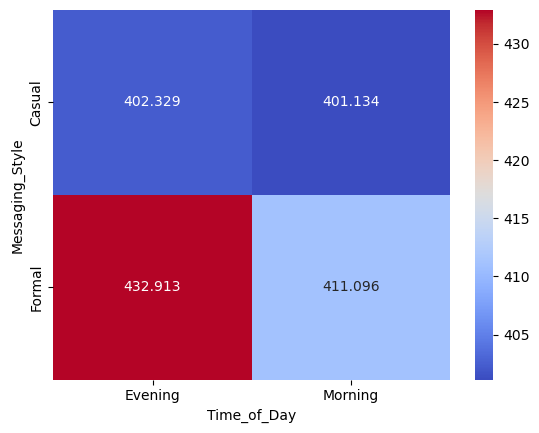

In [12]:
# Visualize interactions with a heatmap
sns.heatmap(marketing_pivot, 
         annot=True, 
         cmap='coolwarm',
         fmt='g')

plt.show()

## Randomized Block Design

Blocking involves grouping experimental units with similar characteristics to minimize variance within these groups. This ensures that each block, representing a specific level of the blocking factor,receives every treatment. This approach allows us to focus on treatment effects, controlling block effects.

In [13]:
from numpy import nan
productivity = pd.DataFrame({'subject_id': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 122, 122: 123, 123: 124, 124: 125, 125: 126, 126: 127, 127: 128, 128: 129, 129: 130, 130: 131, 131: 132, 132: 133, 133: 134, 134: 135, 135: 136, 136: 137, 137: 138, 138: 139, 139: 140, 140: 141, 141: 142, 142: 143, 143: 144, 144: 145, 145: 146, 146: 147, 147: 148, 148: 149, 149: 150, 150: 151, 151: 152, 152: 153, 153: 154, 154: 155, 155: 156, 156: 157, 157: 158, 158: 159, 159: 160, 160: 161, 161: 162, 162: 163, 163: 164, 164: 165, 165: 166, 166: 167, 167: 168, 168: 169, 169: 170, 170: 171, 171: 172, 172: 173, 173: 174, 174: 175, 175: 176, 176: 177, 177: 178, 178: 179, 179: 180, 180: 181, 181: 182, 182: 183, 183: 184, 184: 185, 185: 186, 186: 187, 187: 188, 188: 189, 189: 190, 190: 191, 191: 192, 192: 193, 193: 194, 194: 195, 195: 196, 196: 197, 197: 198, 198: 199, 199: 200, 200: 201, 201: 202, 202: 203, 203: 204, 204: 205, 205: 206, 206: 207, 207: 208, 208: 209, 209: 210, 210: 211, 211: 212, 212: 213, 213: 214, 214: 215, 215: 216, 216: 217, 217: 218, 218: 219, 219: 220, 220: 221, 221: 222, 222: 223, 223: 224, 224: 225, 225: 226, 226: 227, 227: 228, 228: 229, 229: 230, 230: 231, 231: 232, 232: 233, 233: 234, 234: 235, 235: 236, 236: 237, 237: 238, 238: 239, 239: 240, 240: 241, 241: 242, 242: 243, 243: 244, 244: 245, 245: 246, 246: 247, 247: 248, 248: 249, 249: 250, 250: 251, 251: 252, 252: 253, 253: 254, 254: 255, 255: 256, 256: 257, 257: 258, 258: 259, 259: 260, 260: 261, 261: 262, 262: 263, 263: 264, 264: 265, 265: 266, 266: 267, 267: 268, 268: 269, 269: 270, 270: 271, 271: 272, 272: 273, 273: 274, 274: 275, 275: 276, 276: 277, 277: 278, 278: 279, 279: 280, 280: 281, 281: 282, 282: 283, 283: 284, 284: 285, 285: 286, 286: 287, 287: 288, 288: 289, 289: 290, 290: 291, 291: 292, 292: 293, 293: 294, 294: 295, 295: 296, 296: 297, 297: 298, 298: 299, 299: 300, 300: 301, 301: 302, 302: 303, 303: 304, 304: 305, 305: 306, 306: 307, 307: 308, 308: 309, 309: 310, 310: 311, 311: 312, 312: 313, 313: 314, 314: 315, 315: 316, 316: 317, 317: 318, 318: 319, 319: 320, 320: 321, 321: 322, 322: 323, 323: 324, 324: 325, 325: 326, 326: 327, 327: 328, 328: 329, 329: 330, 330: 331, 331: 332, 332: 333, 333: 334, 334: 335, 335: 336, 336: 337, 337: 338, 338: 339, 339: 340, 340: 341, 341: 342, 342: 343, 343: 344, 344: 345, 345: 346, 346: 347, 347: 348, 348: 349, 349: 350, 350: 351, 351: 352, 352: 353, 353: 354, 354: 355, 355: 356, 356: 357, 357: 358, 358: 359, 359: 360, 360: 361, 361: 362, 362: 363, 363: 364, 364: 365, 365: 366, 366: 367, 367: 368, 368: 369, 369: 370, 370: 371, 371: 372, 372: 373, 373: 374, 374: 375, 375: 376, 376: 377, 377: 378, 378: 379, 379: 380, 380: 381, 381: 382, 382: 383, 383: 384, 384: 385, 385: 386, 386: 387, 387: 388, 388: 389, 389: 390, 390: 391, 391: 392, 392: 393, 393: 394, 394: 395, 395: 396, 396: 397, 397: 398, 398: 399, 399: 400, 400: 401, 401: 402, 402: 403, 403: 404, 404: 405, 405: 406, 406: 407, 407: 408, 408: 409, 409: 410, 410: 411, 411: 412, 412: 413, 413: 414, 414: 415, 415: 416, 416: 417, 417: 418, 418: 419, 419: 420, 420: 421, 421: 422, 422: 423, 423: 424, 424: 425, 425: 426, 426: 427, 427: 428, 428: 429, 429: 430, 430: 431, 431: 432, 432: 433, 433: 434, 434: 435, 435: 436, 436: 437, 437: 438, 438: 439, 439: 440, 440: 441, 441: 442, 442: 443, 443: 444, 444: 445, 445: 446, 446: 447, 447: 448, 448: 449, 449: 450, 450: 451, 451: 452, 452: 453, 453: 454, 454: 455, 455: 456, 456: 457, 457: 458, 458: 459, 459: 460, 460: 461, 461: 462, 462: 463, 463: 464, 464: 465, 465: 466, 466: 467, 467: 468, 468: 469, 469: 470, 470: 471, 471: 472, 472: 473, 473: 474, 474: 475, 475: 476, 476: 477, 477: 478, 478: 479, 479: 480, 480: 481, 481: 482, 482: 483, 483: 484, 484: 485, 485: 486, 486: 487, 487: 488, 488: 489, 489: 490, 490: 491, 491: 492, 492: 493, 493: 494, 494: 495, 495: 496, 496: 497, 497: 498, 498: 499, 499: 500, 500: 501, 501: 502, 502: 503, 503: 504, 504: 505, 505: 506, 506: 507, 507: 508, 508: 509, 509: 510, 510: 511, 511: 512, 512: 513, 513: 514, 514: 515, 515: 516, 516: 517, 517: 518, 518: 519, 519: 520, 520: 521, 521: 522, 522: 523, 523: 524, 524: 525, 525: 526, 526: 527, 527: 528, 528: 529, 529: 530, 530: 531, 531: 532, 532: 533, 533: 534, 534: 535, 535: 536, 536: 537, 537: 538, 538: 539, 539: 540, 540: 541, 541: 542, 542: 543, 543: 544, 544: 545, 545: 546, 546: 547, 547: 548, 548: 549, 549: 550, 550: 551, 551: 552, 552: 553, 553: 554, 554: 555, 555: 556, 556: 557, 557: 558, 558: 559, 559: 560, 560: 561, 561: 562, 562: 563, 563: 564, 564: 565, 565: 566, 566: 567, 567: 568, 568: 569, 569: 570, 570: 571, 571: 572, 572: 573, 573: 574, 574: 575, 575: 576, 576: 577, 577: 578, 578: 579, 579: 580, 580: 581, 581: 582, 582: 583, 583: 584, 584: 585, 585: 586, 586: 587, 587: 588, 588: 589, 589: 590, 590: 591, 591: 592, 592: 593, 593: 594, 594: 595, 595: 596, 596: 597, 597: 598, 598: 599, 599: 600, 600: 601, 601: 602, 602: 603, 603: 604, 604: 605, 605: 606, 606: 607, 607: 608, 608: 609, 609: 610, 610: 611, 611: 612, 612: 613, 613: 614, 614: 615, 615: 616, 616: 617, 617: 618, 618: 619, 619: 620, 620: 621, 621: 622, 622: 623, 623: 624, 624: 625, 625: 626, 626: 627, 627: 628, 628: 629, 629: 630, 630: 631, 631: 632, 632: 633, 633: 634, 634: 635, 635: 636, 636: 637, 637: 638, 638: 639, 639: 640, 640: 641, 641: 642, 642: 643, 643: 644, 644: 645, 645: 646, 646: 647, 647: 648, 648: 649, 649: 650, 650: 651, 651: 652, 652: 653, 653: 654, 654: 655, 655: 656, 656: 657, 657: 658, 658: 659, 659: 660, 660: 661, 661: 662, 662: 663, 663: 664, 664: 665, 665: 666, 666: 667, 667: 668, 668: 669, 669: 670, 670: 671, 671: 672, 672: 673, 673: 674, 674: 675, 675: 676, 676: 677, 677: 678, 678: 679, 679: 680, 680: 681, 681: 682, 682: 683, 683: 684, 684: 685, 685: 686, 686: 687, 687: 688, 688: 689, 689: 690, 690: 691, 691: 692, 692: 693, 693: 694, 694: 695, 695: 696, 696: 697, 697: 698, 698: 699, 699: 700, 700: 701, 701: 702, 702: 703, 703: 704, 704: 705, 705: 706, 706: 707, 707: 708, 708: 709, 709: 710, 710: 711, 711: 712, 712: 713, 713: 714, 714: 715, 715: 716, 716: 717, 717: 718, 718: 719, 719: 720, 720: 721, 721: 722, 722: 723, 723: 724, 724: 725, 725: 726, 726: 727, 727: 728, 728: 729, 729: 730, 730: 731, 731: 732, 732: 733, 733: 734, 734: 735, 735: 736, 736: 737, 737: 738, 738: 739, 739: 740, 740: 741, 741: 742, 742: 743, 743: 744, 744: 745, 745: 746, 746: 747, 747: 748, 748: 749, 749: 750, 750: 751, 751: 752, 752: 753, 753: 754, 754: 755, 755: 756, 756: 757, 757: 758, 758: 759, 759: 760, 760: 761, 761: 762, 762: 763, 763: 764, 764: 765, 765: 766, 766: 767, 767: 768, 768: 769, 769: 770, 770: 771, 771: 772, 772: 773, 773: 774, 774: 775, 775: 776, 776: 777, 777: 778, 778: 779, 779: 780, 780: 781, 781: 782, 782: 783, 783: 784, 784: 785, 785: 786, 786: 787, 787: 788, 788: 789, 789: 790, 790: 791, 791: 792, 792: 793, 793: 794, 794: 795, 795: 796, 796: 797, 797: 798, 798: 799, 799: 800, 800: 801, 801: 802, 802: 803, 803: 804, 804: 805, 805: 806, 806: 807, 807: 808, 808: 809, 809: 810, 810: 811, 811: 812, 812: 813, 813: 814, 814: 815, 815: 816, 816: 817, 817: 818, 818: 819, 819: 820, 820: 821, 821: 822, 822: 823, 823: 824, 824: 825, 825: 826, 826: 827, 827: 828, 828: 829, 829: 830, 830: 831, 831: 832, 832: 833, 833: 834, 834: 835, 835: 836, 836: 837, 837: 838, 838: 839, 839: 840, 840: 841, 841: 842, 842: 843, 843: 844, 844: 845, 845: 846, 846: 847, 847: 848, 848: 849, 849: 850, 850: 851, 851: 852, 852: 853, 853: 854, 854: 855, 855: 856, 856: 857, 857: 858, 858: 859, 859: 860, 860: 861, 861: 862, 862: 863, 863: 864, 864: 865, 865: 866, 866: 867, 867: 868, 868: 869, 869: 870, 870: 871, 871: 872, 872: 873, 873: 874, 874: 875, 875: 876, 876: 877, 877: 878, 878: 879, 879: 880, 880: 881, 881: 882, 882: 883, 883: 884, 884: 885, 885: 886, 886: 887, 887: 888, 888: 889, 889: 890, 890: 891, 891: 892, 892: 893, 893: 894, 894: 895, 895: 896, 896: 897, 897: 898, 898: 899, 899: 900, 900: 901, 901: 902, 902: 903, 903: 904, 904: 905, 905: 906, 906: 907, 907: 908, 908: 909, 909: 910, 910: 911, 911: 912, 912: 913, 913: 914, 914: 915, 915: 916, 916: 917, 917: 918, 918: 919, 919: 920, 920: 921, 921: 922, 922: 923, 923: 924, 924: 925, 925: 926, 926: 927, 927: 928, 928: 929, 929: 930, 930: 931, 931: 932, 932: 933, 933: 934, 934: 935, 935: 936, 936: 937, 937: 938, 938: 939, 939: 940, 940: 941, 941: 942, 942: 943, 943: 944, 944: 945, 945: 946, 946: 947, 947: 948, 948: 949, 949: 950, 950: 951, 951: 952, 952: 953, 953: 954, 954: 955, 955: 956, 956: 957, 957: 958, 958: 959, 959: 960, 960: 961, 961: 962, 962: 963, 963: 964, 964: 965, 965: 966, 966: 967, 967: 968, 968: 969, 969: 970, 970: 971, 971: 972, 972: 973, 973: 974, 974: 975, 975: 976, 976: 977, 977: 978, 978: 979, 979: 980, 980: 981, 981: 982, 982: 983, 983: 984, 984: 985, 985: 986, 986: 987, 987: 988, 988: 989, 989: 990, 990: 991, 991: 992, 992: 993, 993: 994, 994: 995, 995: 996, 996: 997, 997: 998, 998: 999, 999: 1000, 1000: 1001, 1001: 1002, 1002: 1003, 1003: 1004, 1004: 1005, 1005: 1006, 1006: 1007, 1007: 1008, 1008: 1009, 1009: 1010, 1010: 1011, 1011: 1012, 1012: 1013, 1013: 1014, 1014: 1015, 1015: 1016, 1016: 1017, 1017: 1018, 1018: 1019, 1019: 1020, 1020: 1021, 1021: 1022, 1022: 1023, 1023: 1024, 1024: 1025, 1025: 1026, 1026: 1027, 1027: 1028, 1028: 1029, 1029: 1030, 1030: 1031, 1031: 1032, 1032: 1033, 1033: 1034, 1034: 1035, 1035: 1036, 1036: 1037, 1037: 1038, 1038: 1039, 1039: 1040, 1040: 1041, 1041: 1042, 1042: 1043, 1043: 1044, 1044: 1045, 1045: 1046, 1046: 1047, 1047: 1048, 1048: 1049, 1049: 1050, 1050: 1051, 1051: 1052, 1052: 1053, 1053: 1054, 1054: 1055, 1055: 1056, 1056: 1057, 1057: 1058, 1058: 1059, 1059: 1060, 1060: 1061, 1061: 1062, 1062: 1063, 1063: 1064, 1064: 1065, 1065: 1066, 1066: 1067, 1067: 1068, 1068: 1069, 1069: 1070, 1070: 1071, 1071: 1072, 1072: 1073, 1073: 1074, 1074: 1075, 1075: 1076, 1076: 1077, 1077: 1078, 1078: 1079, 1079: 1080, 1080: 1081, 1081: 1082, 1082: 1083, 1083: 1084, 1084: 1085, 1085: 1086, 1086: 1087, 1087: 1088, 1088: 1089, 1089: 1090, 1090: 1091, 1091: 1092, 1092: 1093, 1093: 1094, 1094: 1095, 1095: 1096, 1096: 1097, 1097: 1098, 1098: 1099, 1099: 1100, 1100: 1101, 1101: 1102, 1102: 1103, 1103: 1104, 1104: 1105, 1105: 1106, 1106: 1107, 1107: 1108, 1108: 1109, 1109: 1110, 1110: 1111, 1111: 1112, 1112: 1113, 1113: 1114, 1114: 1115, 1115: 1116, 1116: 1117, 1117: 1118, 1118: 1119, 1119: 1120, 1120: 1121, 1121: 1122, 1122: 1123, 1123: 1124, 1124: 1125, 1125: 1126, 1126: 1127, 1127: 1128, 1128: 1129, 1129: 1130, 1130: 1131, 1131: 1132, 1132: 1133, 1133: 1134, 1134: 1135, 1135: 1136, 1136: 1137, 1137: 1138, 1138: 1139, 1139: 1140, 1140: 1141, 1141: 1142, 1142: 1143, 1143: 1144, 1144: 1145, 1145: 1146, 1146: 1147, 1147: 1148, 1148: 1149, 1149: 1150, 1150: 1151, 1151: 1152, 1152: 1153, 1153: 1154, 1154: 1155, 1155: 1156, 1156: 1157, 1157: 1158, 1158: 1159, 1159: 1160, 1160: 1161, 1161: 1162, 1162: 1163, 1163: 1164, 1164: 1165, 1165: 1166, 1166: 1167, 1167: 1168, 1168: 1169, 1169: 1170, 1170: 1171, 1171: 1172, 1172: 1173, 1173: 1174, 1174: 1175, 1175: 1176, 1176: 1177, 1177: 1178, 1178: 1179, 1179: 1180, 1180: 1181, 1181: 1182, 1182: 1183, 1183: 1184, 1184: 1185, 1185: 1186, 1186: 1187, 1187: 1188, 1188: 1189, 1189: 1190, 1190: 1191, 1191: 1192, 1192: 1193, 1193: 1194, 1194: 1195, 1195: 1196, 1196: 1197, 1197: 1198, 1198: 1199, 1199: 1200, 1200: 1201, 1201: 1202, 1202: 1203, 1203: 1204, 1204: 1205, 1205: 1206, 1206: 1207, 1207: 1208, 1208: 1209, 1209: 1210, 1210: 1211, 1211: 1212, 1212: 1213, 1213: 1214, 1214: 1215, 1215: 1216, 1216: 1217, 1217: 1218, 1218: 1219, 1219: 1220, 1220: 1221, 1221: 1222, 1222: 1223, 1223: 1224, 1224: 1225, 1225: 1226, 1226: 1227, 1227: 1228, 1228: 1229, 1229: 1230, 1230: 1231, 1231: 1232, 1232: 1233, 1233: 1234, 1234: 1235, 1235: 1236, 1236: 1237, 1237: 1238, 1238: 1239, 1239: 1240, 1240: 1241, 1241: 1242, 1242: 1243, 1243: 1244, 1244: 1245, 1245: 1246, 1246: 1247, 1247: 1248, 1248: 1249, 1249: 1250, 1250: 1251, 1251: 1252, 1252: 1253, 1253: 1254, 1254: 1255, 1255: 1256, 1256: 1257, 1257: 1258, 1258: 1259, 1259: 1260, 1260: 1261, 1261: 1262, 1262: 1263, 1263: 1264, 1264: 1265, 1265: 1266, 1266: 1267, 1267: 1268, 1268: 1269, 1269: 1270, 1270: 1271, 1271: 1272, 1272: 1273, 1273: 1274, 1274: 1275, 1275: 1276, 1276: 1277, 1277: 1278, 1278: 1279, 1279: 1280, 1280: 1281, 1281: 1282, 1282: 1283, 1283: 1284, 1284: 1285, 1285: 1286, 1286: 1287, 1287: 1288, 1288: 1289, 1289: 1290, 1290: 1291, 1291: 1292, 1292: 1293, 1293: 1294, 1294: 1295, 1295: 1296, 1296: 1297, 1297: 1298, 1298: 1299, 1299: 1300}, 'productivity_score': {0: 11.9, 1: 28.6, 2: 22.2, 3: 18.4, 4: 5.5, 5: 5.5, 6: 2.7, 7: 26.1, 8: 18.4, 9: 21.5, 10: 1.6, 11: 29.1, 12: 25.1, 13: 7.2, 14: 6.3, 15: 6.3, 16: 9.8, 17: 16.2, 18: 13.5, 19: 9.4, 20: 18.7, 21: 5.0, 22: 9.5, 23: 11.6, 24: 14.2, 25: 23.8, 26: 6.8, 27: 15.9, 28: 18.2, 29: 2.3, 30: 18.6, 31: 5.9, 32: 2.9, 33: 28.5, 34: 29.0, 35: 24.4, 36: 9.8, 37: 3.8, 38: 20.8, 39: 13.8, 40: 4.5, 41: 15.4, 42: 2.0, 43: 27.4, 44: 8.5, 45: 20.2, 46: 10.0, 47: 16.1, 48: 16.9, 49: 6.4, 50: 29.1, 51: 23.5, 52: 28.2, 53: 26.9, 54: 18.3, 55: 27.7, 56: 3.6, 57: 6.7, 58: 2.3, 59: 10.4, 60: 12.3, 61: 8.9, 62: 25.0, 63: 11.3, 64: 9.1, 65: 16.7, 66: 5.1, 67: 24.3, 68: 3.2, 69: 29.6, 70: 23.4, 71: 6.8, 72: 1.2, 73: 24.6, 74: 21.5, 75: 22.1, 76: 23.4, 77: 3.1, 78: 11.4, 79: 4.4, 80: 26.0, 81: 19.1, 82: 10.6, 83: 2.8, 84: 10.0, 85: 10.4, 86: 22.2, 87: 19.5, 88: 26.7, 89: 14.7, 90: 4.5, 91: 21.7, 92: 23.1, 93: 17.3, 94: 23.4, 95: 15.3, 96: 16.2, 97: 13.4, 98: 1.7, 99: 4.1, 100: 1.9, 101: 19.5, 102: 10.1, 103: 15.7, 104: 27.3, 105: 8.2, 106: 12.9, 107: 22.9, 108: 7.6, 109: 3.2, 110: 9.4, 111: 5.7, 112: 28.0, 113: 24.4, 114: 19.4, 115: 26.3, 116: 24.3, 117: 6.4, 118: 26.9, 119: 16.6, 120: 24.4, 121: 27.0, 122: 10.2, 123: 4.2, 124: 7.6, 125: 13.4, 126: 24.7, 127: 26.0, 128: 1.2, 129: 15.8, 130: 13.1, 131: 7.4, 132: 4.5, 133: 10.8, 134: 28.3, 135: 10.4, 136: 16.0, 137: 21.4, 138: 11.5, 139: 29.2, 140: 28.9, 141: 8.3, 142: 15.4, 143: 9.7, 144: 9.3, 145: 2.1, 146: 18.7, 147: 15.6, 148: 2.5, 149: 9.1, 150: 27.3, 151: 7.9, 152: 5.2, 153: 15.2, 154: 29.6, 155: 8.0, 156: 20.5, 157: 23.1, 158: 7.9, 159: 22.1, 160: 11.7, 161: 19.3, 162: 19.4, 163: 16.5, 164: 3.6, 165: 25.2, 166: 10.3, 167: 6.4, 168: 2.2, 169: 18.1, 170: 20.6, 171: 1.5, 172: 15.9, 173: 7.6, 174: 19.7, 175: 6.1, 176: 21.0, 177: 12.2, 178: 28.2, 179: 5.0, 180: 10.9, 181: 4.3, 182: 27.8, 183: 26.4, 184: 8.5, 185: 20.1, 186: 24.7, 187: 17.1, 188: 16.4, 189: 8.0, 190: 3.7, 191: 27.0, 192: 27.1, 193: 19.4, 194: 10.8, 195: 11.1, 196: 22.1, 197: 27.0, 198: 26.7, 199: 23.6, 200: 19.6, 201: 3.4, 202: 5.7, 203: 27.1, 204: 18.6, 205: 1.3, 206: 3.9, 207: 20.2, 208: 1.1, 209: 5.7, 210: 16.9, 211: 21.1, 212: 19.9, 213: 7.5, 214: 21.7, 215: 7.9, 216: 10.4, 217: 22.6, 218: 19.8, 219: 25.6, 220: 20.1, 221: 17.5, 222: 3.7, 223: 11.7, 224: 8.7, 225: 8.1, 226: 29.2, 227: 12.4, 228: 26.9, 229: 19.3, 230: 24.0, 231: 15.6, 232: 17.7, 233: 15.3, 234: 6.7, 235: 22.0, 236: 9.1, 237: 1.7, 238: 19.7, 239: 6.1, 240: 28.3, 241: 28.7, 242: 27.5, 243: 11.7, 244: 1.4, 245: 27.9, 246: 13.4, 247: 29.0, 248: 28.9, 249: 25.7, 250: 9.5, 251: 12.2, 252: 25.7, 253: 10.2, 254: 5.9, 255: 17.1, 256: 28.1, 257: 21.2, 258: 17.5, 259: 3.8, 260: 18.8, 261: 29.7, 262: 5.1, 263: 16.0, 264: 26.4, 265: 22.5, 266: 21.2, 267: 21.4, 268: 11.4, 269: 9.5, 270: 24.5, 271: 24.5, 272: 26.1, 273: 27.5, 274: 15.8, 275: 15.5, 276: 24.2, 277: 19.8, 278: 21.4, 279: 24.1, 280: 26.8, 281: 10.8, 282: 11.9, 283: 3.7, 284: 17.8, 285: 2.0, 286: 14.5, 287: 16.7, 288: 9.3, 289: 18.1, 290: 1.9, 291: 2.1, 292: 24.9, 293: 11.4, 294: 4.7, 295: 16.1, 296: 23.3, 297: 7.3, 298: 19.1, 299: 3.5, 300: 2.5, 301: 16.4, 302: 16.7, 303: 19.5, 304: 22.1, 305: 29.3, 306: 16.0, 307: 10.4, 308: 24.1, 309: 8.9, 310: 13.7, 311: 3.3, 312: 1.7, 313: 28.9, 314: 25.2, 315: 21.2, 316: 12.9, 317: 6.0, 318: 5.5, 319: 8.3, 320: 16.9, 321: 21.7, 322: 20.1, 323: 9.1, 324: 28.7, 325: 22.4, 326: 17.1, 327: 18.7, 328: 13.2, 329: 8.2, 330: 11.3, 331: 23.0, 332: 1.4, 333: 4.4, 334: 2.3, 335: 2.2, 336: 25.8, 337: 21.4, 338: 14.8, 339: 3.8, 340: 15.3, 341: 14.7, 342: 6.0, 343: 13.6, 344: 12.6, 345: 18.9, 346: 19.4, 347: 2.3, 348: 11.9, 349: 19.1, 350: 15.6, 351: 25.8, 352: 20.1, 353: 5.7, 354: 3.0, 355: 19.6, 356: 1.8, 357: 18.0, 358: 28.3, 359: 17.7, 360: 12.3, 361: 19.7, 362: 14.3, 363: 16.8, 364: 28.3, 365: 12.2, 366: 28.9, 367: 27.3, 368: 6.7, 369: 3.0, 370: 3.9, 371: 1.5, 372: 3.7, 373: 20.8, 374: 3.1, 375: 10.3, 376: 25.5, 377: 1.7, 378: 24.6, 379: 9.2, 380: 4.4, 381: 21.2, 382: 19.2, 383: 26.4, 384: 22.3, 385: 24.3, 386: 9.2, 387: 6.1, 388: 22.8, 389: 24.4, 390: 29.7, 391: 13.0, 392: 11.8, 393: 23.5, 394: 10.9, 395: 28.0, 396: 25.9, 397: 13.4, 398: 22.8, 399: 22.9, 400: 4.0, 401: 27.2, 402: 15.7, 403: 25.0, 404: 10.3, 405: 27.0, 406: 12.3, 407: 1.3, 408: 27.3, 409: 3.6, 410: 10.3, 411: 28.6, 412: 28.6, 413: 17.6, 414: 19.3, 415: 14.0, 416: 9.5, 417: 10.5, 418: 20.5, 419: 22.8, 420: 24.0, 421: 23.9, 422: 3.6, 423: 15.3, 424: 2.7, 425: 16.9, 426: 13.8, 427: 26.7, 428: 11.2, 429: 4.4, 430: 5.1, 431: 23.1, 432: 18.9, 433: 3.9, 434: 3.4, 435: 21.3, 436: 3.1, 437: 24.8, 438: 21.5, 439: 3.4, 440: 3.5, 441: 29.6, 442: 11.9, 443: 11.7, 444: 24.6, 445: 28.5, 446: 29.6, 447: 22.8, 448: 11.9, 449: 3.4, 450: 23.5, 451: 17.2, 452: 13.3, 453: 27.3, 454: 4.2, 455: 15.3, 456: 1.3, 457: 14.6, 458: 2.6, 459: 4.4, 460: 4.4, 461: 19.8, 462: 22.6, 463: 17.9, 464: 28.9, 465: 11.9, 466: 9.3, 467: 26.2, 468: 7.5, 469: 28.9, 470: 1.4, 471: 29.1, 472: 2.3, 473: 26.8, 474: 16.3, 475: 29.8, 476: 3.1, 477: 17.1, 478: 29.1, 479: 16.2, 480: 19.3, 481: 21.2, 482: 14.2, 483: 19.2, 484: 17.9, 485: 27.1, 486: 2.3, 487: 9.1, 488: 28.6, 489: 26.8, 490: 14.2, 491: 19.0, 492: 9.0, 493: 6.5, 494: 14.4, 495: 11.2, 496: 17.9, 497: 3.3, 498: 29.3, 499: 29.6, 500: 21.2, 501: 16.5, 502: 10.0, 503: 24.6, 504: 20.9, 505: 5.7, 506: 27.4, 507: 24.9, 508: 28.5, 509: 22.0, 510: 18.8, 511: 13.1, 512: 28.0, 513: 26.1, 514: 2.3, 515: 1.8, 516: 11.9, 517: 24.5, 518: 29.6, 519: 5.4, 520: 18.2, 521: 12.0, 522: 29.1, 523: 25.4, 524: 25.3, 525: 14.6, 526: 13.0, 527: 8.9, 528: 2.6, 529: 26.1, 530: 24.6, 531: 30.0, 532: 29.9, 533: 17.1, 534: 23.3, 535: 28.4, 536: 25.6, 537: 8.2, 538: 14.1, 539: 4.7, 540: 28.7, 541: 18.6, 542: 7.6, 543: 20.5, 544: 18.9, 545: 11.4, 546: 4.3, 547: 20.5, 548: 16.1, 549: 23.4, 550: 16.1, 551: 25.7, 552: 17.0, 553: 17.3, 554: 26.4, 555: 12.7, 556: 4.9, 557: 1.8, 558: 22.9, 559: 19.0, 560: 21.4, 561: 7.2, 562: 5.0, 563: 1.4, 564: 11.2, 565: 18.1, 566: 12.4, 567: 13.7, 568: 27.2, 569: 11.1, 570: 15.9, 571: 23.7, 572: 12.5, 573: 19.0, 574: 26.0, 575: 28.5, 576: 5.3, 577: 27.9, 578: 15.3, 579: 8.5, 580: 14.3, 581: 29.4, 582: 15.3, 583: 10.5, 584: 19.4, 585: 8.0, 586: 3.2, 587: 4.7, 588: 4.7, 589: 5.4, 590: 5.0, 591: 19.6, 592: 6.3, 593: 11.0, 594: 27.0, 595: 14.7, 596: 20.4, 597: 6.0, 598: 6.6, 599: 2.2, 600: 5.9, 601: 9.1, 602: 6.1, 603: 3.6, 604: 4.5, 605: 14.4, 606: 7.0, 607: 11.6, 608: 15.6, 609: 21.0, 610: 2.1, 611: 24.2, 612: 19.2, 613: 3.4, 614: 26.3, 615: 27.7, 616: 2.8, 617: 9.0, 618: 24.4, 619: 22.7, 620: 6.4, 621: 7.1, 622: 11.7, 623: 15.1, 624: 18.9, 625: 11.7, 626: 14.4, 627: 22.7, 628: 2.1, 629: 8.3, 630: 21.7, 631: 27.0, 632: 15.8, 633: 16.4, 634: 4.1, 635: 14.0, 636: 16.4, 637: 8.0, 638: 8.8, 639: 11.9, 640: 1.6, 641: 10.3, 642: 7.1, 643: 10.5, 644: 4.5, 645: 26.8, 646: 18.2, 647: 20.7, 648: 23.9, 649: 15.5, 650: 3.5, 651: 16.6, 652: 18.0, 653: 22.6, 654: 13.5, 655: 4.7, 656: 9.2, 657: 11.5, 658: 19.7, 659: 17.6, 660: 11.3, 661: 29.6, 662: 18.6, 663: 7.9, 664: 4.0, 665: 5.4, 666: 8.1, 667: 5.7, 668: 6.4, 669: 9.3, 670: 6.0, 671: 27.0, 672: 3.3, 673: 16.2, 674: 12.9, 675: 29.5, 676: 4.2, 677: 12.5, 678: 29.1, 679: 26.1, 680: 24.7, 681: 8.5, 682: 6.0, 683: 20.4, 684: 28.0, 685: 17.1, 686: 17.6, 687: 9.1, 688: 23.3, 689: 6.4, 690: 10.4, 691: 13.3, 692: 15.7, 693: 8.0, 694: 4.3, 695: 18.7, 696: 9.4, 697: 17.9, 698: 5.5, 699: 15.0, 700: 16.4, 701: 2.5, 702: 10.8, 703: 4.9, 704: 2.8, 705: 29.7, 706: 10.3, 707: 24.5, 708: 8.4, 709: 20.8, 710: 23.0, 711: 18.3, 712: 14.7, 713: 12.9, 714: 11.1, 715: 28.0, 716: 25.1, 717: 29.0, 718: 4.6, 719: 22.2, 720: 28.2, 721: 6.3, 722: 2.9, 723: 22.5, 724: 17.7, 725: 25.4, 726: 5.1, 727: 24.1, 728: 6.8, 729: 5.7, 730: 5.8, 731: 24.6, 732: 20.3, 733: 16.2, 734: 11.4, 735: 26.4, 736: 12.4, 737: 24.7, 738: 13.7, 739: 11.9, 740: 14.4, 741: 9.7, 742: 22.7, 743: 15.6, 744: 7.7, 745: 27.1, 746: 12.1, 747: 16.8, 748: 27.3, 749: 19.1, 750: 4.4, 751: 28.3, 752: 19.2, 753: 10.7, 754: 5.0, 755: 24.0, 756: 19.0, 757: 16.5, 758: 26.9, 759: 23.9, 760: 5.4, 761: 10.0, 762: 8.2, 763: 22.6, 764: 2.0, 765: 17.5, 766: 23.1, 767: 26.4, 768: 10.9, 769: 24.8, 770: 4.2, 771: 25.5, 772: 4.7, 773: 12.5, 774: 24.1, 775: 5.3, 776: 7.6, 777: 21.9, 778: 21.9, 779: 19.6, 780: 21.1, 781: 16.7, 782: 8.3, 783: 11.0, 784: 6.3, 785: 27.3, 786: 17.9, 787: 12.6, 788: 14.4, 789: 28.5, 790: 5.4, 791: 18.0, 792: 15.7, 793: 18.7, 794: 1.5, 795: 26.3, 796: 28.0, 797: 17.4, 798: 21.2, 799: 27.8, 800: 21.5, 801: 5.4, 802: 17.7, 803: 18.6, 804: 13.3, 805: 22.4, 806: 28.1, 807: 27.8, 808: 14.1, 809: 4.3, 810: 29.6, 811: 25.3, 812: 4.6, 813: 27.7, 814: 26.2, 815: 16.0, 816: 18.1, 817: 12.6, 818: 2.6, 819: 10.7, 820: 24.3, 821: 1.1, 822: 10.7, 823: 12.5, 824: 16.6, 825: 27.7, 826: 11.0, 827: 11.1, 828: 22.4, 829: 14.1, 830: 7.5, 831: 14.1, 832: 5.1, 833: 6.1, 834: 15.5, 835: 13.1, 836: 27.5, 837: 11.5, 838: 17.8, 839: 19.3, 840: 1.4, 841: 20.2, 842: 6.2, 843: 28.9, 844: 5.3, 845: 13.0, 846: 3.5, 847: 29.9, 848: 15.6, 849: 18.3, 850: 2.9, 851: 22.7, 852: 7.1, 853: 27.0, 854: 6.9, 855: 6.5, 856: 2.1, 857: 14.7, 858: 17.4, 859: 2.9, 860: 23.5, 861: 14.1, 862: 16.2, 863: 13.8, 864: 12.6, 865: 17.2, 866: 5.5, 867: 6.3, 868: 26.0, 869: 28.4, 870: 11.8, 871: 8.9, 872: 19.7, 873: 12.9, 874: 1.7, 875: 5.5, 876: 21.8, 877: 20.1, 878: 1.8, 879: 7.4, 880: 7.7, 881: 20.5, 882: 1.6, 883: 4.0, 884: 24.2, 885: 6.2, 886: 19.9, 887: 7.9, 888: 3.9, 889: 8.1, 890: 21.9, 891: 25.8, 892: 25.1, 893: 12.5, 894: 20.4, 895: 6.9, 896: 9.5, 897: 27.0, 898: 1.4, 899: 3.5, 900: 7.0, 901: 1.8, 902: 6.3, 903: 17.9, 904: 13.2, 905: 26.9, 906: 24.7, 907: 10.9, 908: 8.5, 909: 12.0, 910: 18.1, 911: 8.8, 912: 19.1, 913: 12.9, 914: 17.0, 915: 13.6, 916: 9.5, 917: 28.5, 918: 23.1, 919: 5.1, 920: 26.2, 921: 15.1, 922: 26.9, 923: 24.2, 924: 13.3, 925: 1.7, 926: 8.8, 927: 16.7, 928: 19.4, 929: 8.5, 930: 5.0, 931: 25.2, 932: 29.5, 933: 16.2, 934: 6.0, 935: 8.9, 936: 1.5, 937: 27.5, 938: 4.4, 939: 17.7, 940: 8.9, 941: 17.1, 942: 19.9, 943: 25.1, 944: 7.0, 945: 1.3, 946: 5.0, 947: 27.1, 948: 26.3, 949: 18.3, 950: 18.4, 951: 20.3, 952: 6.1, 953: 27.5, 954: 13.1, 955: 12.1, 956: 16.0, 957: 2.4, 958: 5.8, 959: 22.4, 960: 3.4, 961: 18.5, 962: 8.1, 963: 12.3, 964: 9.4, 965: 11.3, 966: 21.9, 967: 9.6, 968: 17.4, 969: 14.8, 970: 20.2, 971: 28.2, 972: 22.2, 973: 7.2, 974: 1.9, 975: 8.6, 976: 18.3, 977: 2.5, 978: 15.4, 979: 18.3, 980: 10.7, 981: 23.4, 982: 4.1, 983: 3.2, 984: 22.1, 985: 15.4, 986: 21.0, 987: 13.6, 988: 8.1, 989: 24.8, 990: 24.2, 991: 21.1, 992: 8.9, 993: 18.1, 994: 11.5, 995: 3.7, 996: 27.6, 997: 5.0, 998: 28.6, 999: 13.9, 1000: 6.4, 1001: 16.7, 1002: 26.3, 1003: 22.2, 1004: 24.4, 1005: 20.1, 1006: 21.1, 1007: 25.6, 1008: 8.2, 1009: 15.2, 1010: 7.4, 1011: 29.6, 1012: 28.4, 1013: 2.1, 1014: 21.5, 1015: 27.8, 1016: 6.2, 1017: 17.5, 1018: 27.5, 1019: 2.0, 1020: 21.2, 1021: 9.6, 1022: 27.8, 1023: 29.2, 1024: 28.4, 1025: 14.8, 1026: 26.0, 1027: 25.5, 1028: 10.3, 1029: 25.0, 1030: 2.1, 1031: 18.3, 1032: 7.7, 1033: 4.5, 1034: 3.2, 1035: 21.2, 1036: 10.9, 1037: 22.0, 1038: 2.9, 1039: 10.1, 1040: 16.6, 1041: 23.9, 1042: 10.2, 1043: 19.2, 1044: 26.7, 1045: 18.9, 1046: 7.8, 1047: 1.7, 1048: 26.2, 1049: 1.6, 1050: 26.4, 1051: 16.3, 1052: 28.2, 1053: 24.2, 1054: 29.9, 1055: 11.2, 1056: 23.2, 1057: 12.7, 1058: 14.9, 1059: 19.2, 1060: 26.3, 1061: 29.5, 1062: 23.3, 1063: 13.1, 1064: 13.2, 1065: 22.4, 1066: 7.9, 1067: 4.2, 1068: 11.3, 1069: 9.3, 1070: 9.6, 1071: 7.8, 1072: 2.2, 1073: 1.5, 1074: 29.6, 1075: 13.4, 1076: 12.1, 1077: 20.7, 1078: 7.3, 1079: 28.5, 1080: 23.8, 1081: 3.6, 1082: 13.1, 1083: 26.5, 1084: 28.4, 1085: 14.6, 1086: 18.8, 1087: 5.8, 1088: 29.7, 1089: 7.7, 1090: 28.3, 1091: 19.8, 1092: 18.6, 1093: 15.9, 1094: 7.7, 1095: 6.1, 1096: 7.4, 1097: 6.4, 1098: 23.6, 1099: 11.2, 1100: 2.7, 1101: 29.1, 1102: 26.6, 1103: 27.9, 1104: 29.9, 1105: 6.0, 1106: 12.5, 1107: 23.0, 1108: 21.2, 1109: 5.5, 1110: 24.7, 1111: 7.5, 1112: 7.5, 1113: 16.6, 1114: 18.2, 1115: 17.8, 1116: 3.7, 1117: 26.4, 1118: 8.7, 1119: 4.8, 1120: 26.8, 1121: 28.7, 1122: 26.0, 1123: 24.5, 1124: 20.0, 1125: 17.0, 1126: 3.5, 1127: 12.8, 1128: 11.8, 1129: 8.5, 1130: 22.0, 1131: 15.4, 1132: 3.4, 1133: 7.4, 1134: 20.8, 1135: 3.2, 1136: 25.7, 1137: 15.4, 1138: 14.9, 1139: 18.2, 1140: 24.9, 1141: 11.1, 1142: 20.7, 1143: 17.4, 1144: 8.7, 1145: 26.5, 1146: 24.1, 1147: 20.1, 1148: 25.7, 1149: 26.2, 1150: 21.5, 1151: 25.3, 1152: 21.2, 1153: 20.7, 1154: 18.9, 1155: 22.8, 1156: 5.6, 1157: 26.5, 1158: 26.3, 1159: 1.8, 1160: 24.9, 1161: 4.7, 1162: 10.7, 1163: 22.6, 1164: 5.7, 1165: 24.7, 1166: 25.1, 1167: 15.7, 1168: 1.2, 1169: 9.3, 1170: 18.9, 1171: 29.5, 1172: 19.3, 1173: 8.5, 1174: 19.4, 1175: 16.7, 1176: 23.6, 1177: 4.1, 1178: 23.1, 1179: 16.7, 1180: 28.9, 1181: 10.9, 1182: 19.3, 1183: 28.0, 1184: 4.0, 1185: 28.2, 1186: 20.9, 1187: 3.0, 1188: 9.7, 1189: 21.5, 1190: 3.0, 1191: 17.9, 1192: 11.0, 1193: 19.0, 1194: 2.3, 1195: 26.3, 1196: 29.2, 1197: 29.1, 1198: 22.7, 1199: 4.8, 1200: 23.0, 1201: 1.7, 1202: 1.6, 1203: 10.4, 1204: 15.2, 1205: 23.3, 1206: 20.8, 1207: 13.9, 1208: 8.9, 1209: 29.9, 1210: 13.4, 1211: 14.1, 1212: 5.7, 1213: 24.0, 1214: 21.1, 1215: 7.4, 1216: 3.4, 1217: 20.7, 1218: 20.0, 1219: 8.9, 1220: 28.6, 1221: 5.4, 1222: 13.5, 1223: 28.4, 1224: 13.2, 1225: 19.5, 1226: 12.5, 1227: 9.0, 1228: 29.5, 1229: 12.9, 1230: 26.9, 1231: 7.7, 1232: 7.2, 1233: 1.9, 1234: 19.9, 1235: 11.7, 1236: 26.1, 1237: 14.7, 1238: 29.1, 1239: 6.4, 1240: 26.2, 1241: 23.5, 1242: 23.4, 1243: 25.5, 1244: 23.1, 1245: 19.2, 1246: 4.8, 1247: 1.9, 1248: 27.7, 1249: 18.9, 1250: 24.1, 1251: 15.0, 1252: 4.4, 1253: 4.6, 1254: 20.9, 1255: 13.5, 1256: 6.8, 1257: 15.3, 1258: 2.9, 1259: 17.9, 1260: 8.8, 1261: 24.1, 1262: 10.0, 1263: 14.2, 1264: 1.3, 1265: 3.1, 1266: 12.4, 1267: 14.9, 1268: 18.4, 1269: 9.5, 1270: 21.2, 1271: 25.9, 1272: 23.6, 1273: 2.1, 1274: 14.9, 1275: 4.0, 1276: 8.0, 1277: 29.6, 1278: 5.1, 1279: 15.5, 1280: 18.9, 1281: 21.4, 1282: 17.2, 1283: 1.3, 1284: 10.5, 1285: 16.0, 1286: 3.5, 1287: 11.2, 1288: 2.0, 1289: 3.3, 1290: 12.5, 1291: 4.8, 1292: 17.5, 1293: 21.0, 1294: 24.2, 1295: 6.8, 1296: 5.9, 1297: 4.0, 1298: 19.5, 1299: 21.5}, 'block': {0: 2, 1: 3, 2: 3, 3: 2, 4: 1, 5: 1, 6: 1, 7: 3, 8: 2, 9: 3, 10: 1, 11: 3, 12: 3, 13: 1, 14: 1, 15: 1, 16: 1, 17: 2, 18: 2, 19: 1, 20: 2, 21: 1, 22: 1, 23: 2, 24: 2, 25: 3, 26: 1, 27: 2, 28: 2, 29: 1, 30: 2, 31: 1, 32: 1, 33: 3, 34: 3, 35: 3, 36: 1, 37: 1, 38: 3, 39: 2, 40: 1, 41: 2, 42: 1, 43: 3, 44: 1, 45: 3, 46: 2, 47: 2, 48: 2, 49: 1, 50: 3, 51: 3, 52: 3, 53: 3, 54: 2, 55: 3, 56: 1, 57: 1, 58: 1, 59: 2, 60: 2, 61: 1, 62: 3, 63: 2, 64: 1, 65: 2, 66: 1, 67: 3, 68: 1, 69: 3, 70: 3, 71: 1, 72: 1, 73: 3, 74: 3, 75: 3, 76: 3, 77: 1, 78: 2, 79: 1, 80: 3, 81: 2, 82: 2, 83: 1, 84: 2, 85: 2, 86: 3, 87: 2, 88: 3, 89: 2, 90: 1, 91: 3, 92: 3, 93: 2, 94: 3, 95: 2, 96: 2, 97: 2, 98: 1, 99: 1, 100: 1, 101: 2, 102: 2, 103: 2, 104: 3, 105: 1, 106: 2, 107: 3, 108: 1, 109: 1, 110: 1, 111: 1, 112: 3, 113: 3, 114: 2, 115: 3, 116: 3, 117: 1, 118: 3, 119: 2, 120: 3, 121: 3, 122: 2, 123: 1, 124: 1, 125: 2, 126: 3, 127: 3, 128: 1, 129: 2, 130: 2, 131: 1, 132: 1, 133: 2, 134: 3, 135: 2, 136: 2, 137: 3, 138: 2, 139: 3, 140: 3, 141: 1, 142: 2, 143: 1, 144: 1, 145: 1, 146: 2, 147: 2, 148: 1, 149: 1, 150: 3, 151: 1, 152: 1, 153: 2, 154: 3, 155: 1, 156: 3, 157: 3, 158: 1, 159: 3, 160: 2, 161: 2, 162: 2, 163: 2, 164: 1, 165: 3, 166: 2, 167: 1, 168: 1, 169: 2, 170: 3, 171: 1, 172: 2, 173: 1, 174: 2, 175: 1, 176: 3, 177: 2, 178: 3, 179: 1, 180: 2, 181: 1, 182: 3, 183: 3, 184: 1, 185: 3, 186: 3, 187: 2, 188: 2, 189: 1, 190: 1, 191: 3, 192: 3, 193: 2, 194: 2, 195: 2, 196: 3, 197: 3, 198: 3, 199: 3, 200: 2, 201: 1, 202: 1, 203: 3, 204: 2, 205: 1, 206: 1, 207: 3, 208: 1, 209: 1, 210: 2, 211: 3, 212: 2, 213: 1, 214: 3, 215: 1, 216: 2, 217: 3, 218: 2, 219: 3, 220: 3, 221: 2, 222: 1, 223: 2, 224: 1, 225: 1, 226: 3, 227: 2, 228: 3, 229: 2, 230: 3, 231: 2, 232: 2, 233: 2, 234: 1, 235: 3, 236: 1, 237: 1, 238: 2, 239: 1, 240: 3, 241: 3, 242: 3, 243: 2, 244: 1, 245: 3, 246: 2, 247: 3, 248: 3, 249: 3, 250: 1, 251: 2, 252: 3, 253: 2, 254: 1, 255: 2, 256: 3, 257: 3, 258: 2, 259: 1, 260: 2, 261: 3, 262: 1, 263: 2, 264: 3, 265: 3, 266: 3, 267: 3, 268: 2, 269: 1, 270: 3, 271: 3, 272: 3, 273: 3, 274: 2, 275: 2, 276: 3, 277: 2, 278: 3, 279: 3, 280: 3, 281: 2, 282: 2, 283: 1, 284: 2, 285: 1, 286: 2, 287: 2, 288: 1, 289: 2, 290: 1, 291: 1, 292: 3, 293: 2, 294: 1, 295: 2, 296: 3, 297: 1, 298: 2, 299: 1, 300: 1, 301: 2, 302: 2, 303: 2, 304: 3, 305: 3, 306: 2, 307: 2, 308: 3, 309: 1, 310: 2, 311: 1, 312: 1, 313: 3, 314: 3, 315: 3, 316: 2, 317: 1, 318: 1, 319: 1, 320: 2, 321: 3, 322: 3, 323: 1, 324: 3, 325: 3, 326: 2, 327: 2, 328: 2, 329: 1, 330: 2, 331: 3, 332: 1, 333: 1, 334: 1, 335: 1, 336: 3, 337: 3, 338: 2, 339: 1, 340: 2, 341: 2, 342: 1, 343: 2, 344: 2, 345: 2, 346: 2, 347: 1, 348: 2, 349: 2, 350: 2, 351: 3, 352: 3, 353: 1, 354: 1, 355: 2, 356: 1, 357: 2, 358: 3, 359: 2, 360: 2, 361: 2, 362: 2, 363: 2, 364: 3, 365: 2, 366: 3, 367: 3, 368: 1, 369: 1, 370: 1, 371: 1, 372: 1, 373: 3, 374: 1, 375: 2, 376: 3, 377: 1, 378: 3, 379: 1, 380: 1, 381: 3, 382: 2, 383: 3, 384: 3, 385: 3, 386: 1, 387: 1, 388: 3, 389: 3, 390: 3, 391: 2, 392: 2, 393: 3, 394: 2, 395: 3, 396: 3, 397: 2, 398: 3, 399: 3, 400: 1, 401: 3, 402: 2, 403: 3, 404: 2, 405: 3, 406: 2, 407: 1, 408: 3, 409: 1, 410: 2, 411: 3, 412: 3, 413: 2, 414: 2, 415: 2, 416: 1, 417: 2, 418: 3, 419: 3, 420: 3, 421: 3, 422: 1, 423: 2, 424: 1, 425: 2, 426: 2, 427: 3, 428: 2, 429: 1, 430: 1, 431: 3, 432: 2, 433: 1, 434: 1, 435: 3, 436: 1, 437: 3, 438: 3, 439: 1, 440: 1, 441: 3, 442: 2, 443: 2, 444: 3, 445: 3, 446: 3, 447: 3, 448: 2, 449: 1, 450: 3, 451: 2, 452: 2, 453: 3, 454: 1, 455: 2, 456: 1, 457: 2, 458: 1, 459: 1, 460: 1, 461: 2, 462: 3, 463: 2, 464: 3, 465: 2, 466: 1, 467: 3, 468: 1, 469: 3, 470: 1, 471: 3, 472: 1, 473: 3, 474: 2, 475: 3, 476: 1, 477: 2, 478: 3, 479: 2, 480: 2, 481: 3, 482: 2, 483: 2, 484: 2, 485: 3, 486: 1, 487: 1, 488: 3, 489: 3, 490: 2, 491: 2, 492: 1, 493: 1, 494: 2, 495: 2, 496: 2, 497: 1, 498: 3, 499: 3, 500: 3, 501: 2, 502: 2, 503: 3, 504: 3, 505: 1, 506: 3, 507: 3, 508: 3, 509: 3, 510: 2, 511: 2, 512: 3, 513: 3, 514: 1, 515: 1, 516: 2, 517: 3, 518: 3, 519: 1, 520: 2, 521: 2, 522: 3, 523: 3, 524: 3, 525: 2, 526: 2, 527: 1, 528: 1, 529: 3, 530: 3, 531: nan, 532: 3, 533: 2, 534: 3, 535: 3, 536: 3, 537: 1, 538: 2, 539: 1, 540: 3, 541: 2, 542: 1, 543: 3, 544: 2, 545: 2, 546: 1, 547: 3, 548: 2, 549: 3, 550: 2, 551: 3, 552: 2, 553: 2, 554: 3, 555: 2, 556: 1, 557: 1, 558: 3, 559: 2, 560: 3, 561: 1, 562: 1, 563: 1, 564: 2, 565: 2, 566: 2, 567: 2, 568: 3, 569: 2, 570: 2, 571: 3, 572: 2, 573: 2, 574: 3, 575: 3, 576: 1, 577: 3, 578: 2, 579: 1, 580: 2, 581: 3, 582: 2, 583: 2, 584: 2, 585: 1, 586: 1, 587: 1, 588: 1, 589: 1, 590: 1, 591: 2, 592: 1, 593: 2, 594: 3, 595: 2, 596: 3, 597: 1, 598: 1, 599: 1, 600: 1, 601: 1, 602: 1, 603: 1, 604: 1, 605: 2, 606: 1, 607: 2, 608: 2, 609: 3, 610: 1, 611: 3, 612: 2, 613: 1, 614: 3, 615: 3, 616: 1, 617: 1, 618: 3, 619: 3, 620: 1, 621: 1, 622: 2, 623: 2, 624: 2, 625: 2, 626: 2, 627: 3, 628: 1, 629: 1, 630: 3, 631: 3, 632: 2, 633: 2, 634: 1, 635: 2, 636: 2, 637: 1, 638: 1, 639: 2, 640: 1, 641: 2, 642: 1, 643: 2, 644: 1, 645: 3, 646: 2, 647: 3, 648: 3, 649: 2, 650: 1, 651: 2, 652: 2, 653: 3, 654: 2, 655: 1, 656: 1, 657: 2, 658: 2, 659: 2, 660: 2, 661: 3, 662: 2, 663: 1, 664: 1, 665: 1, 666: 1, 667: 1, 668: 1, 669: 1, 670: 1, 671: 3, 672: 1, 673: 2, 674: 2, 675: 3, 676: 1, 677: 2, 678: 3, 679: 3, 680: 3, 681: 1, 682: 1, 683: 3, 684: 3, 685: 2, 686: 2, 687: 1, 688: 3, 689: 1, 690: 2, 691: 2, 692: 2, 693: 1, 694: 1, 695: 2, 696: 1, 697: 2, 698: 1, 699: 2, 700: 2, 701: 1, 702: 2, 703: 1, 704: 1, 705: 3, 706: 2, 707: 3, 708: 1, 709: 3, 710: 3, 711: 2, 712: 2, 713: 2, 714: 2, 715: 3, 716: 3, 717: 3, 718: 1, 719: 3, 720: 3, 721: 1, 722: 1, 723: 3, 724: 2, 725: 3, 726: 1, 727: 3, 728: 1, 729: 1, 730: 1, 731: 3, 732: 3, 733: 2, 734: 2, 735: 3, 736: 2, 737: 3, 738: 2, 739: 2, 740: 2, 741: 1, 742: 3, 743: 2, 744: 1, 745: 3, 746: 2, 747: 2, 748: 3, 749: 2, 750: 1, 751: 3, 752: 2, 753: 2, 754: 1, 755: 3, 756: 2, 757: 2, 758: 3, 759: 3, 760: 1, 761: 2, 762: 1, 763: 3, 764: 1, 765: 2, 766: 3, 767: 3, 768: 2, 769: 3, 770: 1, 771: 3, 772: 1, 773: 2, 774: 3, 775: 1, 776: 1, 777: 3, 778: 3, 779: 2, 780: 3, 781: 2, 782: 1, 783: 2, 784: 1, 785: 3, 786: 2, 787: 2, 788: 2, 789: 3, 790: 1, 791: 2, 792: 2, 793: 2, 794: 1, 795: 3, 796: 3, 797: 2, 798: 3, 799: 3, 800: 3, 801: 1, 802: 2, 803: 2, 804: 2, 805: 3, 806: 3, 807: 3, 808: 2, 809: 1, 810: 3, 811: 3, 812: 1, 813: 3, 814: 3, 815: 2, 816: 2, 817: 2, 818: 1, 819: 2, 820: 3, 821: 1, 822: 2, 823: 2, 824: 2, 825: 3, 826: 2, 827: 2, 828: 3, 829: 2, 830: 1, 831: 2, 832: 1, 833: 1, 834: 2, 835: 2, 836: 3, 837: 2, 838: 2, 839: 2, 840: 1, 841: 3, 842: 1, 843: 3, 844: 1, 845: 2, 846: 1, 847: 3, 848: 2, 849: 2, 850: 1, 851: 3, 852: 1, 853: 3, 854: 1, 855: 1, 856: 1, 857: 2, 858: 2, 859: 1, 860: 3, 861: 2, 862: 2, 863: 2, 864: 2, 865: 2, 866: 1, 867: 1, 868: 3, 869: 3, 870: 2, 871: 1, 872: 2, 873: 2, 874: 1, 875: 1, 876: 3, 877: 3, 878: 1, 879: 1, 880: 1, 881: 3, 882: 1, 883: 1, 884: 3, 885: 1, 886: 2, 887: 1, 888: 1, 889: 1, 890: 3, 891: 3, 892: 3, 893: 2, 894: 3, 895: 1, 896: 1, 897: 3, 898: 1, 899: 1, 900: 1, 901: 1, 902: 1, 903: 2, 904: 2, 905: 3, 906: 3, 907: 2, 908: 1, 909: 2, 910: 2, 911: 1, 912: 2, 913: 2, 914: 2, 915: 2, 916: 1, 917: 3, 918: 3, 919: 1, 920: 3, 921: 2, 922: 3, 923: 3, 924: 2, 925: 1, 926: 1, 927: 2, 928: 2, 929: 1, 930: 1, 931: 3, 932: 3, 933: 2, 934: 1, 935: 1, 936: 1, 937: 3, 938: 1, 939: 2, 940: 1, 941: 2, 942: 2, 943: 3, 944: 1, 945: 1, 946: 1, 947: 3, 948: 3, 949: 2, 950: 2, 951: 3, 952: 1, 953: 3, 954: 2, 955: 2, 956: 2, 957: 1, 958: 1, 959: 3, 960: 1, 961: 2, 962: 1, 963: 2, 964: 1, 965: 2, 966: 3, 967: 1, 968: 2, 969: 2, 970: 3, 971: 3, 972: 3, 973: 1, 974: 1, 975: 1, 976: 2, 977: 1, 978: 2, 979: 2, 980: 2, 981: 3, 982: 1, 983: 1, 984: 3, 985: 2, 986: 3, 987: 2, 988: 1, 989: 3, 990: 3, 991: 3, 992: 1, 993: 2, 994: 2, 995: 1, 996: 3, 997: 1, 998: 3, 999: 2, 1000: 1, 1001: 2, 1002: 3, 1003: 3, 1004: 3, 1005: 3, 1006: 3, 1007: 3, 1008: 1, 1009: 2, 1010: 1, 1011: 3, 1012: 3, 1013: 1, 1014: 3, 1015: 3, 1016: 1, 1017: 2, 1018: 3, 1019: 1, 1020: 3, 1021: 1, 1022: 3, 1023: 3, 1024: 3, 1025: 2, 1026: 3, 1027: 3, 1028: 2, 1029: 3, 1030: 1, 1031: 2, 1032: 1, 1033: 1, 1034: 1, 1035: 3, 1036: 2, 1037: 3, 1038: 1, 1039: 2, 1040: 2, 1041: 3, 1042: 2, 1043: 2, 1044: 3, 1045: 2, 1046: 1, 1047: 1, 1048: 3, 1049: 1, 1050: 3, 1051: 2, 1052: 3, 1053: 3, 1054: 3, 1055: 2, 1056: 3, 1057: 2, 1058: 2, 1059: 2, 1060: 3, 1061: 3, 1062: 3, 1063: 2, 1064: 2, 1065: 3, 1066: 1, 1067: 1, 1068: 2, 1069: 1, 1070: 1, 1071: 1, 1072: 1, 1073: 1, 1074: 3, 1075: 2, 1076: 2, 1077: 3, 1078: 1, 1079: 3, 1080: 3, 1081: 1, 1082: 2, 1083: 3, 1084: 3, 1085: 2, 1086: 2, 1087: 1, 1088: 3, 1089: 1, 1090: 3, 1091: 2, 1092: 2, 1093: 2, 1094: 1, 1095: 1, 1096: 1, 1097: 1, 1098: 3, 1099: 2, 1100: 1, 1101: 3, 1102: 3, 1103: 3, 1104: 3, 1105: 1, 1106: 2, 1107: 3, 1108: 3, 1109: 1, 1110: 3, 1111: 1, 1112: 1, 1113: 2, 1114: 2, 1115: 2, 1116: 1, 1117: 3, 1118: 1, 1119: 1, 1120: 3, 1121: 3, 1122: 3, 1123: 3, 1124: 3, 1125: 2, 1126: 1, 1127: 2, 1128: 2, 1129: 1, 1130: 3, 1131: 2, 1132: 1, 1133: 1, 1134: 3, 1135: 1, 1136: 3, 1137: 2, 1138: 2, 1139: 2, 1140: 3, 1141: 2, 1142: 3, 1143: 2, 1144: 1, 1145: 3, 1146: 3, 1147: 3, 1148: 3, 1149: 3, 1150: 3, 1151: 3, 1152: 3, 1153: 3, 1154: 2, 1155: 3, 1156: 1, 1157: 3, 1158: 3, 1159: 1, 1160: 3, 1161: 1, 1162: 2, 1163: 3, 1164: 1, 1165: 3, 1166: 3, 1167: 2, 1168: 1, 1169: 1, 1170: 2, 1171: 3, 1172: 2, 1173: 1, 1174: 2, 1175: 2, 1176: 3, 1177: 1, 1178: 3, 1179: 2, 1180: 3, 1181: 2, 1182: 2, 1183: 3, 1184: 1, 1185: 3, 1186: 3, 1187: 1, 1188: 1, 1189: 3, 1190: 1, 1191: 2, 1192: 2, 1193: 2, 1194: 1, 1195: 3, 1196: 3, 1197: 3, 1198: 3, 1199: 1, 1200: 3, 1201: 1, 1202: 1, 1203: 2, 1204: 2, 1205: 3, 1206: 3, 1207: 2, 1208: 1, 1209: 3, 1210: 2, 1211: 2, 1212: 1, 1213: 3, 1214: 3, 1215: 1, 1216: 1, 1217: 3, 1218: 3, 1219: 1, 1220: 3, 1221: 1, 1222: 2, 1223: 3, 1224: 2, 1225: 2, 1226: 2, 1227: 1, 1228: 3, 1229: 2, 1230: 3, 1231: 1, 1232: 1, 1233: 1, 1234: 2, 1235: 2, 1236: 3, 1237: 2, 1238: 3, 1239: 1, 1240: 3, 1241: 3, 1242: 3, 1243: 3, 1244: 3, 1245: 2, 1246: 1, 1247: 1, 1248: 3, 1249: 2, 1250: 3, 1251: 2, 1252: 1, 1253: 1, 1254: 3, 1255: 2, 1256: 1, 1257: 2, 1258: 1, 1259: 2, 1260: 1, 1261: 3, 1262: 2, 1263: 2, 1264: 1, 1265: 1, 1266: 2, 1267: 2, 1268: 2, 1269: 1, 1270: 3, 1271: 3, 1272: 3, 1273: 1, 1274: 2, 1275: 1, 1276: 1, 1277: 3, 1278: 1, 1279: 2, 1280: 2, 1281: 3, 1282: 2, 1283: 1, 1284: 2, 1285: 2, 1286: 1, 1287: 2, 1288: 1, 1289: 1, 1290: 2, 1291: 1, 1292: 2, 1293: 3, 1294: 3, 1295: 1, 1296: 1, 1297: 1, 1298: 2, 1299: 3}})

In [14]:
print(productivity.head())

   subject_id  productivity_score  block
0           1                11.9    2.0
1           2                28.6    3.0
2           3                22.2    3.0
3           4                18.4    2.0
4           5                 5.5    1.0


In [15]:
## Implementing a randomized block design

# Shuffle the blocks to create a new DataFrame called prod_df
prod_df = productivity.groupby('block').apply(
  lambda x: x.sample(frac=1)
)
print(prod_df)

           subject_id  productivity_score  block
block                                           
1.0   854         855                 6.9    1.0
      610         611                 2.1    1.0
      19           20                 9.4    1.0
      650         651                 3.5    1.0
      317         318                 6.0    1.0
...               ...                 ...    ...
3.0   575         576                28.5    3.0
      923         924                24.2    3.0
      894         895                20.4    3.0
      280         281                26.8    3.0
      549         550                23.4    3.0

[1299 rows x 3 columns]


C:\Users\Odinaka Ekemezie\AppData\Local\Temp\ipykernel_4328\530597719.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prod_df = productivity.groupby('block').apply(


In [16]:
# Reset the index so that block is not both an index and a column
prod_df = prod_df.reset_index(drop=True)
print(prod_df)

      subject_id  productivity_score  block
0            855                 6.9    1.0
1            611                 2.1    1.0
2             20                 9.4    1.0
3            651                 3.5    1.0
4            318                 6.0    1.0
...          ...                 ...    ...
1294         576                28.5    3.0
1295         924                24.2    3.0
1296         895                20.4    3.0
1297         281                26.8    3.0
1298         550                23.4    3.0

[1299 rows x 3 columns]


In [17]:
import numpy as np
# Assign treatment randomly
prod_df['Treatment'] = np.random.choice(
  ['Bonus', 'Profit Sharing', 'Work from Home'],
  size=len(prod_df))
print(prod_df)

      subject_id  productivity_score  block       Treatment
0            855                 6.9    1.0  Profit Sharing
1            611                 2.1    1.0           Bonus
2             20                 9.4    1.0           Bonus
3            651                 3.5    1.0  Profit Sharing
4            318                 6.0    1.0  Work from Home
...          ...                 ...    ...             ...
1294         576                28.5    3.0  Profit Sharing
1295         924                24.2    3.0  Work from Home
1296         895                20.4    3.0  Work from Home
1297         281                26.8    3.0  Profit Sharing
1298         550                23.4    3.0           Bonus

[1299 rows x 4 columns]


In [18]:
from scipy.stats import f_oneway

# Perform the within blocks ANOVA, first grouping by block
within_block_anova = prod_df.groupby('block').apply(
  # Set function
  lambda x: f_oneway(
    # Filter Treatment values based on outcome
    x[x['Treatment'] == 'Bonus']['productivity_score'], 
    x[x['Treatment'] == 'Profit Sharing']['productivity_score'],
    x[x['Treatment'] == 'Work from Home']['productivity_score'])
)
print(within_block_anova)

block
1.0    (4.601061995512708, 0.010561369010704265)
2.0     (1.830180671260124, 0.16161176932429824)
3.0      (1.8603978367050307, 0.156832674134361)
dtype: object


C:\Users\Odinaka Ekemezie\AppData\Local\Temp\ipykernel_4328\2480278269.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  within_block_anova = prod_df.groupby('block').apply(


## Covariate Adjustment in Experimental Design

Covariate are variables that are not of primary interest, but are related to the outcome variable and can influence its analysis. Including covariates in statistical analysis is crucial in reducing confounding, which occurs when an external variable influences both the dependent variable and independent variable. By adjusting for covariates, researchers can isolate the effect of the independent variable on the outcome, minimizing the influence of confounders. Accounting for covariates in experimental design and analysis controls for variability that is not attributable to the primary variables being studied. This leads to more valid conclusions about the relationship between the independent and the dependent variables. For example, consider an investigation of a new teaching method's effectiveness on student's test scores. Here, the primary variable of interest is the teaching method (independent variable) and the student test scores (dependent varaible). However, students' prior subject knowledge serves as a crucial covariate because prior knowledge can significantly impact learning outcomes, yet it's not the main focus of the study 

__Case Study__

Imagine studying in agricultural science the growth patterns of chicks under various dietary regimens. The data from this study sheds light on the intricate relationship between their respective diets and the consequent impact on their weight. This data includes weight measurements of chicks at different ages, allowing for an exploration of covariate adjustment. _age_ serves as a covariate, potentially influencing the outcome variable: the _weight_ of the chicks

In [19]:
# the experimental data
exp_chick_data = pd.DataFrame({'Chick': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 5, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 6, 61: 6, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 7, 73: 7, 74: 7, 75: 7, 76: 7, 77: 7, 78: 7, 79: 7, 80: 7, 81: 7, 82: 7, 83: 7, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 8, 94: 8, 95: 9, 96: 9, 97: 9, 98: 9, 99: 9, 100: 9, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 9, 107: 10, 108: 10, 109: 10, 110: 10, 111: 10, 112: 10, 113: 10, 114: 10, 115: 10, 116: 10, 117: 10, 118: 10, 119: 11, 120: 11, 121: 11, 122: 11, 123: 11, 124: 11, 125: 11, 126: 11, 127: 11, 128: 11, 129: 11, 130: 11, 131: 12, 132: 12, 133: 12, 134: 12, 135: 12, 136: 12, 137: 12, 138: 12, 139: 12, 140: 12, 141: 12, 142: 12, 143: 13, 144: 13, 145: 13, 146: 13, 147: 13, 148: 13, 149: 13, 150: 13, 151: 13, 152: 13, 153: 13, 154: 13, 155: 14, 156: 14, 157: 14, 158: 14, 159: 14, 160: 14, 161: 14, 162: 14, 163: 14, 164: 14, 165: 14, 166: 14, 167: 15, 168: 15, 169: 15, 170: 15, 171: 15, 172: 15, 173: 15, 174: 15, 175: 16, 176: 16, 177: 16, 178: 16, 179: 16, 180: 16, 181: 16, 182: 17, 183: 17, 184: 17, 185: 17, 186: 17, 187: 17, 188: 17, 189: 17, 190: 17, 191: 17, 192: 17, 193: 17, 194: 18, 195: 18, 196: 19, 197: 19, 198: 19, 199: 19, 200: 19, 201: 19, 202: 19, 203: 19, 204: 19, 205: 19, 206: 19, 207: 19, 208: 20, 209: 20, 210: 20, 211: 20, 212: 20, 213: 20, 214: 20, 215: 20, 216: 20, 217: 20, 218: 20, 219: 20, 220: 21, 221: 21, 222: 21, 223: 21, 224: 21, 225: 21, 226: 21, 227: 21, 228: 21, 229: 21, 230: 21, 231: 21, 232: 22, 233: 22, 234: 22, 235: 22, 236: 22, 237: 22, 238: 22, 239: 22, 240: 22, 241: 22, 242: 22, 243: 22, 244: 23, 245: 23, 246: 23, 247: 23, 248: 23, 249: 23, 250: 23, 251: 23, 252: 23, 253: 23, 254: 23, 255: 23, 256: 24, 257: 24, 258: 24, 259: 24, 260: 24, 261: 24, 262: 24, 263: 24, 264: 24, 265: 24, 266: 24, 267: 24, 268: 25, 269: 25, 270: 25, 271: 25, 272: 25, 273: 25, 274: 25, 275: 25, 276: 25, 277: 25, 278: 25, 279: 25, 280: 26, 281: 26, 282: 26, 283: 26, 284: 26, 285: 26, 286: 26, 287: 26, 288: 26, 289: 26, 290: 26, 291: 26, 292: 27, 293: 27, 294: 27, 295: 27, 296: 27, 297: 27, 298: 27, 299: 27, 300: 27, 301: 27, 302: 27, 303: 27, 304: 28, 305: 28, 306: 28, 307: 28, 308: 28, 309: 28, 310: 28, 311: 28, 312: 28, 313: 28, 314: 28, 315: 28, 316: 29, 317: 29, 318: 29, 319: 29, 320: 29, 321: 29, 322: 29, 323: 29, 324: 29, 325: 29, 326: 29, 327: 29, 328: 30, 329: 30, 330: 30, 331: 30, 332: 30, 333: 30, 334: 30, 335: 30, 336: 30, 337: 30, 338: 30, 339: 30, 340: 31, 341: 31, 342: 31, 343: 31, 344: 31, 345: 31, 346: 31, 347: 31, 348: 31, 349: 31, 350: 31, 351: 31, 352: 32, 353: 32, 354: 32, 355: 32, 356: 32, 357: 32, 358: 32, 359: 32, 360: 32, 361: 32, 362: 32, 363: 32, 364: 33, 365: 33, 366: 33, 367: 33, 368: 33, 369: 33, 370: 33, 371: 33, 372: 33, 373: 33, 374: 33, 375: 33, 376: 34, 377: 34, 378: 34, 379: 34, 380: 34, 381: 34, 382: 34, 383: 34, 384: 34, 385: 34, 386: 34, 387: 34, 388: 35, 389: 35, 390: 35, 391: 35, 392: 35, 393: 35, 394: 35, 395: 35, 396: 35, 397: 35, 398: 35, 399: 35, 400: 36, 401: 36, 402: 36, 403: 36, 404: 36, 405: 36, 406: 36, 407: 36, 408: 36, 409: 36, 410: 36, 411: 36, 412: 37, 413: 37, 414: 37, 415: 37, 416: 37, 417: 37, 418: 37, 419: 37, 420: 37, 421: 37, 422: 37, 423: 37, 424: 38, 425: 38, 426: 38, 427: 38, 428: 38, 429: 38, 430: 38, 431: 38, 432: 38, 433: 38, 434: 38, 435: 38, 436: 39, 437: 39, 438: 39, 439: 39, 440: 39, 441: 39, 442: 39, 443: 39, 444: 39, 445: 39, 446: 39, 447: 39, 448: 40, 449: 40, 450: 40, 451: 40, 452: 40, 453: 40, 454: 40, 455: 40, 456: 40, 457: 40, 458: 40, 459: 40, 460: 41, 461: 41, 462: 41, 463: 41, 464: 41, 465: 41, 466: 41, 467: 41, 468: 41, 469: 41, 470: 41, 471: 41, 472: 42, 473: 42, 474: 42, 475: 42, 476: 42, 477: 42, 478: 42, 479: 42, 480: 42, 481: 42, 482: 42, 483: 42, 484: 43, 485: 43, 486: 43, 487: 43, 488: 43, 489: 43, 490: 43, 491: 43, 492: 43, 493: 43, 494: 43, 495: 43, 496: 44, 497: 44, 498: 44, 499: 44, 500: 44, 501: 44, 502: 44, 503: 44, 504: 44, 505: 44, 506: 45, 507: 45, 508: 45, 509: 45, 510: 45, 511: 45, 512: 45, 513: 45, 514: 45, 515: 45, 516: 45, 517: 45, 518: 46, 519: 46, 520: 46, 521: 46, 522: 46, 523: 46, 524: 46, 525: 46, 526: 46, 527: 46, 528: 46, 529: 46, 530: 47, 531: 47, 532: 47, 533: 47, 534: 47, 535: 47, 536: 47, 537: 47, 538: 47, 539: 47, 540: 47, 541: 47, 542: 48, 543: 48, 544: 48, 545: 48, 546: 48, 547: 48, 548: 48, 549: 48, 550: 48, 551: 48, 552: 48, 553: 48, 554: 49, 555: 49, 556: 49, 557: 49, 558: 49, 559: 49, 560: 49, 561: 49, 562: 49, 563: 49, 564: 49, 565: 49, 566: 50, 567: 50, 568: 50, 569: 50, 570: 50, 571: 50, 572: 50, 573: 50, 574: 50, 575: 50, 576: 50, 577: 50}, 'Diet': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 149: 1, 150: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 1, 191: 1, 192: 1, 193: 1, 194: 1, 195: 1, 196: 1, 197: 1, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 1, 207: 1, 208: 1, 209: 1, 210: 1, 211: 1, 212: 1, 213: 1, 214: 1, 215: 1, 216: 1, 217: 1, 218: 1, 219: 1, 220: 2, 221: 2, 222: 2, 223: 2, 224: 2, 225: 2, 226: 2, 227: 2, 228: 2, 229: 2, 230: 2, 231: 2, 232: 2, 233: 2, 234: 2, 235: 2, 236: 2, 237: 2, 238: 2, 239: 2, 240: 2, 241: 2, 242: 2, 243: 2, 244: 2, 245: 2, 246: 2, 247: 2, 248: 2, 249: 2, 250: 2, 251: 2, 252: 2, 253: 2, 254: 2, 255: 2, 256: 2, 257: 2, 258: 2, 259: 2, 260: 2, 261: 2, 262: 2, 263: 2, 264: 2, 265: 2, 266: 2, 267: 2, 268: 2, 269: 2, 270: 2, 271: 2, 272: 2, 273: 2, 274: 2, 275: 2, 276: 2, 277: 2, 278: 2, 279: 2, 280: 2, 281: 2, 282: 2, 283: 2, 284: 2, 285: 2, 286: 2, 287: 2, 288: 2, 289: 2, 290: 2, 291: 2, 292: 2, 293: 2, 294: 2, 295: 2, 296: 2, 297: 2, 298: 2, 299: 2, 300: 2, 301: 2, 302: 2, 303: 2, 304: 2, 305: 2, 306: 2, 307: 2, 308: 2, 309: 2, 310: 2, 311: 2, 312: 2, 313: 2, 314: 2, 315: 2, 316: 2, 317: 2, 318: 2, 319: 2, 320: 2, 321: 2, 322: 2, 323: 2, 324: 2, 325: 2, 326: 2, 327: 2, 328: 2, 329: 2, 330: 2, 331: 2, 332: 2, 333: 2, 334: 2, 335: 2, 336: 2, 337: 2, 338: 2, 339: 2, 340: 3, 341: 3, 342: 3, 343: 3, 344: 3, 345: 3, 346: 3, 347: 3, 348: 3, 349: 3, 350: 3, 351: 3, 352: 3, 353: 3, 354: 3, 355: 3, 356: 3, 357: 3, 358: 3, 359: 3, 360: 3, 361: 3, 362: 3, 363: 3, 364: 3, 365: 3, 366: 3, 367: 3, 368: 3, 369: 3, 370: 3, 371: 3, 372: 3, 373: 3, 374: 3, 375: 3, 376: 3, 377: 3, 378: 3, 379: 3, 380: 3, 381: 3, 382: 3, 383: 3, 384: 3, 385: 3, 386: 3, 387: 3, 388: 3, 389: 3, 390: 3, 391: 3, 392: 3, 393: 3, 394: 3, 395: 3, 396: 3, 397: 3, 398: 3, 399: 3, 400: 3, 401: 3, 402: 3, 403: 3, 404: 3, 405: 3, 406: 3, 407: 3, 408: 3, 409: 3, 410: 3, 411: 3, 412: 3, 413: 3, 414: 3, 415: 3, 416: 3, 417: 3, 418: 3, 419: 3, 420: 3, 421: 3, 422: 3, 423: 3, 424: 3, 425: 3, 426: 3, 427: 3, 428: 3, 429: 3, 430: 3, 431: 3, 432: 3, 433: 3, 434: 3, 435: 3, 436: 3, 437: 3, 438: 3, 439: 3, 440: 3, 441: 3, 442: 3, 443: 3, 444: 3, 445: 3, 446: 3, 447: 3, 448: 3, 449: 3, 450: 3, 451: 3, 452: 3, 453: 3, 454: 3, 455: 3, 456: 3, 457: 3, 458: 3, 459: 3, 460: 4, 461: 4, 462: 4, 463: 4, 464: 4, 465: 4, 466: 4, 467: 4, 468: 4, 469: 4, 470: 4, 471: 4, 472: 4, 473: 4, 474: 4, 475: 4, 476: 4, 477: 4, 478: 4, 479: 4, 480: 4, 481: 4, 482: 4, 483: 4, 484: 4, 485: 4, 486: 4, 487: 4, 488: 4, 489: 4, 490: 4, 491: 4, 492: 4, 493: 4, 494: 4, 495: 4, 496: 4, 497: 4, 498: 4, 499: 4, 500: 4, 501: 4, 502: 4, 503: 4, 504: 4, 505: 4, 506: 4, 507: 4, 508: 4, 509: 4, 510: 4, 511: 4, 512: 4, 513: 4, 514: 4, 515: 4, 516: 4, 517: 4, 518: 4, 519: 4, 520: 4, 521: 4, 522: 4, 523: 4, 524: 4, 525: 4, 526: 4, 527: 4, 528: 4, 529: 4, 530: 4, 531: 4, 532: 4, 533: 4, 534: 4, 535: 4, 536: 4, 537: 4, 538: 4, 539: 4, 540: 4, 541: 4, 542: 4, 543: 4, 544: 4, 545: 4, 546: 4, 547: 4, 548: 4, 549: 4, 550: 4, 551: 4, 552: 4, 553: 4, 554: 4, 555: 4, 556: 4, 557: 4, 558: 4, 559: 4, 560: 4, 561: 4, 562: 4, 563: 4, 564: 4, 565: 4, 566: 4, 567: 4, 568: 4, 569: 4, 570: 4, 571: 4, 572: 4, 573: 4, 574: 4, 575: 4, 576: 4, 577: 4}, 'weight': {0: 42, 1: 51, 2: 59, 3: 64, 4: 76, 5: 93, 6: 106, 7: 125, 8: 149, 9: 171, 10: 199, 11: 205, 12: 40, 13: 49, 14: 58, 15: 72, 16: 84, 17: 103, 18: 122, 19: 138, 20: 162, 21: 187, 22: 209, 23: 215, 24: 43, 25: 39, 26: 55, 27: 67, 28: 84, 29: 99, 30: 115, 31: 138, 32: 163, 33: 187, 34: 198, 35: 202, 36: 42, 37: 49, 38: 56, 39: 67, 40: 74, 41: 87, 42: 102, 43: 108, 44: 136, 45: 154, 46: 160, 47: 157, 48: 41, 49: 42, 50: 48, 51: 60, 52: 79, 53: 106, 54: 141, 55: 164, 56: 197, 57: 199, 58: 220, 59: 223, 60: 41, 61: 49, 62: 59, 63: 74, 64: 97, 65: 124, 66: 141, 67: 148, 68: 155, 69: 160, 70: 160, 71: 157, 72: 41, 73: 49, 74: 57, 75: 71, 76: 89, 77: 112, 78: 146, 79: 174, 80: 218, 81: 250, 82: 288, 83: 305, 84: 42, 85: 50, 86: 61, 87: 71, 88: 84, 89: 93, 90: 110, 91: 116, 92: 126, 93: 134, 94: 125, 95: 42, 96: 51, 97: 59, 98: 68, 99: 85, 100: 96, 101: 90, 102: 92, 103: 93, 104: 100, 105: 100, 106: 98, 107: 41, 108: 44, 109: 52, 110: 63, 111: 74, 112: 81, 113: 89, 114: 96, 115: 101, 116: 112, 117: 120, 118: 124, 119: 43, 120: 51, 121: 63, 122: 84, 123: 112, 124: 139, 125: 168, 126: 177, 127: 182, 128: 184, 129: 181, 130: 175, 131: 41, 132: 49, 133: 56, 134: 62, 135: 72, 136: 88, 137: 119, 138: 135, 139: 162, 140: 185, 141: 195, 142: 205, 143: 41, 144: 48, 145: 53, 146: 60, 147: 65, 148: 67, 149: 71, 150: 70, 151: 71, 152: 81, 153: 91, 154: 96, 155: 41, 156: 49, 157: 62, 158: 79, 159: 101, 160: 128, 161: 164, 162: 192, 163: 227, 164: 248, 165: 259, 166: 266, 167: 41, 168: 49, 169: 56, 170: 64, 171: 68, 172: 68, 173: 67, 174: 68, 175: 41, 176: 45, 177: 49, 178: 51, 179: 57, 180: 51, 181: 54, 182: 42, 183: 51, 184: 61, 185: 72, 186: 83, 187: 89, 188: 98, 189: 103, 190: 113, 191: 123, 192: 133, 193: 142, 194: 39, 195: 35, 196: 43, 197: 48, 198: 55, 199: 62, 200: 65, 201: 71, 202: 82, 203: 88, 204: 106, 205: 120, 206: 144, 207: 157, 208: 41, 209: 47, 210: 54, 211: 58, 212: 65, 213: 73, 214: 77, 215: 89, 216: 98, 217: 107, 218: 115, 219: 117, 220: 40, 221: 50, 222: 62, 223: 86, 224: 125, 225: 163, 226: 217, 227: 240, 228: 275, 229: 307, 230: 318, 231: 331, 232: 41, 233: 55, 234: 64, 235: 77, 236: 90, 237: 95, 238: 108, 239: 111, 240: 131, 241: 148, 242: 164, 243: 167, 244: 43, 245: 52, 246: 61, 247: 73, 248: 90, 249: 103, 250: 127, 251: 135, 252: 145, 253: 163, 254: 170, 255: 175, 256: 42, 257: 52, 258: 58, 259: 74, 260: 66, 261: 68, 262: 70, 263: 71, 264: 72, 265: 72, 266: 76, 267: 74, 268: 40, 269: 49, 270: 62, 271: 78, 272: 102, 273: 124, 274: 146, 275: 164, 276: 197, 277: 231, 278: 259, 279: 265, 280: 42, 281: 48, 282: 57, 283: 74, 284: 93, 285: 114, 286: 136, 287: 147, 288: 169, 289: 205, 290: 236, 291: 251, 292: 39, 293: 46, 294: 58, 295: 73, 296: 87, 297: 100, 298: 115, 299: 123, 300: 144, 301: 163, 302: 185, 303: 192, 304: 39, 305: 46, 306: 58, 307: 73, 308: 92, 309: 114, 310: 145, 311: 156, 312: 184, 313: 207, 314: 212, 315: 233, 316: 39, 317: 48, 318: 59, 319: 74, 320: 87, 321: 106, 322: 134, 323: 150, 324: 187, 325: 230, 326: 279, 327: 309, 328: 42, 329: 48, 330: 59, 331: 72, 332: 85, 333: 98, 334: 115, 335: 122, 336: 143, 337: 151, 338: 157, 339: 150, 340: 42, 341: 53, 342: 62, 343: 73, 344: 85, 345: 102, 346: 123, 347: 138, 348: 170, 349: 204, 350: 235, 351: 256, 352: 41, 353: 49, 354: 65, 355: 82, 356: 107, 357: 129, 358: 159, 359: 179, 360: 221, 361: 263, 362: 291, 363: 305, 364: 39, 365: 50, 366: 63, 367: 77, 368: 96, 369: 111, 370: 137, 371: 144, 372: 151, 373: 146, 374: 156, 375: 147, 376: 41, 377: 49, 378: 63, 379: 85, 380: 107, 381: 134, 382: 164, 383: 186, 384: 235, 385: 294, 386: 327, 387: 341, 388: 41, 389: 53, 390: 64, 391: 87, 392: 123, 393: 158, 394: 201, 395: 238, 396: 287, 397: 332, 398: 361, 399: 373, 400: 39, 401: 48, 402: 61, 403: 76, 404: 98, 405: 116, 406: 145, 407: 166, 408: 198, 409: 227, 410: 225, 411: 220, 412: 41, 413: 48, 414: 56, 415: 68, 416: 80, 417: 83, 418: 103, 419: 112, 420: 135, 421: 157, 422: 169, 423: 178, 424: 41, 425: 49, 426: 61, 427: 74, 428: 98, 429: 109, 430: 128, 431: 154, 432: 192, 433: 232, 434: 280, 435: 290, 436: 42, 437: 50, 438: 61, 439: 78, 440: 89, 441: 109, 442: 130, 443: 146, 444: 170, 445: 214, 446: 250, 447: 272, 448: 41, 449: 55, 450: 66, 451: 79, 452: 101, 453: 120, 454: 154, 455: 182, 456: 215, 457: 262, 458: 295, 459: 321, 460: 42, 461: 51, 462: 66, 463: 85, 464: 103, 465: 124, 466: 155, 467: 153, 468: 175, 469: 184, 470: 199, 471: 204, 472: 42, 473: 49, 474: 63, 475: 84, 476: 103, 477: 126, 478: 160, 479: 174, 480: 204, 481: 234, 482: 269, 483: 281, 484: 42, 485: 55, 486: 69, 487: 96, 488: 131, 489: 157, 490: 184, 491: 188, 492: 197, 493: 198, 494: 199, 495: 200, 496: 42, 497: 51, 498: 65, 499: 86, 500: 103, 501: 118, 502: 127, 503: 138, 504: 145, 505: 146, 506: 41, 507: 50, 508: 61, 509: 78, 510: 98, 511: 117, 512: 135, 513: 141, 514: 147, 515: 174, 516: 197, 517: 196, 518: 40, 519: 52, 520: 62, 521: 82, 522: 101, 523: 120, 524: 144, 525: 156, 526: 173, 527: 210, 528: 231, 529: 238, 530: 41, 531: 53, 532: 66, 533: 79, 534: 100, 535: 123, 536: 148, 537: 157, 538: 168, 539: 185, 540: 210, 541: 205, 542: 39, 543: 50, 544: 62, 545: 80, 546: 104, 547: 125, 548: 154, 549: 170, 550: 222, 551: 261, 552: 303, 553: 322, 554: 40, 555: 53, 556: 64, 557: 85, 558: 108, 559: 128, 560: 152, 561: 166, 562: 184, 563: 203, 564: 233, 565: 237, 566: 41, 567: 54, 568: 67, 569: 84, 570: 105, 571: 122, 572: 155, 573: 175, 574: 205, 575: 234, 576: 264, 577: 264}})

In [20]:
print(exp_chick_data.head())

   Chick  Diet  weight
0      1     1      42
1      1     1      51
2      1     1      59
3      1     1      64
4      1     1      76


In [21]:
# the covariate data
cov_chick_data = pd.DataFrame({'Chick': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 5, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 6, 61: 6, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 7, 73: 7, 74: 7, 75: 7, 76: 7, 77: 7, 78: 7, 79: 7, 80: 7, 81: 7, 82: 7, 83: 7, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 8, 94: 8, 95: 9, 96: 9, 97: 9, 98: 9, 99: 9, 100: 9, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 9, 107: 10, 108: 10, 109: 10, 110: 10, 111: 10, 112: 10, 113: 10, 114: 10, 115: 10, 116: 10, 117: 10, 118: 10, 119: 11, 120: 11, 121: 11, 122: 11, 123: 11, 124: 11, 125: 11, 126: 11, 127: 11, 128: 11, 129: 11, 130: 11, 131: 12, 132: 12, 133: 12, 134: 12, 135: 12, 136: 12, 137: 12, 138: 12, 139: 12, 140: 12, 141: 12, 142: 12, 143: 13, 144: 13, 145: 13, 146: 13, 147: 13, 148: 13, 149: 13, 150: 13, 151: 13, 152: 13, 153: 13, 154: 13, 155: 14, 156: 14, 157: 14, 158: 14, 159: 14, 160: 14, 161: 14, 162: 14, 163: 14, 164: 14, 165: 14, 166: 14, 167: 15, 168: 15, 169: 15, 170: 15, 171: 15, 172: 15, 173: 15, 174: 15, 175: 16, 176: 16, 177: 16, 178: 16, 179: 16, 180: 16, 181: 16, 182: 17, 183: 17, 184: 17, 185: 17, 186: 17, 187: 17, 188: 17, 189: 17, 190: 17, 191: 17, 192: 17, 193: 17, 194: 18, 195: 18, 196: 19, 197: 19, 198: 19, 199: 19, 200: 19, 201: 19, 202: 19, 203: 19, 204: 19, 205: 19, 206: 19, 207: 19, 208: 20, 209: 20, 210: 20, 211: 20, 212: 20, 213: 20, 214: 20, 215: 20, 216: 20, 217: 20, 218: 20, 219: 20, 220: 21, 221: 21, 222: 21, 223: 21, 224: 21, 225: 21, 226: 21, 227: 21, 228: 21, 229: 21, 230: 21, 231: 21, 232: 22, 233: 22, 234: 22, 235: 22, 236: 22, 237: 22, 238: 22, 239: 22, 240: 22, 241: 22, 242: 22, 243: 22, 244: 23, 245: 23, 246: 23, 247: 23, 248: 23, 249: 23, 250: 23, 251: 23, 252: 23, 253: 23, 254: 23, 255: 23, 256: 24, 257: 24, 258: 24, 259: 24, 260: 24, 261: 24, 262: 24, 263: 24, 264: 24, 265: 24, 266: 24, 267: 24, 268: 25, 269: 25, 270: 25, 271: 25, 272: 25, 273: 25, 274: 25, 275: 25, 276: 25, 277: 25, 278: 25, 279: 25, 280: 26, 281: 26, 282: 26, 283: 26, 284: 26, 285: 26, 286: 26, 287: 26, 288: 26, 289: 26, 290: 26, 291: 26, 292: 27, 293: 27, 294: 27, 295: 27, 296: 27, 297: 27, 298: 27, 299: 27, 300: 27, 301: 27, 302: 27, 303: 27, 304: 28, 305: 28, 306: 28, 307: 28, 308: 28, 309: 28, 310: 28, 311: 28, 312: 28, 313: 28, 314: 28, 315: 28, 316: 29, 317: 29, 318: 29, 319: 29, 320: 29, 321: 29, 322: 29, 323: 29, 324: 29, 325: 29, 326: 29, 327: 29, 328: 30, 329: 30, 330: 30, 331: 30, 332: 30, 333: 30, 334: 30, 335: 30, 336: 30, 337: 30, 338: 30, 339: 30, 340: 31, 341: 31, 342: 31, 343: 31, 344: 31, 345: 31, 346: 31, 347: 31, 348: 31, 349: 31, 350: 31, 351: 31, 352: 32, 353: 32, 354: 32, 355: 32, 356: 32, 357: 32, 358: 32, 359: 32, 360: 32, 361: 32, 362: 32, 363: 32, 364: 33, 365: 33, 366: 33, 367: 33, 368: 33, 369: 33, 370: 33, 371: 33, 372: 33, 373: 33, 374: 33, 375: 33, 376: 34, 377: 34, 378: 34, 379: 34, 380: 34, 381: 34, 382: 34, 383: 34, 384: 34, 385: 34, 386: 34, 387: 34, 388: 35, 389: 35, 390: 35, 391: 35, 392: 35, 393: 35, 394: 35, 395: 35, 396: 35, 397: 35, 398: 35, 399: 35, 400: 36, 401: 36, 402: 36, 403: 36, 404: 36, 405: 36, 406: 36, 407: 36, 408: 36, 409: 36, 410: 36, 411: 36, 412: 37, 413: 37, 414: 37, 415: 37, 416: 37, 417: 37, 418: 37, 419: 37, 420: 37, 421: 37, 422: 37, 423: 37, 424: 38, 425: 38, 426: 38, 427: 38, 428: 38, 429: 38, 430: 38, 431: 38, 432: 38, 433: 38, 434: 38, 435: 38, 436: 39, 437: 39, 438: 39, 439: 39, 440: 39, 441: 39, 442: 39, 443: 39, 444: 39, 445: 39, 446: 39, 447: 39, 448: 40, 449: 40, 450: 40, 451: 40, 452: 40, 453: 40, 454: 40, 455: 40, 456: 40, 457: 40, 458: 40, 459: 40, 460: 41, 461: 41, 462: 41, 463: 41, 464: 41, 465: 41, 466: 41, 467: 41, 468: 41, 469: 41, 470: 41, 471: 41, 472: 42, 473: 42, 474: 42, 475: 42, 476: 42, 477: 42, 478: 42, 479: 42, 480: 42, 481: 42, 482: 42, 483: 42, 484: 43, 485: 43, 486: 43, 487: 43, 488: 43, 489: 43, 490: 43, 491: 43, 492: 43, 493: 43, 494: 43, 495: 43, 496: 44, 497: 44, 498: 44, 499: 44, 500: 44, 501: 44, 502: 44, 503: 44, 504: 44, 505: 44, 506: 45, 507: 45, 508: 45, 509: 45, 510: 45, 511: 45, 512: 45, 513: 45, 514: 45, 515: 45, 516: 45, 517: 45, 518: 46, 519: 46, 520: 46, 521: 46, 522: 46, 523: 46, 524: 46, 525: 46, 526: 46, 527: 46, 528: 46, 529: 46, 530: 47, 531: 47, 532: 47, 533: 47, 534: 47, 535: 47, 536: 47, 537: 47, 538: 47, 539: 47, 540: 47, 541: 47, 542: 48, 543: 48, 544: 48, 545: 48, 546: 48, 547: 48, 548: 48, 549: 48, 550: 48, 551: 48, 552: 48, 553: 48, 554: 49, 555: 49, 556: 49, 557: 49, 558: 49, 559: 49, 560: 49, 561: 49, 562: 49, 563: 49, 564: 49, 565: 49, 566: 50, 567: 50, 568: 50, 569: 50, 570: 50, 571: 50, 572: 50, 573: 50, 574: 50, 575: 50, 576: 50, 577: 50}, 'Time': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18, 10: 20, 11: 21, 12: 0, 13: 2, 14: 4, 15: 6, 16: 8, 17: 10, 18: 12, 19: 14, 20: 16, 21: 18, 22: 20, 23: 21, 24: 0, 25: 2, 26: 4, 27: 6, 28: 8, 29: 10, 30: 12, 31: 14, 32: 16, 33: 18, 34: 20, 35: 21, 36: 0, 37: 2, 38: 4, 39: 6, 40: 8, 41: 10, 42: 12, 43: 14, 44: 16, 45: 18, 46: 20, 47: 21, 48: 0, 49: 2, 50: 4, 51: 6, 52: 8, 53: 10, 54: 12, 55: 14, 56: 16, 57: 18, 58: 20, 59: 21, 60: 0, 61: 2, 62: 4, 63: 6, 64: 8, 65: 10, 66: 12, 67: 14, 68: 16, 69: 18, 70: 20, 71: 21, 72: 0, 73: 2, 74: 4, 75: 6, 76: 8, 77: 10, 78: 12, 79: 14, 80: 16, 81: 18, 82: 20, 83: 21, 84: 0, 85: 2, 86: 4, 87: 6, 88: 8, 89: 10, 90: 12, 91: 14, 92: 16, 93: 18, 94: 20, 95: 0, 96: 2, 97: 4, 98: 6, 99: 8, 100: 10, 101: 12, 102: 14, 103: 16, 104: 18, 105: 20, 106: 21, 107: 0, 108: 2, 109: 4, 110: 6, 111: 8, 112: 10, 113: 12, 114: 14, 115: 16, 116: 18, 117: 20, 118: 21, 119: 0, 120: 2, 121: 4, 122: 6, 123: 8, 124: 10, 125: 12, 126: 14, 127: 16, 128: 18, 129: 20, 130: 21, 131: 0, 132: 2, 133: 4, 134: 6, 135: 8, 136: 10, 137: 12, 138: 14, 139: 16, 140: 18, 141: 20, 142: 21, 143: 0, 144: 2, 145: 4, 146: 6, 147: 8, 148: 10, 149: 12, 150: 14, 151: 16, 152: 18, 153: 20, 154: 21, 155: 0, 156: 2, 157: 4, 158: 6, 159: 8, 160: 10, 161: 12, 162: 14, 163: 16, 164: 18, 165: 20, 166: 21, 167: 0, 168: 2, 169: 4, 170: 6, 171: 8, 172: 10, 173: 12, 174: 14, 175: 0, 176: 2, 177: 4, 178: 6, 179: 8, 180: 10, 181: 12, 182: 0, 183: 2, 184: 4, 185: 6, 186: 8, 187: 10, 188: 12, 189: 14, 190: 16, 191: 18, 192: 20, 193: 21, 194: 0, 195: 2, 196: 0, 197: 2, 198: 4, 199: 6, 200: 8, 201: 10, 202: 12, 203: 14, 204: 16, 205: 18, 206: 20, 207: 21, 208: 0, 209: 2, 210: 4, 211: 6, 212: 8, 213: 10, 214: 12, 215: 14, 216: 16, 217: 18, 218: 20, 219: 21, 220: 0, 221: 2, 222: 4, 223: 6, 224: 8, 225: 10, 226: 12, 227: 14, 228: 16, 229: 18, 230: 20, 231: 21, 232: 0, 233: 2, 234: 4, 235: 6, 236: 8, 237: 10, 238: 12, 239: 14, 240: 16, 241: 18, 242: 20, 243: 21, 244: 0, 245: 2, 246: 4, 247: 6, 248: 8, 249: 10, 250: 12, 251: 14, 252: 16, 253: 18, 254: 20, 255: 21, 256: 0, 257: 2, 258: 4, 259: 6, 260: 8, 261: 10, 262: 12, 263: 14, 264: 16, 265: 18, 266: 20, 267: 21, 268: 0, 269: 2, 270: 4, 271: 6, 272: 8, 273: 10, 274: 12, 275: 14, 276: 16, 277: 18, 278: 20, 279: 21, 280: 0, 281: 2, 282: 4, 283: 6, 284: 8, 285: 10, 286: 12, 287: 14, 288: 16, 289: 18, 290: 20, 291: 21, 292: 0, 293: 2, 294: 4, 295: 6, 296: 8, 297: 10, 298: 12, 299: 14, 300: 16, 301: 18, 302: 20, 303: 21, 304: 0, 305: 2, 306: 4, 307: 6, 308: 8, 309: 10, 310: 12, 311: 14, 312: 16, 313: 18, 314: 20, 315: 21, 316: 0, 317: 2, 318: 4, 319: 6, 320: 8, 321: 10, 322: 12, 323: 14, 324: 16, 325: 18, 326: 20, 327: 21, 328: 0, 329: 2, 330: 4, 331: 6, 332: 8, 333: 10, 334: 12, 335: 14, 336: 16, 337: 18, 338: 20, 339: 21, 340: 0, 341: 2, 342: 4, 343: 6, 344: 8, 345: 10, 346: 12, 347: 14, 348: 16, 349: 18, 350: 20, 351: 21, 352: 0, 353: 2, 354: 4, 355: 6, 356: 8, 357: 10, 358: 12, 359: 14, 360: 16, 361: 18, 362: 20, 363: 21, 364: 0, 365: 2, 366: 4, 367: 6, 368: 8, 369: 10, 370: 12, 371: 14, 372: 16, 373: 18, 374: 20, 375: 21, 376: 0, 377: 2, 378: 4, 379: 6, 380: 8, 381: 10, 382: 12, 383: 14, 384: 16, 385: 18, 386: 20, 387: 21, 388: 0, 389: 2, 390: 4, 391: 6, 392: 8, 393: 10, 394: 12, 395: 14, 396: 16, 397: 18, 398: 20, 399: 21, 400: 0, 401: 2, 402: 4, 403: 6, 404: 8, 405: 10, 406: 12, 407: 14, 408: 16, 409: 18, 410: 20, 411: 21, 412: 0, 413: 2, 414: 4, 415: 6, 416: 8, 417: 10, 418: 12, 419: 14, 420: 16, 421: 18, 422: 20, 423: 21, 424: 0, 425: 2, 426: 4, 427: 6, 428: 8, 429: 10, 430: 12, 431: 14, 432: 16, 433: 18, 434: 20, 435: 21, 436: 0, 437: 2, 438: 4, 439: 6, 440: 8, 441: 10, 442: 12, 443: 14, 444: 16, 445: 18, 446: 20, 447: 21, 448: 0, 449: 2, 450: 4, 451: 6, 452: 8, 453: 10, 454: 12, 455: 14, 456: 16, 457: 18, 458: 20, 459: 21, 460: 0, 461: 2, 462: 4, 463: 6, 464: 8, 465: 10, 466: 12, 467: 14, 468: 16, 469: 18, 470: 20, 471: 21, 472: 0, 473: 2, 474: 4, 475: 6, 476: 8, 477: 10, 478: 12, 479: 14, 480: 16, 481: 18, 482: 20, 483: 21, 484: 0, 485: 2, 486: 4, 487: 6, 488: 8, 489: 10, 490: 12, 491: 14, 492: 16, 493: 18, 494: 20, 495: 21, 496: 0, 497: 2, 498: 4, 499: 6, 500: 8, 501: 10, 502: 12, 503: 14, 504: 16, 505: 18, 506: 0, 507: 2, 508: 4, 509: 6, 510: 8, 511: 10, 512: 12, 513: 14, 514: 16, 515: 18, 516: 20, 517: 21, 518: 0, 519: 2, 520: 4, 521: 6, 522: 8, 523: 10, 524: 12, 525: 14, 526: 16, 527: 18, 528: 20, 529: 21, 530: 0, 531: 2, 532: 4, 533: 6, 534: 8, 535: 10, 536: 12, 537: 14, 538: 16, 539: 18, 540: 20, 541: 21, 542: 0, 543: 2, 544: 4, 545: 6, 546: 8, 547: 10, 548: 12, 549: 14, 550: 16, 551: 18, 552: 20, 553: 21, 554: 0, 555: 2, 556: 4, 557: 6, 558: 8, 559: 10, 560: 12, 561: 14, 562: 16, 563: 18, 564: 20, 565: 21, 566: 0, 567: 2, 568: 4, 569: 6, 570: 8, 571: 10, 572: 12, 573: 14, 574: 16, 575: 18, 576: 20, 577: 21}})

In [22]:
print(cov_chick_data.head())

   Chick  Time
0      1     0
1      1     2
2      1     4
3      1     6
4      1     8


In [23]:
# Join experimental and covariate data
merged_chick_data = pd.merge(exp_chick_data, 
                            cov_chick_data, on='Chick')

# Print the merged data
print(merged_chick_data)

      Chick  Diet  weight  Time
0         1     1      42     0
1         1     1      42     2
2         1     1      42     4
3         1     1      42     6
4         1     1      42     8
...     ...   ...     ...   ...
6813     50     4     264    14
6814     50     4     264    16
6815     50     4     264    18
6816     50     4     264    20
6817     50     4     264    21

[6818 rows x 4 columns]


In [24]:
from statsmodels.formula.api import ols

# Perform ANCOVA with Diet and Time as predictors
model = ols('weight ~ Diet + Time', data=merged_chick_data).fit()

# Print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.12e-60
Time:                        04:06:41   Log-Likelihood:                -38608.
No. Observations:                6818   AIC:                         7.722e+04
Df Residuals:                    6815   BIC:                         7.724e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0678      2.275     41.342      0.0

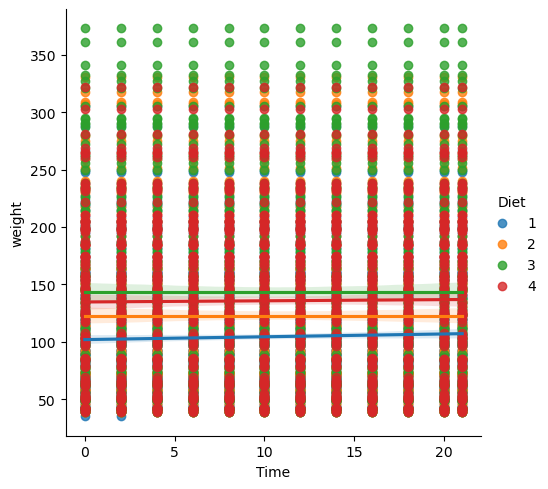

In [25]:
# Visualize Diet effects with Time adjustment
sns.lmplot(x='Time', y='weight', 
         hue='Diet', 
         data=merged_chick_data)
plt.show()

We've successfully merged the experimental and covariate data to create a comprehensive dataset, then adeptly performed an ANCOVA, incorporating both 'Diet' and 'Time' as predictors. The visualization further clarifies how diet influences weight over time. It looks like 'Time' might not be as meaningful since the lines are all close to parallel, and the large p-value in the summary also corresponds to the 'Time' coefficient!

## Choosing the right statistical test

When selecting the right statistical test, understanding our dataset's features and hypothesis under examination is vital. For data features, we need to know the data types - categorical or continuous -, their distribution, and the number of variables in the study. 

__Independent samples t-test__

This is used to compare the means of two distinct groups to determine if there is a statistically significant difference between them. This test relies on the assumptions that the response data for both groups are normally distributed, and have equal variances.

In [26]:
print(athletes.head())

NameError: name 'athletes' is not defined

In [ ]:
from scipy.stats import ttest_ind

group1 = athletes[athletes['Training_Program'] == 'HIIT']['Performance_Inc']
group2 = athletes[athletes['Training_Program'] == 'Endurance']['Performance_Inc']

t_stat, p_val = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, P_value: {p_val}')

The large p-value above leads us to conclude that there is no significant difference in the mean performance between the HIIT and Endurance groups

__One-Way ANOVA__

A one-way ANOVA is used to determine if there are statistically significant differences among the means of more than two groups. The 'one-way' corresponds to ANOVA with a single independent variable, and it assumes that the variances among the groups are equal.

In [43]:
from scipy.stats import f_oneway

program_types = ['HIIT', 'Endurance', 'Strength']
groups = [athletes[athletes['Training_Program'] == program]['Performance_Inc'] for program in program_types]
f_stat, p_val = f_oneway(*groups) # *groups unpacks the groups
print(f'F-statistic: {f_stat}, P-value: {p_val}')

F-statistic: 1.5270022393256704, P-value: 0.2188859009050602


The high p-value above implies that we cannot assert the different training programs lead to different mean increase in athletic performance

In [46]:
## Another example

chemical_reactions = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\chemical_reactions.csv")

catalyst_types = ['Palladium', 'Platinum', 'Nickel']
# Collect reaction times for each catalyst into a list
groups = [chemical_reactions[chemical_reactions['Catalyst'] == catalyst]['Reaction_Time'] for catalyst in catalyst_types]

# Perform the one-way ANOVA across the three groups
f_stat, p_val = f_oneway(*groups)
print(p_val)

4.710677600047866e-151


The P-value is substantially smaller than the value, indicating a significant difference in reaction times across the catalysts.

__Chi-square test of association__

This is a statistical method used to assess whether there is a significant association between two categorical variables. The chi-square test does not require assumptions about the distribution of the data. To prepare for the test, we start by creating contigency table using crosstab. A contigency table shows frequency counts for different combinations.

In [44]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(athletes['Training_Program'],
                                athletes['Diet_Type'])
print(contingency_table)

Diet_Type         High-Protein  Keto  Plant-Based
Training_Program                                 
Endurance                   33    28           33
HIIT                        27    32           40
Strength                    38    29           40


In [45]:
# perform chi-square test on the contigency table
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2_statistic: {chi2_stat}, P-value: {p_val}")

Chi2_statistic: 2.154450885821988, P-value: 0.7073764021451127


The large p-value suugests any observed association between training program and diet types are not statistically significant

## Post-hoc analysis following ANOVA

Post-hoc analysis is the statistical analysis conducted after a main analysis, often to explore specific differences between groups when a primary analysis (like ANOVA) shows a significant overall effect. It's essentially an "after-the-fact" investigation to identify where those significant differences lie. Post-hoc analysis allow us to pinpoint which specific pairs of groups differ. There are two common post-hoc method
1. __Tukey's HSD__ (Honest Significance difference): known for its robustness in multiple comparisons. Tihis is best for broader comparisons
2. __Bonferroni Correction__: adjusts p-values to control for Type I errors. This is better for reducing false positives in more focused tests

Pivot tables in pandas can be extremely helpful, especially before conducting post-hoc analysis. If ANOVA indicate significant differences, Tukey's HSD helps us to identify exactly which groups differ

__Case Study__\
Psychologists conducted a study to compare the effectiveness of three types of therapy on reducing anxiety levels: Cognitive Behavioral Therapy (CBT), Dialectical Behavior Therapy (DBT), and Acceptance and Commitment Therapy (ACT). Participants were randomly assigned to one of the three therapy groups, and their anxiety levels were measured before and after the therapy sessions. The psychologists have asked you to determine if there are any significant differences in the effectiveness of these therapies.

In [27]:
therapy_outcomes = pd.DataFrame({'Therapy_Type': {0: 'ACT', 1: 'DBT', 2: 'ACT', 3: 'CBT', 4: 'DBT', 5: 'ACT', 6: 'CBT', 7: 'CBT', 8: 'ACT', 9: 'DBT', 10: 'DBT', 11: 'CBT', 12: 'DBT', 13: 'DBT', 14: 'DBT', 15: 'CBT', 16: 'ACT', 17: 'DBT', 18: 'CBT', 19: 'CBT', 20: 'ACT', 21: 'DBT', 22: 'DBT', 23: 'ACT', 24: 'ACT', 25: 'CBT', 26: 'CBT', 27: 'ACT', 28: 'DBT', 29: 'CBT', 30: 'CBT', 31: 'DBT', 32: 'CBT', 33: 'DBT', 34: 'DBT', 35: 'DBT', 36: 'ACT', 37: 'ACT', 38: 'ACT', 39: 'DBT', 40: 'DBT', 41: 'ACT', 42: 'CBT', 43: 'DBT', 44: 'CBT', 45: 'CBT', 46: 'DBT', 47: 'DBT', 48: 'CBT', 49: 'CBT', 50: 'ACT', 51: 'ACT', 52: 'DBT', 53: 'ACT', 54: 'ACT', 55: 'ACT', 56: 'ACT', 57: 'CBT', 58: 'DBT', 59: 'ACT', 60: 'CBT', 61: 'CBT', 62: 'CBT', 63: 'ACT', 64: 'ACT', 65: 'DBT', 66: 'ACT', 67: 'ACT', 68: 'CBT', 69: 'DBT', 70: 'ACT', 71: 'ACT', 72: 'CBT', 73: 'CBT', 74: 'ACT', 75: 'DBT', 76: 'DBT', 77: 'CBT', 78: 'CBT', 79: 'ACT', 80: 'CBT', 81: 'ACT', 82: 'DBT', 83: 'DBT', 84: 'ACT', 85: 'CBT', 86: 'DBT', 87: 'CBT', 88: 'DBT', 89: 'ACT', 90: 'ACT', 91: 'ACT', 92: 'DBT', 93: 'CBT', 94: 'CBT', 95: 'CBT', 96: 'DBT', 97: 'DBT', 98: 'DBT', 99: 'DBT', 100: 'DBT', 101: 'CBT', 102: 'DBT', 103: 'DBT', 104: 'CBT', 105: 'DBT', 106: 'CBT', 107: 'CBT', 108: 'ACT', 109: 'ACT', 110: 'ACT', 111: 'ACT', 112: 'DBT', 113: 'ACT', 114: 'CBT', 115: 'DBT', 116: 'ACT', 117: 'CBT', 118: 'DBT', 119: 'DBT', 120: 'ACT', 121: 'DBT', 122: 'CBT', 123: 'DBT', 124: 'CBT', 125: 'DBT', 126: 'ACT', 127: 'CBT', 128: 'DBT', 129: 'DBT', 130: 'DBT', 131: 'CBT', 132: 'CBT', 133: 'CBT', 134: 'ACT', 135: 'ACT', 136: 'CBT', 137: 'DBT', 138: 'ACT', 139: 'CBT', 140: 'DBT', 141: 'ACT', 142: 'DBT', 143: 'DBT', 144: 'DBT', 145: 'DBT', 146: 'ACT', 147: 'ACT', 148: 'ACT', 149: 'CBT', 150: 'ACT', 151: 'DBT', 152: 'ACT', 153: 'DBT', 154: 'CBT', 155: 'DBT', 156: 'DBT', 157: 'DBT', 158: 'CBT', 159: 'ACT', 160: 'ACT', 161: 'CBT', 162: 'DBT', 163: 'ACT', 164: 'CBT', 165: 'ACT', 166: 'CBT', 167: 'DBT', 168: 'ACT', 169: 'CBT', 170: 'ACT', 171: 'ACT', 172: 'ACT', 173: 'ACT', 174: 'CBT', 175: 'DBT', 176: 'CBT', 177: 'CBT', 178: 'CBT', 179: 'DBT', 180: 'ACT', 181: 'ACT', 182: 'ACT', 183: 'DBT', 184: 'ACT', 185: 'DBT', 186: 'ACT', 187: 'ACT', 188: 'CBT', 189: 'DBT', 190: 'CBT', 191: 'CBT', 192: 'CBT', 193: 'DBT', 194: 'DBT', 195: 'ACT', 196: 'CBT', 197: 'ACT', 198: 'CBT', 199: 'DBT', 200: 'DBT', 201: 'DBT', 202: 'CBT', 203: 'DBT', 204: 'CBT', 205: 'ACT', 206: 'CBT', 207: 'ACT', 208: 'CBT', 209: 'ACT', 210: 'DBT', 211: 'ACT', 212: 'DBT', 213: 'DBT', 214: 'ACT', 215: 'CBT', 216: 'CBT', 217: 'CBT', 218: 'CBT', 219: 'CBT', 220: 'DBT', 221: 'CBT', 222: 'DBT', 223: 'DBT', 224: 'DBT', 225: 'ACT', 226: 'ACT', 227: 'DBT', 228: 'ACT', 229: 'CBT', 230: 'CBT', 231: 'DBT', 232: 'CBT', 233: 'DBT', 234: 'DBT', 235: 'CBT', 236: 'ACT', 237: 'CBT', 238: 'CBT', 239: 'DBT', 240: 'DBT', 241: 'DBT', 242: 'DBT', 243: 'ACT', 244: 'ACT', 245: 'ACT', 246: 'DBT', 247: 'DBT', 248: 'DBT', 249: 'ACT', 250: 'DBT', 251: 'CBT', 252: 'CBT', 253: 'DBT', 254: 'CBT', 255: 'CBT', 256: 'ACT', 257: 'DBT', 258: 'DBT', 259: 'ACT', 260: 'CBT', 261: 'CBT', 262: 'DBT', 263: 'CBT', 264: 'ACT', 265: 'ACT', 266: 'DBT', 267: 'ACT', 268: 'ACT', 269: 'DBT', 270: 'ACT', 271: 'ACT', 272: 'ACT', 273: 'CBT', 274: 'DBT', 275: 'DBT', 276: 'DBT', 277: 'CBT', 278: 'CBT', 279: 'DBT', 280: 'CBT', 281: 'DBT', 282: 'CBT', 283: 'ACT', 284: 'ACT', 285: 'DBT', 286: 'CBT', 287: 'CBT', 288: 'ACT', 289: 'ACT', 290: 'CBT', 291: 'CBT', 292: 'CBT', 293: 'CBT', 294: 'CBT', 295: 'CBT', 296: 'DBT', 297: 'CBT', 298: 'ACT', 299: 'DBT', 300: 'CBT', 301: 'ACT', 302: 'DBT', 303: 'ACT', 304: 'CBT', 305: 'CBT', 306: 'CBT', 307: 'CBT', 308: 'DBT', 309: 'DBT', 310: 'ACT', 311: 'CBT', 312: 'ACT', 313: 'DBT', 314: 'CBT', 315: 'CBT', 316: 'DBT', 317: 'DBT', 318: 'DBT', 319: 'DBT', 320: 'DBT', 321: 'CBT', 322: 'DBT', 323: 'CBT', 324: 'CBT', 325: 'DBT', 326: 'DBT', 327: 'CBT', 328: 'DBT', 329: 'DBT', 330: 'DBT', 331: 'ACT', 332: 'CBT', 333: 'ACT', 334: 'DBT', 335: 'ACT', 336: 'DBT', 337: 'ACT', 338: 'DBT', 339: 'ACT', 340: 'ACT', 341: 'ACT', 342: 'CBT', 343: 'ACT', 344: 'CBT', 345: 'DBT', 346: 'ACT', 347: 'DBT', 348: 'DBT', 349: 'ACT', 350: 'CBT', 351: 'ACT', 352: 'DBT', 353: 'DBT', 354: 'ACT', 355: 'CBT', 356: 'CBT', 357: 'DBT', 358: 'DBT', 359: 'CBT', 360: 'ACT', 361: 'DBT', 362: 'CBT', 363: 'DBT', 364: 'ACT', 365: 'CBT', 366: 'DBT', 367: 'ACT', 368: 'DBT', 369: 'ACT', 370: 'ACT', 371: 'CBT', 372: 'ACT', 373: 'DBT', 374: 'ACT', 375: 'ACT', 376: 'CBT', 377: 'ACT', 378: 'ACT', 379: 'DBT', 380: 'CBT', 381: 'CBT', 382: 'CBT', 383: 'ACT', 384: 'CBT', 385: 'ACT', 386: 'ACT', 387: 'DBT', 388: 'DBT', 389: 'DBT', 390: 'DBT', 391: 'DBT', 392: 'ACT', 393: 'ACT', 394: 'CBT', 395: 'ACT', 396: 'ACT', 397: 'DBT', 398: 'ACT', 399: 'DBT', 400: 'CBT', 401: 'CBT', 402: 'ACT', 403: 'CBT', 404: 'ACT', 405: 'CBT', 406: 'DBT', 407: 'DBT', 408: 'DBT', 409: 'DBT', 410: 'ACT', 411: 'CBT', 412: 'ACT', 413: 'DBT', 414: 'ACT', 415: 'CBT', 416: 'ACT', 417: 'CBT', 418: 'ACT', 419: 'CBT', 420: 'CBT', 421: 'DBT', 422: 'CBT', 423: 'DBT', 424: 'DBT', 425: 'DBT', 426: 'ACT', 427: 'ACT', 428: 'ACT', 429: 'ACT', 430: 'CBT', 431: 'CBT', 432: 'ACT', 433: 'CBT', 434: 'CBT', 435: 'DBT', 436: 'DBT', 437: 'DBT', 438: 'DBT', 439: 'CBT', 440: 'ACT', 441: 'CBT', 442: 'CBT', 443: 'CBT', 444: 'DBT', 445: 'DBT', 446: 'DBT', 447: 'ACT', 448: 'CBT', 449: 'ACT', 450: 'DBT', 451: 'ACT', 452: 'CBT', 453: 'CBT', 454: 'DBT', 455: 'DBT', 456: 'ACT', 457: 'DBT', 458: 'DBT', 459: 'CBT', 460: 'DBT', 461: 'DBT', 462: 'CBT', 463: 'CBT', 464: 'ACT', 465: 'DBT', 466: 'CBT', 467: 'ACT', 468: 'ACT', 469: 'DBT', 470: 'DBT', 471: 'ACT', 472: 'CBT', 473: 'ACT', 474: 'DBT', 475: 'CBT', 476: 'CBT', 477: 'ACT', 478: 'DBT', 479: 'ACT', 480: 'ACT', 481: 'ACT', 482: 'CBT', 483: 'CBT', 484: 'DBT', 485: 'DBT', 486: 'ACT', 487: 'ACT', 488: 'ACT', 489: 'DBT', 490: 'CBT', 491: 'CBT', 492: 'ACT', 493: 'ACT', 494: 'ACT', 495: 'ACT', 496: 'DBT', 497: 'CBT', 498: 'ACT', 499: 'DBT', 500: 'ACT', 501: 'ACT', 502: 'CBT', 503: 'ACT', 504: 'CBT', 505: 'CBT', 506: 'CBT', 507: 'DBT', 508: 'DBT', 509: 'CBT', 510: 'ACT', 511: 'CBT', 512: 'ACT', 513: 'CBT', 514: 'ACT', 515: 'DBT', 516: 'ACT', 517: 'CBT', 518: 'DBT', 519: 'ACT', 520: 'ACT', 521: 'ACT', 522: 'ACT', 523: 'ACT', 524: 'DBT', 525: 'DBT', 526: 'DBT', 527: 'DBT', 528: 'CBT', 529: 'DBT', 530: 'ACT', 531: 'ACT', 532: 'DBT', 533: 'ACT', 534: 'DBT', 535: 'ACT', 536: 'CBT', 537: 'CBT', 538: 'DBT', 539: 'DBT', 540: 'DBT', 541: 'ACT', 542: 'DBT', 543: 'CBT', 544: 'ACT', 545: 'DBT', 546: 'ACT', 547: 'ACT', 548: 'DBT', 549: 'ACT', 550: 'CBT', 551: 'CBT', 552: 'ACT', 553: 'DBT', 554: 'ACT', 555: 'CBT', 556: 'ACT', 557: 'ACT', 558: 'CBT', 559: 'ACT', 560: 'ACT', 561: 'DBT', 562: 'DBT', 563: 'CBT', 564: 'CBT', 565: 'CBT', 566: 'DBT', 567: 'CBT', 568: 'CBT', 569: 'CBT', 570: 'DBT', 571: 'ACT', 572: 'CBT', 573: 'ACT', 574: 'CBT', 575: 'ACT', 576: 'DBT', 577: 'DBT', 578: 'CBT', 579: 'ACT', 580: 'DBT', 581: 'CBT', 582: 'CBT', 583: 'DBT', 584: 'DBT', 585: 'CBT', 586: 'ACT', 587: 'ACT', 588: 'ACT', 589: 'CBT', 590: 'DBT', 591: 'CBT', 592: 'DBT', 593: 'ACT', 594: 'ACT', 595: 'DBT', 596: 'DBT', 597: 'CBT', 598: 'ACT', 599: 'CBT', 600: 'CBT', 601: 'CBT', 602: 'ACT', 603: 'CBT', 604: 'CBT', 605: 'CBT', 606: 'CBT', 607: 'CBT', 608: 'CBT', 609: 'ACT', 610: 'CBT', 611: 'DBT', 612: 'CBT', 613: 'CBT', 614: 'ACT', 615: 'ACT', 616: 'DBT', 617: 'DBT', 618: 'ACT', 619: 'ACT', 620: 'CBT', 621: 'ACT', 622: 'DBT', 623: 'CBT', 624: 'DBT', 625: 'CBT', 626: 'ACT', 627: 'DBT', 628: 'CBT', 629: 'CBT', 630: 'ACT', 631: 'ACT', 632: 'ACT', 633: 'DBT', 634: 'CBT', 635: 'ACT', 636: 'DBT', 637: 'DBT', 638: 'DBT', 639: 'ACT', 640: 'ACT', 641: 'CBT', 642: 'CBT', 643: 'ACT', 644: 'DBT', 645: 'DBT', 646: 'DBT', 647: 'CBT', 648: 'DBT', 649: 'CBT', 650: 'CBT', 651: 'DBT', 652: 'DBT', 653: 'ACT', 654: 'ACT', 655: 'DBT', 656: 'CBT', 657: 'CBT', 658: 'CBT', 659: 'CBT', 660: 'CBT', 661: 'ACT', 662: 'DBT', 663: 'ACT', 664: 'CBT', 665: 'CBT', 666: 'CBT', 667: 'CBT', 668: 'DBT', 669: 'CBT', 670: 'DBT', 671: 'CBT', 672: 'DBT', 673: 'ACT', 674: 'CBT', 675: 'DBT', 676: 'ACT', 677: 'CBT', 678: 'CBT', 679: 'CBT', 680: 'DBT', 681: 'DBT', 682: 'ACT', 683: 'DBT', 684: 'DBT', 685: 'CBT', 686: 'CBT', 687: 'CBT', 688: 'CBT', 689: 'CBT', 690: 'CBT', 691: 'CBT', 692: 'ACT', 693: 'ACT', 694: 'ACT', 695: 'ACT', 696: 'CBT', 697: 'ACT', 698: 'CBT', 699: 'ACT', 700: 'DBT', 701: 'ACT', 702: 'ACT', 703: 'CBT', 704: 'ACT', 705: 'DBT', 706: 'CBT', 707: 'CBT', 708: 'ACT', 709: 'CBT', 710: 'CBT', 711: 'CBT', 712: 'CBT', 713: 'CBT', 714: 'CBT', 715: 'DBT', 716: 'ACT', 717: 'DBT', 718: 'CBT', 719: 'CBT', 720: 'ACT', 721: 'DBT', 722: 'ACT', 723: 'DBT', 724: 'CBT', 725: 'ACT', 726: 'ACT', 727: 'CBT', 728: 'ACT', 729: 'DBT', 730: 'DBT', 731: 'DBT', 732: 'DBT', 733: 'CBT', 734: 'ACT', 735: 'DBT', 736: 'CBT', 737: 'ACT', 738: 'ACT', 739: 'CBT', 740: 'CBT', 741: 'DBT', 742: 'ACT', 743: 'ACT', 744: 'CBT', 745: 'ACT', 746: 'DBT', 747: 'ACT', 748: 'CBT', 749: 'CBT', 750: 'DBT', 751: 'DBT', 752: 'ACT', 753: 'ACT', 754: 'CBT', 755: 'DBT', 756: 'DBT', 757: 'DBT', 758: 'ACT', 759: 'DBT', 760: 'CBT', 761: 'CBT', 762: 'ACT', 763: 'ACT', 764: 'DBT', 765: 'ACT', 766: 'CBT', 767: 'DBT', 768: 'CBT', 769: 'DBT', 770: 'ACT', 771: 'DBT', 772: 'DBT', 773: 'CBT', 774: 'CBT', 775: 'DBT', 776: 'ACT', 777: 'ACT', 778: 'CBT', 779: 'ACT', 780: 'CBT', 781: 'ACT', 782: 'DBT', 783: 'CBT', 784: 'CBT', 785: 'DBT', 786: 'CBT', 787: 'ACT', 788: 'ACT', 789: 'CBT', 790: 'ACT', 791: 'CBT', 792: 'DBT', 793: 'CBT', 794: 'DBT', 795: 'ACT', 796: 'DBT', 797: 'ACT', 798: 'CBT', 799: 'ACT', 800: 'CBT', 801: 'CBT', 802: 'DBT', 803: 'DBT', 804: 'DBT', 805: 'DBT', 806: 'ACT', 807: 'ACT', 808: 'ACT', 809: 'CBT', 810: 'ACT', 811: 'ACT', 812: 'ACT', 813: 'DBT', 814: 'ACT', 815: 'CBT', 816: 'DBT', 817: 'CBT', 818: 'ACT', 819: 'DBT', 820: 'CBT', 821: 'ACT', 822: 'CBT', 823: 'CBT', 824: 'CBT', 825: 'ACT', 826: 'ACT', 827: 'CBT', 828: 'DBT', 829: 'DBT', 830: 'ACT', 831: 'ACT', 832: 'ACT', 833: 'ACT', 834: 'ACT', 835: 'DBT', 836: 'ACT', 837: 'CBT', 838: 'CBT', 839: 'DBT', 840: 'CBT', 841: 'DBT', 842: 'DBT', 843: 'CBT', 844: 'ACT', 845: 'CBT', 846: 'CBT', 847: 'DBT', 848: 'CBT', 849: 'DBT', 850: 'ACT', 851: 'ACT', 852: 'ACT', 853: 'CBT', 854: 'DBT', 855: 'ACT', 856: 'DBT', 857: 'DBT', 858: 'ACT', 859: 'ACT', 860: 'DBT', 861: 'ACT', 862: 'DBT', 863: 'DBT', 864: 'ACT', 865: 'CBT', 866: 'ACT', 867: 'CBT', 868: 'DBT', 869: 'DBT', 870: 'CBT', 871: 'DBT', 872: 'CBT', 873: 'CBT', 874: 'DBT', 875: 'CBT', 876: 'ACT', 877: 'ACT', 878: 'DBT', 879: 'DBT', 880: 'CBT', 881: 'CBT', 882: 'CBT', 883: 'CBT', 884: 'ACT', 885: 'ACT', 886: 'DBT', 887: 'CBT', 888: 'CBT', 889: 'DBT', 890: 'CBT', 891: 'CBT', 892: 'CBT', 893: 'CBT', 894: 'CBT', 895: 'DBT', 896: 'CBT', 897: 'DBT', 898: 'CBT', 899: 'ACT', 900: 'ACT', 901: 'ACT', 902: 'ACT', 903: 'DBT', 904: 'DBT', 905: 'CBT', 906: 'ACT', 907: 'DBT', 908: 'CBT', 909: 'CBT', 910: 'DBT', 911: 'ACT', 912: 'CBT', 913: 'ACT', 914: 'ACT', 915: 'ACT', 916: 'CBT', 917: 'ACT', 918: 'CBT', 919: 'ACT', 920: 'CBT', 921: 'ACT', 922: 'DBT', 923: 'ACT', 924: 'ACT', 925: 'CBT', 926: 'CBT', 927: 'ACT', 928: 'DBT', 929: 'DBT', 930: 'CBT', 931: 'DBT', 932: 'ACT', 933: 'CBT', 934: 'ACT', 935: 'CBT', 936: 'CBT', 937: 'CBT', 938: 'CBT', 939: 'DBT', 940: 'ACT', 941: 'ACT', 942: 'ACT', 943: 'CBT', 944: 'DBT', 945: 'ACT', 946: 'DBT', 947: 'CBT', 948: 'ACT', 949: 'DBT', 950: 'CBT', 951: 'DBT', 952: 'ACT', 953: 'ACT', 954: 'CBT', 955: 'CBT', 956: 'CBT', 957: 'DBT', 958: 'DBT', 959: 'DBT', 960: 'CBT', 961: 'ACT', 962: 'ACT', 963: 'DBT', 964: 'DBT', 965: 'ACT', 966: 'ACT', 967: 'DBT', 968: 'DBT', 969: 'ACT', 970: 'CBT', 971: 'DBT', 972: 'ACT', 973: 'ACT', 974: 'ACT', 975: 'ACT', 976: 'CBT', 977: 'ACT', 978: 'DBT', 979: 'CBT', 980: 'ACT', 981: 'CBT', 982: 'DBT', 983: 'ACT', 984: 'DBT', 985: 'ACT', 986: 'ACT', 987: 'ACT', 988: 'ACT', 989: 'ACT', 990: 'CBT', 991: 'ACT', 992: 'ACT', 993: 'CBT', 994: 'CBT', 995: 'CBT', 996: 'CBT', 997: 'CBT', 998: 'CBT', 999: 'ACT', 1000: 'ACT', 1001: 'DBT', 1002: 'ACT', 1003: 'ACT', 1004: 'CBT', 1005: 'CBT', 1006: 'ACT', 1007: 'DBT', 1008: 'CBT', 1009: 'ACT', 1010: 'ACT', 1011: 'DBT', 1012: 'DBT', 1013: 'CBT', 1014: 'DBT', 1015: 'ACT', 1016: 'ACT', 1017: 'DBT', 1018: 'DBT', 1019: 'DBT', 1020: 'DBT', 1021: 'CBT', 1022: 'DBT', 1023: 'CBT', 1024: 'ACT', 1025: 'DBT', 1026: 'CBT', 1027: 'DBT', 1028: 'ACT', 1029: 'ACT', 1030: 'ACT', 1031: 'DBT', 1032: 'DBT', 1033: 'CBT', 1034: 'ACT', 1035: 'DBT', 1036: 'ACT', 1037: 'ACT', 1038: 'CBT', 1039: 'CBT', 1040: 'CBT', 1041: 'CBT', 1042: 'ACT', 1043: 'CBT', 1044: 'CBT', 1045: 'CBT', 1046: 'CBT', 1047: 'ACT', 1048: 'CBT', 1049: 'ACT', 1050: 'DBT', 1051: 'ACT', 1052: 'ACT', 1053: 'CBT', 1054: 'DBT', 1055: 'DBT', 1056: 'DBT', 1057: 'DBT', 1058: 'ACT', 1059: 'DBT', 1060: 'ACT', 1061: 'ACT', 1062: 'ACT', 1063: 'DBT', 1064: 'CBT', 1065: 'CBT', 1066: 'DBT', 1067: 'CBT', 1068: 'CBT', 1069: 'ACT', 1070: 'ACT', 1071: 'DBT', 1072: 'DBT', 1073: 'CBT', 1074: 'ACT', 1075: 'DBT', 1076: 'DBT', 1077: 'DBT', 1078: 'DBT', 1079: 'DBT', 1080: 'DBT', 1081: 'CBT', 1082: 'ACT', 1083: 'ACT', 1084: 'DBT', 1085: 'ACT', 1086: 'ACT', 1087: 'ACT', 1088: 'DBT', 1089: 'DBT', 1090: 'ACT', 1091: 'ACT', 1092: 'DBT', 1093: 'CBT', 1094: 'ACT', 1095: 'CBT', 1096: 'ACT', 1097: 'CBT', 1098: 'CBT', 1099: 'CBT', 1100: 'DBT', 1101: 'CBT', 1102: 'CBT', 1103: 'CBT', 1104: 'ACT', 1105: 'CBT', 1106: 'ACT', 1107: 'CBT', 1108: 'CBT', 1109: 'DBT', 1110: 'ACT', 1111: 'CBT', 1112: 'ACT', 1113: 'ACT', 1114: 'DBT', 1115: 'DBT', 1116: 'DBT', 1117: 'DBT', 1118: 'DBT', 1119: 'DBT', 1120: 'DBT', 1121: 'DBT', 1122: 'CBT', 1123: 'ACT', 1124: 'DBT', 1125: 'DBT', 1126: 'ACT', 1127: 'CBT', 1128: 'ACT', 1129: 'ACT', 1130: 'DBT', 1131: 'ACT', 1132: 'ACT', 1133: 'DBT', 1134: 'DBT', 1135: 'DBT', 1136: 'DBT', 1137: 'ACT', 1138: 'ACT', 1139: 'CBT', 1140: 'CBT', 1141: 'ACT', 1142: 'CBT', 1143: 'ACT', 1144: 'CBT', 1145: 'DBT', 1146: 'CBT', 1147: 'DBT', 1148: 'DBT', 1149: 'DBT', 1150: 'DBT', 1151: 'CBT', 1152: 'ACT', 1153: 'DBT', 1154: 'CBT', 1155: 'DBT', 1156: 'CBT', 1157: 'CBT', 1158: 'CBT', 1159: 'ACT', 1160: 'CBT', 1161: 'CBT', 1162: 'ACT', 1163: 'ACT', 1164: 'CBT', 1165: 'ACT', 1166: 'DBT', 1167: 'DBT', 1168: 'ACT', 1169: 'ACT', 1170: 'CBT', 1171: 'ACT', 1172: 'CBT', 1173: 'DBT', 1174: 'ACT', 1175: 'CBT', 1176: 'CBT', 1177: 'DBT', 1178: 'ACT', 1179: 'DBT', 1180: 'CBT', 1181: 'CBT', 1182: 'ACT', 1183: 'CBT', 1184: 'ACT', 1185: 'DBT', 1186: 'ACT', 1187: 'ACT', 1188: 'CBT', 1189: 'CBT', 1190: 'ACT', 1191: 'CBT', 1192: 'CBT', 1193: 'CBT', 1194: 'ACT', 1195: 'CBT', 1196: 'ACT', 1197: 'CBT', 1198: 'DBT', 1199: 'CBT', 1200: 'CBT', 1201: 'ACT', 1202: 'ACT', 1203: 'CBT', 1204: 'DBT', 1205: 'CBT', 1206: 'CBT', 1207: 'DBT', 1208: 'ACT', 1209: 'CBT', 1210: 'ACT', 1211: 'ACT', 1212: 'DBT', 1213: 'DBT', 1214: 'ACT', 1215: 'CBT', 1216: 'ACT', 1217: 'CBT', 1218: 'CBT', 1219: 'DBT', 1220: 'CBT', 1221: 'CBT', 1222: 'ACT', 1223: 'DBT', 1224: 'CBT', 1225: 'CBT', 1226: 'DBT', 1227: 'ACT', 1228: 'DBT', 1229: 'DBT', 1230: 'CBT', 1231: 'CBT', 1232: 'ACT', 1233: 'CBT', 1234: 'CBT', 1235: 'DBT', 1236: 'CBT', 1237: 'ACT', 1238: 'DBT', 1239: 'ACT', 1240: 'DBT', 1241: 'CBT', 1242: 'DBT', 1243: 'DBT', 1244: 'CBT', 1245: 'CBT', 1246: 'ACT', 1247: 'ACT', 1248: 'CBT', 1249: 'CBT', 1250: 'CBT', 1251: 'DBT', 1252: 'DBT', 1253: 'DBT', 1254: 'CBT', 1255: 'ACT', 1256: 'CBT', 1257: 'DBT', 1258: 'DBT', 1259: 'CBT', 1260: 'CBT', 1261: 'DBT', 1262: 'DBT', 1263: 'DBT', 1264: 'CBT', 1265: 'DBT', 1266: 'DBT', 1267: 'ACT', 1268: 'CBT', 1269: 'ACT', 1270: 'ACT', 1271: 'DBT', 1272: 'CBT', 1273: 'DBT', 1274: 'CBT', 1275: 'ACT', 1276: 'CBT', 1277: 'DBT', 1278: 'DBT', 1279: 'DBT', 1280: 'CBT', 1281: 'ACT', 1282: 'ACT', 1283: 'CBT', 1284: 'DBT', 1285: 'ACT', 1286: 'DBT', 1287: 'CBT', 1288: 'DBT', 1289: 'ACT', 1290: 'ACT', 1291: 'DBT', 1292: 'CBT', 1293: 'DBT', 1294: 'CBT', 1295: 'DBT', 1296: 'ACT', 1297: 'CBT', 1298: 'CBT', 1299: 'CBT', 1300: 'ACT', 1301: 'DBT', 1302: 'ACT', 1303: 'CBT', 1304: 'DBT', 1305: 'ACT', 1306: 'CBT', 1307: 'CBT', 1308: 'ACT', 1309: 'ACT', 1310: 'ACT', 1311: 'CBT', 1312: 'ACT', 1313: 'CBT', 1314: 'ACT', 1315: 'CBT', 1316: 'CBT', 1317: 'DBT', 1318: 'ACT', 1319: 'ACT', 1320: 'CBT', 1321: 'CBT', 1322: 'CBT', 1323: 'DBT', 1324: 'DBT', 1325: 'CBT', 1326: 'ACT', 1327: 'ACT', 1328: 'DBT', 1329: 'DBT', 1330: 'CBT', 1331: 'ACT', 1332: 'CBT', 1333: 'DBT', 1334: 'ACT', 1335: 'ACT', 1336: 'DBT', 1337: 'CBT', 1338: 'CBT', 1339: 'ACT', 1340: 'DBT', 1341: 'ACT', 1342: 'DBT', 1343: 'CBT', 1344: 'DBT', 1345: 'CBT', 1346: 'DBT', 1347: 'ACT', 1348: 'CBT', 1349: 'ACT', 1350: 'ACT', 1351: 'CBT', 1352: 'CBT', 1353: 'ACT', 1354: 'ACT', 1355: 'ACT', 1356: 'ACT', 1357: 'CBT', 1358: 'CBT', 1359: 'ACT', 1360: 'DBT', 1361: 'DBT', 1362: 'CBT', 1363: 'ACT', 1364: 'ACT', 1365: 'CBT', 1366: 'DBT', 1367: 'DBT', 1368: 'DBT', 1369: 'CBT', 1370: 'DBT', 1371: 'CBT', 1372: 'CBT', 1373: 'ACT', 1374: 'DBT', 1375: 'CBT', 1376: 'DBT', 1377: 'DBT', 1378: 'ACT', 1379: 'DBT', 1380: 'ACT', 1381: 'CBT', 1382: 'DBT', 1383: 'CBT', 1384: 'DBT', 1385: 'CBT', 1386: 'DBT', 1387: 'DBT', 1388: 'DBT', 1389: 'DBT', 1390: 'DBT', 1391: 'DBT', 1392: 'DBT', 1393: 'DBT', 1394: 'DBT', 1395: 'CBT', 1396: 'ACT', 1397: 'DBT', 1398: 'ACT', 1399: 'DBT', 1400: 'DBT', 1401: 'CBT', 1402: 'CBT', 1403: 'ACT', 1404: 'CBT', 1405: 'CBT', 1406: 'ACT', 1407: 'CBT', 1408: 'DBT', 1409: 'ACT', 1410: 'ACT', 1411: 'DBT', 1412: 'CBT', 1413: 'ACT', 1414: 'ACT', 1415: 'DBT', 1416: 'DBT', 1417: 'CBT', 1418: 'ACT', 1419: 'CBT', 1420: 'CBT', 1421: 'DBT'}, 'Anxiety_Reduction': {0: 17.483570765056164, 1: 14.308678494144077, 2: 18.23844269050346, 3: 22.61514928204013, 4: 13.82923312638332, 5: 13.829315215254097, 6: 22.896064077536955, 7: 18.837173645764544, 8: 12.652628070325239, 9: 17.712800217929825, 10: 12.682911535937688, 11: 12.671351232148716, 12: 16.20981135783017, 13: 5.43359877671101, 14: 6.375410837434837, 15: 12.188562353795136, 16: 9.93584439832788, 17: 16.571236662976368, 18: 10.459879622393945, 19: 7.938481493323542, 20: 22.32824384460777, 21: 13.871118497567322, 22: 15.33764102343962, 23: 7.8762590689327165, 24: 12.278086377374088, 25: 15.55461294854933, 26: 9.245032112888486, 27: 16.87849009172836, 28: 11.996806550405974, 29: 13.541531251033616, 30: 11.991466938853016, 31: 24.261390922544688, 32: 14.932513876310331, 33: 9.711445355220498, 34: 19.112724560515943, 35: 8.895781750144888, 36: 16.044317975023777, 37: 5.201649380601122, 38: 8.359069755507846, 39: 15.984306179345618, 40: 18.692332899977053, 41: 15.856841405949853, 42: 14.421758588058797, 43: 13.494481522053556, 44: 7.607390048162863, 45: 11.400778958026457, 46: 12.696806145201062, 47: 20.285611131094576, 48: 16.71809144784231, 49: 6.18479922318633, 50: 16.620419846973974, 51: 13.074588597918417, 52: 11.615389998470206, 53: 18.05838144420434, 54: 20.154997612479754, 55: 19.656400595580994, 56: 10.803912383886807, 57: 13.453938120743928, 58: 16.65631715701782, 59: 19.877725635611796, 60: 12.60412881077355, 61: 14.071705116680914, 62: 9.468325129969859, 63: 9.018966879596647, 64: 19.062629111970992, 65: 21.781200142854114, 66: 14.63994939209833, 67: 20.01766448946012, 68: 16.80818012523817, 69: 11.774401226974378, 70: 16.80697802754207, 71: 22.690182832329846, 72: 14.820869804450242, 73: 22.82321827907003, 74: 1.9012744795512777, 75: 19.10951252187612, 76: 15.435235341190856, 77: 13.504963247670663, 78: 15.458803882677511, 79: 5.0621554269955364, 80: 13.90164056081244, 81: 16.78556285755873, 82: 22.38947022370758, 83: 12.408648908631763, 84: 10.957531985534061, 85: 12.491214782077318, 86: 19.57701058851037, 87: 16.643755548298422, 88: 12.351198981164806, 89: 17.56633716556678, 90: 15.485387746740201, 91: 19.843224952664446, 92: 11.489734530613237, 93: 13.361689267011158, 94: 13.039459234339212, 95: 7.682425259339407, 96: 16.48060138532288, 97: 16.305276360899448, 98: 15.025567283212304, 99: 13.827064333124266, 100: 7.923146289747929, 101: 12.896773386173205, 102: 13.286427417366152, 103: 10.988613653891905, 104: 14.193571441669954, 105: 17.020254284072692, 106: 24.43092950605265, 107: 15.872889064159194, 108: 16.28775195361382, 109: 14.627770421169163, 110: 5.406143923504793, 111: 14.867430622753915, 112: 15.301151049705132, 113: 27.31621056242643, 114: 14.038195176094387, 115: 16.507736711668063, 116: 14.826441151473784, 117: 9.156609811902339, 118: 20.714114072575104, 119: 18.759665163433873, 120: 18.955159735215233, 121: 10.453062726026305, 122: 22.013971554680495, 123: 7.990744686038596, 124: 17.934285469001352, 125: 25.952278129049894, 126: 10.047318374346558, 127: 12.16851135198614, 128: 15.498256825438206, 129: 12.482621729419003, 130: 7.246682844669337, 131: 15.342814874030136, 132: 9.688481431369475, 133: 17.36796215317591, 134: 10.402878828830985, 135: 22.749672025087698, 136: 11.083733538318814, 137: 13.389692418971622, 138: 19.067586086848348, 139: 8.845678417830225, 140: 16.137299673020646, 141: 21.53571377141214, 142: 6.962583827193862, 143: 15.923169292661521, 144: 16.299413971242117, 145: 18.90911435888655, 146: 8.81524644560959, 147: 8.397716934578618, 148: 17.60970782808449, 149: 16.48492336616593, 150: 16.252464251729382, 151: 16.732241047484877, 152: 11.599876392107547, 153: 16.161268485805017, 154: 16.465362366493405, 155: 11.42824290986816, 156: 24.328872555723784, 157: 17.36916460455894, 158: 9.043482513986756, 159: 18.28276804316915, 160: 10.126591648863393, 161: 18.93542301871226, 162: 20.79297789503702, 163: 10.896588408241447, 164: 19.81688064622161, 165: 17.06390463468249, 166: 19.11030079997245, 167: 24.483964913269737, 168: 13.773059419985648, 169: 11.231319178212551, 170: 10.552427851872384, 171: 10.920948575172808, 172: 14.61449145292948, 173: 16.70575987408322, 174: 16.383453996650097, 175: 19.13591624518012, 176: 15.065009459389534, 177: 22.267670385786584, 178: 13.67671583381022, 179: 28.600845832948096, 180: 18.12833673882503, 181: 10.714212217918586, 182: 9.645537509694439, 183: 17.412362076215928, 184: 13.882686073370746, 185: 18.57000247046046, 186: 17.366188122867726, 187: 14.635855436715635, 188: 10.766031409657975, 189: 7.425763876570677, 190: 12.767425239664895, 191: 19.28199397161736, 192: 16.07046872065102, 193: 8.77130610644006, 194: 15.86590462925591, 195: 16.926586898644185, 196: 10.580712818994336, 197: 15.76862552972764, 198: 15.29104359223, 199: 9.285148510846884, 200: 16.788936801741418, 201: 17.80392263184117, 202: 20.415256215876383, 203: 20.269010260174515, 204: 8.111653160214544, 205: 10.310874800424386, 206: 17.5751763360433, 207: 17.568929754561044, 208: 17.575238431530238, 209: 34.26365745327361, 210: 17.854452553465833, 211: 20.677828200902994, 212: 19.770008817466014, 213: 18.25695625652899, 214: 13.423653776798272, 215: 18.794846102466337, 216: 11.13587392731214, 217: 13.815906966299956, 218: 12.573182260854482, 219: 15.409370696931612, 220: 26.573292833367542, 221: 5.663674037041259, 222: 18.43130095187257, 223: 6.936420644051742, 224: 12.640340671052833, 225: 20.444752984836832, 226: 15.321400095477314, 227: 9.611276110353469, 228: 11.423481453700159, 229: 18.39798874467338, 230: 11.348166841414317, 231: 16.082292947909874, 232: 15.227859199519068, 233: 11.741998261970915, 234: 25.719720446626628, 235: 18.169595111590056, 236: 4.874287066711965, 237: 15.932271573847139, 238: 11.69106767615806, 239: 19.26216667398112, 240: 11.037396307836497, 241: 14.426317792665506, 242: 17.524936394902287, 243: 19.328775970850607, 244: 8.998517964721119, 245: 13.327493820795258, 246: 12.62527344419522, 247: 11.73335383713144, 248: 23.827271201405484, 249: 17.024908554804778, 250: 8.695580228324774, 251: 19.58930973527388, 252: 25.610780985063165, 253: 20.162326302755734, 254: 7.403150170229933, 255: 12.578829635668743, 256: 21.334555745933113, 257: 11.461652671906096, 258: 17.219097140731144, 259: 18.873170267146683, 260: 10.365347642109585, 261: 14.702373219691, 262: -1.2063367003453642, 263: 9.878061793328552, 264: 13.737159243034199, 265: 8.761084090175753, 266: 23.162056519658176, 267: 7.849293110196837, 268: 12.79977756651508, 269: 15.653702886430457, 270: 22.206366445330577, 271: 7.8206892441028035, 272: 20.815818760774796, 273: 15.051165305097935, 274: 10.092456744760245, 275: 17.310517371316354, 276: 15.995298477867351, 277: 11.998915614206027, 278: 15.349010424950094, 279: 13.0734320156912, 280: 15.56758672625624, 281: 18.310653372605234, 282: 22.93008408072676, 283: 8.810922505865754, 284: 25.665166873281333, 285: 5.239561002387491, 286: 14.241074524822084, 287: 17.941586032422883, 288: 16.404959338675162, 289: 11.886502400897031, 290: 13.959388748213623, 291: 12.534995326705836, 292: 12.053176215278942, 293: 19.248010485105123, 294: 16.785077429825236, 295: 11.53545202369673, 296: 19.497999377166252, 297: 16.536497604383047, 298: 19.0643105941948, 299: 18.14814420961806, 300: 10.855024945389639, 301: 12.199094799015153, 302: 18.736468025616308, 303: 18.051851327167324, 304: 14.895492030179259, 305: 15.58663691654391, 306: 21.388324478942124, 307: 12.042143055820851, 308: 17.735486905850188, 309: 13.98903673783053, 310: 13.911593983863899, 311: 20.49388425993595, 312: 19.12708174494015, 313: 19.067548180003193, 314: 21.527394035771646, 315: 15.105019208163796, 316: 18.40976485647482, 317: 13.44866621703272, 318: 16.62083176244221, 319: 14.349284728161576, 320: 15.484979824963592, 321: 17.97578512718457, 322: 10.908896583832638, 323: 25.461936378427303, 324: 9.96991309250149, 325: 8.92905693606134, 326: 20.790554367500338, 327: 18.95831346981468, 328: 18.120599085260775, 329: 18.1417275463214, 330: 14.938766135765427, 331: 10.513728142570843, 332: 15.379022790968632, 333: 11.614191442439441, 334: 19.875598667088756, 335: 14.264713092489307, 336: 10.872514016037442, 337: 13.393070791735033, 338: 17.06465727137812, 339: 12.181377235980126, 340: 10.888898022167844, 341: 16.218436057459563, 342: 16.224832855543614, 343: 12.46528412314435, 344: 12.644808471908386, 345: 16.16024968678818, 346: 7.759578292513379, 347: 7.962681128117223, 348: 11.40777889373782, 349: 13.932764241440763, 350: 16.554537827990025, 351: 22.376781084747762, 352: 19.288298116010097, 353: 14.200307350182864, 354: 14.904918960486556, 355: 9.987353176810956, 356: 14.90743432003805, 357: 13.556706805399308, 358: 16.613592801690448, 359: 10.863845282238385, 360: 17.596732571205862, 361: 22.66369456501289, 362: 14.456199257715712, 363: 17.008558610494706, 364: 18.450719958555563, 365: 12.993897640570818, 366: 16.120462409052084, 367: 15.062962003908975, 368: 15.48838049274416, 369: 11.134951080722669, 370: 15.122550871294713, 371: 17.489991456227248, 372: 22.25571803897521, 373: 19.796354130426035, 374: 25.765912287557782, 375: 11.163262185559752, 376: 19.361603183603393, 377: 15.916710028691758, 378: 25.94901466608836, 379: 10.958508573224243, 380: 10.80139078909612, 381: 12.00303677277989, 382: 4.380521378450965, 383: 12.371224891596196, 384: 11.20433669223151, 385: 15.751968932381038, 386: 16.708779878885796, 387: 24.380854196079433, 388: 19.75211919093025, 389: 12.115481721687985, 390: 10.50792664325821, 391: 17.459595857532527, 392: 8.398833964896788, 393: 24.15729382927177, 394: 20.897200603606436, 395: 12.654121739476476, 396: 6.434327354545612, 397: 21.769361870827062, 398: 14.42730077373691, 399: 21.189081559867308, 400: 7.0278617060281645, 401: 12.003124885231136, 402: 15.026218498590916, 403: 15.234902968823711, 404: 12.749672642603782, 405: 18.114249661737492, 406: 9.661897853087028, 407: 14.288102574893532, 408: 15.601478158559495, 409: 17.572194170293745, 410: 18.55807439044445, 411: 9.376789540810654, 412: 7.329429146321889, 413: 21.388384109492545, 414: 16.661570059897958, 415: 11.257567317217232, 416: 22.755759877612615, 417: 15.578373171464293, 418: 20.896485920319133, 419: 15.337592407050545, 420: 25.303739624409936, 421: 23.77670421221602, 422: 13.755179257604633, 423: 19.85785475477178, 424: 18.226879747925736, 425: 21.843157787661745, 426: 10.175382697099478, 427: 18.430257299992196, 428: 20.29212243424794, 429: 6.206302567884428, 430: 9.083707436671125, 431: 4.803839111199498, 432: 13.652965827777212, 433: 18.58771127897981, 434: 22.51178526048014, 435: 15.370473902098876, 436: 23.143077727856458, 437: 8.099492708925542, 438: 6.483087803224226, 439: 14.722261505516906, 440: 16.920327244696537, 441: 14.836526259529535, 442: 4.662789499800617, 443: 14.554399802436057, 444: 8.477652497475734, 445: 18.348362744150194, 446: 16.83299123048424, 447: 10.300601068363225, 448: 12.430665413316532, 449: 9.703932390555241, 450: 14.68660451363414, 451: 19.775711602506192, 452: 10.071369768322281, 453: 17.520232577589223, 454: 12.348711908137796, 455: 11.035635838688279, 456: 14.46484820022721, 457: 9.823788387903129, 458: 12.231753473264089, 459: 9.010610537055758, 460: 24.823625664581947, 461: 15.176317759858643, 462: 11.501372460037071, 463: 16.06989955367111, 464: 14.438359751545851, 465: 13.895152002333885, 466: 18.070833500217127, 467: 18.787538550236526, 468: 12.347494261947363, 469: 12.1209087967766, 470: 13.62474151424178, 471: 3.4903941763220754, 472: 7.424044689007239, 473: 21.834371337222624, 474: 23.224838567506417, 475: 13.754819802218108, 476: 17.882784815278832, 477: 16.556250772717682, 478: 30.39440404227619, 479: 20.597874557172883, 480: 14.360412042596167, 481: 10.222297796997871, 482: 6.967768398712138, 483: 16.017318179336115, 484: 11.218246273578483, 485: 7.888731452011629, 486: 11.767135578787368, 487: 9.592259981928025, 488: 23.435708175362823, 489: 19.408198784747253, 490: 14.960136793416913, 491: 22.39972069445013, 492: 15.386841538238091, 493: 10.693578993358681, 494: 22.615620386348287, 495: 17.694550218423295, 496: 9.813769228367718, 497: 14.048306609581958, 498: 10.621908733076214, 499: 8.08600134517832, 500: 19.630887737658206, 501: 24.547083202350652, 502: 8.007162130904295, 503: 17.814846183452854, 504: 11.746787154390866, 505: 12.56437308117652, 506: 12.038030378805654, 507: 10.68004615160092, 508: 15.242608139724135, 509: 10.84524941794481, 510: 16.352284128899193, 511: 14.748809452754315, 512: 13.805259765667952, 513: 10.462181689792011, 514: 12.116143347158337, 515: 18.77695612912878, 516: 17.504585938121902, 517: 10.112223776007244, 518: 15.496661527146129, 519: 18.756935616858947, 520: 6.652973594393142, 521: 17.716800961899676, 522: 11.686881205270767, 523: 17.852993342965796, 524: 11.183704217287415, 525: 5.975589496677404, 526: 6.862287810584187, 527: 15.24042473330691, 528: 16.29861250860741, 529: 10.478416874477958, 530: 18.19296229388687, 531: 6.6923996886552, 532: 14.669601006763417, 533: 8.944919001187717, 534: 11.740819460989204, 535: 15.23699335658207, 536: 10.697933173580239, 537: 13.077222278850874, 538: 20.0314640460722, 539: 12.115540652384256, 540: 19.17846056032571, 541: 9.35146572671191, 542: 17.649020889576413, 543: 22.207843103289502, 544: 2.6417774993635526, 545: 11.015523722647616, 546: 17.8853606359027, 547: 13.984773069785037, 548: 16.855729366856544, 549: 11.980074066420897, 550: 15.4329489373645, 551: 14.221613823039602, 552: 20.838910308299035, 553: 16.272104216506065, 554: 16.68801331037601, 555: 12.940615169387662, 556: 12.561968879637533, 557: 12.837209060901895, 558: 16.972260711891483, 559: 12.895077595898686, 560: 16.448874284482066, 561: 25.377003993227195, 562: 19.355623517158463, 563: 13.369882339160794, 564: 21.006069610819722, 565: 12.959623134892244, 566: 4.809377324110731, 567: 9.95956844541298, 568: 5.646040394870722, 569: 13.242432579793457, 570: 15.092091895947759, 571: 23.382186561376415, 572: 16.634636868820813, 573: 13.904497355955678, 574: 19.147027905917447, 575: 3.944323454960575, 576: 16.178072790542828, 577: 18.854325969434832, 578: 7.607068771100792, 579: 20.718770216034645, 580: 16.69248203747207, 581: 12.923560430495993, 582: 18.163909330531425, 583: 26.35346428902198, 584: 15.909331275292477, 585: 16.24110293150168, 586: 12.70319550229878, 587: 10.750778152676041, 588: 19.151679082721227, 589: 10.719580870455664, 590: 15.357831186096963, 591: 12.611712766174417, 592: 17.39489912873196, 593: 16.66831052643474, 594: 20.187699721289498, 595: 12.449918005726264, 596: 13.650625323533143, 597: 10.106181421088463, 598: 12.778533699619441, 599: 16.88650246522426, 600: 18.78494308322676, 601: 10.389173379111874, 602: 19.3480296005283, 603: 21.778189294024756, 604: 17.067174516118506, 605: 24.38397906279033, 606: 11.131054004482134, 607: 8.776726483442914, 608: 6.106398755478606, 609: 22.480221557445915, 610: 18.27182828177029, 611: 14.722076645447725, 612: 16.399843131599102, 613: 9.372554763508116, 614: 27.22875989808413, 615: 15.646105909876137, 616: 15.546973973024464, 617: 18.62883311949346, 618: 17.405046158683568, 619: 16.119420121395656, 620: 11.047627722773441, 621: 17.357341785679978, 622: 24.41012248237517, 623: 21.727100230774887, 624: 22.965933133196984, 625: 12.443921617844074, 626: 10.051975898707095, 627: 14.37106539950176, 628: 15.278624561443474, 629: 20.470957592354743, 630: 6.537676851425903, 631: 22.64775159730307, 632: 14.209960507105054, 633: 12.8655946502629, 634: 9.939478123699162, 635: 6.725716640671154, 636: 19.115852919809573, 637: 15.366589835942019, 638: 8.55019550129473, 639: 8.52460613968192, 640: 13.321076503549358, 641: 23.345107626446964, 642: 13.702043243181976, 643: 7.4842852344094695, 644: 13.771284679570279, 645: 13.636382151261648, 646: 1.5155667852921422, 647: 14.728525667410938, 648: 13.84532734895661, 649: 18.48103182406709, 650: 24.244780474726724, 651: 20.632825147738785, 652: 13.655556547225848, 653: 9.467370456291649, 654: 27.866799016249303, 655: 15.296092170072441, 656: 15.069646459564732, 657: 14.879374564449984, 658: 15.990423803839274, 659: 14.278197940380288, 660: 12.131689965598818, 661: 12.265705293798039, 662: 14.836233648920008, 663: 12.282876144331176, 664: 11.435771086614178, 665: 15.532151138459485, 666: 13.725113912895724, 667: 22.519964942913443, 668: 1.745150958034941, 669: 20.45753425961231, 670: 21.230425962488145, 671: 4.633048837959253, 672: 13.286562029598256, 673: 13.142795670021043, 674: 7.962441526410894, 675: 11.110916562045624, 676: 9.447120772670857, 677: 23.761352217118116, 678: 19.678391965737305, 679: 21.357775474970794, 680: 18.608360320216175, 681: 9.354741143913854, 682: 12.377398668601131, 683: 17.44687280613959, 684: 8.889360955540273, 685: 18.56499215086194, 686: 13.798373009209325, 687: 13.125895962252013, 688: 18.554799841017456, 689: 17.2213165574302, 690: 13.1951691709046, 691: 20.79664901682124, 692: 9.594683362000513, 693: 18.07967803472132, 694: 17.96550628984192, 695: 13.452267803430049, 696: 16.63066511121059, 697: 8.744432118073485, 698: 19.620135096034506, 699: 14.075489317785054, 700: 12.386384897404803, 701: 20.245046129184445, 702: 11.478281547286205, 703: 7.957693518182202, 704: 7.216854132380481, 705: 18.030049756728197, 706: 8.597853237518585, 707: 23.77397090992182, 708: 4.59035296058139, 709: 23.48228184145019, 710: 16.05508733601309, 711: 14.516434440648037, 712: 12.275404565955252, 713: 16.995680571760353, 714: 14.811826487875758, 715: 20.516509410082605, 716: 15.571138243310198, 717: 15.751508807309389, 718: 13.18193893893072, 719: 14.715271881394663, 720: 16.539008844460295, 721: 6.449158036716872, 722: 8.259072889471435, 723: 18.716320470113576, 724: 15.85432719063971, 725: 14.080083318236603, 726: 15.092169665326965, 727: 16.737908526808354, 728: 12.301201598453193, 729: 11.108476372988436, 730: 15.979226275488408, 731: 10.10813611192484, 732: 17.041263778572358, 733: 6.487081978810798, 734: 20.14577818662822, 735: 17.362987412065216, 736: 16.28014867156938, 737: 19.91345491972757, 738: 23.32737222231288, 739: 20.07185032509065, 740: 5.795628843341774, 741: 8.602115166321493, 742: 11.875907111521606, 743: 15.130455251054169, 744: 17.588295102345615, 745: 11.371280934232672, 746: 15.933833822385392, 747: 11.223085338233387, 748: 11.942410985040258, 749: 7.966694515758888, 750: 10.383833769445479, 751: 8.241576971918331, 752: 10.120633735113337, 753: 20.268208983039198, 754: 10.253005555840286, 755: 28.161910324186955, 756: 17.466589504404446, 757: 15.92418061847437, 758: 10.708211099093933, 759: 18.501549397044958, 760: 12.121810868811131, 761: 15.610049073226808, 762: 27.800422691343975, 763: 14.51970050137675, 764: 20.74636663142838, 765: 11.484117874370563, 766: 14.825057547515192, 767: 23.85400317817755, 768: 11.865164711061162, 769: 24.062242789984644, 770: 18.538759677277376, 771: 12.187666120528661, 772: 18.162038695277605, 773: 19.86277224813365, 774: 18.10904981108598, 775: 7.148876400547718, 776: 11.364314120875658, 777: 13.762406822242475, 778: 14.627832854499768, 779: 18.103360487753392, 780: 15.88850500466627, 781: 8.323278206449494, 782: 16.900989255029817, 783: 18.052928726419115, 784: 17.7989522396552, 785: 20.403903627773108, 786: 19.16961077274452, 787: 17.295900396142184, 788: 14.649171442706765, 789: 6.6951953324200435, 790: 17.148091095662927, 791: 16.038438435815557, 792: 16.357894185976868, 793: 8.616257120898453, 794: 9.594717297958688, 795: 20.26576426666452, 796: 14.802224230716725, 797: 18.40750348686312, 798: 15.141591880652307, 799: 15.148780697478726, 800: 19.691419029879988, 801: 12.419776358913131, 802: 15.480603884704918, 803: 12.688623556474788, 804: 12.827518862838422, 805: 13.454139382656804, 806: 16.110668858168566, 807: 12.606256891682612, 808: 21.278780627867604, 809: 10.526963488902481, 810: 14.065641779193205, 811: 12.801344708629125, 812: 22.234889421768663, 813: 15.982773882557874, 814: 20.159222697343175, 815: 7.572198134815141, 816: 16.335251329346296, 817: 19.448153978117183, 818: 15.411419946377121, 819: 20.327401875326757, 820: 12.413557749498139, 821: 22.0467372009279, 822: 26.49449061809625, 823: 13.185807197801704, 824: 12.77248739299614, 825: 22.266922385588504, 826: 22.897860728653562, 827: 12.385699864233658, 828: 12.899065914520714, 829: 13.591076955697464, 830: 8.277747444828615, 831: 10.406740267579009, 832: 9.97929616623966, 833: 11.161012174479357, 834: 14.826575563066093, 835: 16.171073662682602, 836: 22.752502464070385, 837: 10.008229796306045, 838: 19.921611992382918, 839: 13.930055778872456, 840: 14.752681451737836, 841: 18.37409746083302, 842: 9.386389892188507, 843: 16.912048730920255, 844: 15.83226104106528, 845: 17.462256320040744, 846: 16.44584321953909, 847: 27.27650069955447, 848: 11.81130007874342, 849: 12.345015224990911, 850: 11.884297367876178, 851: 12.222614404198726, 852: 11.813064363467412, 853: 20.94508265553776, 854: 22.102521239949276, 855: 12.14626853125262, 856: 10.838222134478857, 857: 17.35707778193202, 858: 12.238884778595143, 859: 18.164659088777555, 860: 16.0146151042565, 861: 7.42127942501384, 862: 22.737526006650306, 863: 23.97938836547761, 864: 11.936056547578069, 865: 13.06149220032008, 866: 16.429326953624525, 867: 16.672283949935125, 868: 18.29272136336415, 869: 25.051022693831747, 870: 14.115263862529753, 871: 11.008513777307732, 872: 8.103403859927365, 873: 11.345349800290405, 874: 14.834365135631014, 875: 23.97278931758894, 876: 12.411943504819142, 877: 16.118939758194493, 878: 14.91788551963624, 879: 20.94196636724042, 880: 27.63466212936811, 881: 12.345656135398396, 882: 12.55280278740889, 883: 20.22080438534536, 884: 18.40945744813156, 885: 24.23353662868017, 886: 17.919640926629818, 887: 13.203539546064702, 888: 17.953274153461546, 889: 20.543517902914537, 890: 19.102410905986822, 891: 17.53637015553649, 892: 20.333373447945768, 893: 20.846477952228362, 894: 21.910794955187637, 895: 18.243549437948214, 896: 14.164409598415729, 897: 15.733568432166614, 898: 21.032544832541785, 899: 10.91532164506382, 900: 16.843366544364507, 901: 13.033305938363197, 902: 15.143724114674088, 903: 21.392259313036494, 904: 15.955495340099517, 905: 15.232182740780743, 906: 8.200719295100404, 907: 18.731267830136105, 908: 18.227420905705376, 909: 25.8162736165273, 910: 13.461108825234996, 911: 16.095751638319694, 912: 16.246918418553776, 913: 22.887266398817374, 914: 14.52352233806524, 915: 16.395107628851697, 916: 18.039482548582697, 917: 15.93304561578179, 918: 12.767831927247359, 919: 15.970449964491538, 920: 20.36815874929886, 921: 9.8674235029447, 922: 15.66484837073438, 923: 11.499395925304134, 924: 20.975233144624212, 925: 7.384065476081126, 926: 12.205390763642058, 927: 16.886059375322603, 928: 22.827620146171704, 929: 14.67124869463506, 930: 12.224002366534009, 931: 24.40578534720295, 932: 7.75993049791878, 933: 4.005970216899591, 934: 17.20007225026666, 935: 12.489728878236944, 936: 9.893835914346434, 937: 18.541782236496765, 938: 16.219003568855996, 939: 12.179606846316357, 940: 8.598478006645529, 941: 19.362286641400722, 942: 18.251005889793305, 943: 14.504120681103085, 944: 24.233184980238327, 945: 9.649576168369236, 946: 7.372374145376305, 947: 11.540459650593778, 948: 14.772069918222511, 949: 16.21669724661346, 950: 13.793819710718351, 951: 16.760276982571483, 952: 8.74230287904778, 953: 22.218823020366298, 954: 14.589244108037157, 955: 20.586479157940637, 956: 16.71362673188852, 957: 17.283766095768918, 958: 17.84883640116102, 959: 17.238542800086574, 960: 18.21361379933772, 961: 21.645762650662157, 962: 15.982605848507351, 963: 18.54501878794256, 964: 14.551321528563866, 965: 22.200586077247365, 966: 11.61803848970365, 967: 24.00470216455408, 968: 14.799210246778284, 969: 7.8461244894097595, 970: 15.640522074553946, 971: 11.594741712625595, 972: 19.203217744943622, 973: 11.736880103488046, 974: 12.769082833926102, 975: 5.552296345272346, 976: 12.738468403754617, 977: 2.880603366855217, 978: 7.0804858825713834, 979: 18.802073280721487, 980: 18.92900079325416, 981: 17.127287808924823, 982: 10.165119284353935, 983: 14.7614432192901, 984: 14.981987304547157, 985: 9.208176554037287, 986: 22.51699150883575, 987: 19.386811452878355, 988: 13.89517913085168, 989: 15.134429194972654, 990: 16.04191403973776, 991: 4.791325657878547, 992: 13.764113087397016, 993: 11.590078760011007, 994: 9.991899950525422, 995: 13.594498535570226, 996: 23.988432634247612, 997: 18.20421430633505, 998: 12.144105051086015, 999: 17.862913906780793, 1000: 21.99677718293001, 1001: 19.623168414563843, 1002: 15.29815184960087, 1003: 11.765316111472131, 1004: 18.491116568067948, 1005: 16.967426927108747, 1006: 19.475966100138663, 1007: 18.175859008409848, 1008: 20.247763576596675, 1009: 12.32382394219716, 1010: 21.586970328171628, 1011: 15.987998023461998, 1012: 25.376304363126327, 1013: 11.55406090955216, 1014: 23.679819015826247, 1015: 15.98955391731324, 1016: 11.742909981927758, 1017: 12.580570829728392, 1018: 13.3982634590284, 1019: 17.120829732009582, 1020: 17.6141774401775, 1021: 12.131499980307105, 1022: 14.878227038695085, 1023: 25.71135179305932, 1024: 23.637715850503557, 1025: 17.18161834837016, 1026: 15.190017390841001, 1027: 15.600156633591306, 1028: 18.06758986365208, 1029: 9.886037174007972, 1030: 13.713117312883274, 1031: 6.657079630612053, 1032: 16.996115613026397, 1033: 18.235979698513706, 1034: 12.58406768850313, 1035: 22.869933816450164, 1036: 8.871171684988294, 1037: 7.678125598950899, 1038: 16.12225909279986, 1039: 20.235491513060772, 1040: 23.419638457289345, 1041: 12.7055786856553, 1042: 20.39340416715648, 1043: 14.807457652496463, 1044: 14.136863500295902, 1045: 19.41829968743336, 1046: 18.2616143920671, 1047: 7.118039215078753, 1048: 22.38270174862948, 1049: 21.900456770737257, 1050: 11.872186492452354, 1051: 16.979017667187044, 1052: 17.470150931413695, 1053: 16.303368829119535, 1054: 12.2484742307729, 1055: 11.641883160309742, 1056: 14.872229645042774, 1057: 20.86364509629682, 1058: 17.71800077297216, 1059: 13.14692833956947, 1060: 18.858493553241722, 1061: 0.7572868968496227, 1062: 20.743828501860516, 1063: 6.3014311061095025, 1064: 13.187795292984339, 1065: 9.40165052686928, 1066: 8.526592621395471, 1067: 20.804133936892597, 1068: 12.661493993440544, 1069: 16.73251940865358, 1070: 14.76539710560408, 1071: 17.385204136115608, 1072: 15.384109455301276, 1073: 8.585038879057151, 1074: 19.9813340972357, 1075: 12.531217084193438, 1076: 7.217090506701245, 1077: 12.859424195170437, 1078: 22.503798953171554, 1079: 19.251108710567465, 1080: 13.256739327960704, 1081: 13.253711478407856, 1082: 13.391824743913087, 1083: 25.383739917804206, 1084: 16.909677261157768, 1085: 17.150208235955347, 1086: 20.15141727015921, 1087: 16.193945795132567, 1088: 13.704789270896484, 1089: 14.018250754575108, 1090: 14.64199370292968, 1091: 14.813888817450792, 1092: 18.6381477181849, 1093: 15.259729429036497, 1094: 18.663200386077897, 1095: 14.596417099457089, 1096: 15.393175951580453, 1097: 5.008996577339461, 1098: 19.58163837351241, 1099: 16.732442379489964, 1100: 19.99005054929826, 1101: 0.5187231090315532, 1102: 25.441873523903638, 1103: 14.30205185922413, 1104: 20.540914083687582, 1105: 9.800470364372345, 1106: 18.06386952531285, 1107: 9.73292218413172, 1108: 11.881155196520975, 1109: 24.57015676933393, 1110: 14.046587996183266, 1111: 16.087164365898616, 1112: 19.35033865344377, 1113: 17.47840943986302, 1114: 15.752094525717883, 1115: 16.824805012331126, 1116: 27.017077926191376, 1117: 14.711906014832072, 1118: 16.005495233574837, 1119: 20.25327198003806, 1120: 20.52762966478992, 1121: 20.9351515278019, 1122: 18.19365111014592, 1123: 9.284975436347583, 1124: 23.167157661505478, 1125: 9.26827303490656, 1126: 16.513177326195166, 1127: 11.228620749903211, 1128: 14.679308267035037, 1129: 16.6438120515174, 1130: 16.606786077251364, 1131: 17.109603771176424, 1132: 23.068556345293235, 1133: 17.2676715075699, 1134: 13.779216823546756, 1135: 19.820435841441785, 1136: 20.947352444623203, 1137: 8.861960924315039, 1138: 17.98700034924929, 1139: 18.50586371155449, 1140: 13.512182483200041, 1141: 21.878534066558096, 1142: 14.249722064837366, 1143: 15.62788226735771, 1144: 14.134640878580653, 1145: 15.077895237907338, 1146: 9.518624565523991, 1147: 7.799745587028529, 1148: 22.97252531612486, 1149: 10.765193258408361, 1150: 10.043038252718464, 1151: 4.233049431981426, 1152: 11.805191261552489, 1153: 8.38455103296251, 1154: 23.210075800681846, 1155: 20.04908544671317, 1156: 11.559248274111381, 1157: 26.262179026721544, 1158: 19.90882743495797, 1159: 13.375843082456887, 1160: 2.5029714256321345, 1161: 26.45471286295371, 1162: 8.05213766618202, 1163: 6.773006265215541, 1164: 20.112852160048202, 1165: 27.198762031696365, 1166: 21.92136409255259, 1167: 17.819545600261797, 1168: 17.97377170832643, 1169: 19.26707779390154, 1170: 18.794642948933827, 1171: 16.405957119846878, 1172: 15.521005519759381, 1173: 14.687034360502388, 1174: 11.23017705566662, 1175: 13.59662461566613, 1176: 6.535215929023073, 1177: 14.508301866026251, 1178: 10.057044464245413, 1179: 9.482053413921145, 1180: 15.899470755767393, 1181: 21.960011431722997, 1182: 19.591583030011563, 1183: 7.147496981884115, 1184: 10.051859317148313, 1185: 19.70385593994108, 1186: 10.087563032308452, 1187: 13.876834250014877, 1188: 17.75026049512276, 1189: 10.158277725681824, 1190: 15.526877530729799, 1191: 8.329872525408977, 1192: 11.99316178024393, 1193: 16.598909670712686, 1194: 7.035031332341654, 1195: 17.202373689801995, 1196: 14.901811005366595, 1197: 17.762449772085738, 1198: 16.119570670323306, 1199: 21.82070214986922, 1200: 15.626122513239537, 1201: 12.852972294373735, 1202: 15.61148751516142, 1203: 17.71649014518194, 1204: 15.244300351628521, 1205: 15.202958456019411, 1206: 11.490041560966223, 1207: 11.68549541224526, 1208: 7.986973641001533, 1209: 23.747883715934698, 1210: 8.780683823043574, 1211: 11.535474011020463, 1212: 11.407963672154013, 1213: 19.474621884722207, 1214: 13.525251608539861, 1215: 21.238710363368668, 1216: 11.632546878780659, 1217: 16.39497081111901, 1218: 10.823264733701214, 1219: 25.72574563886694, 1220: 9.062007904852436, 1221: 16.549103551135136, 1222: 18.168884404660492, 1223: 17.068995487257492, 1224: 14.073561705611459, 1225: 14.350896501332869, 1226: 15.219057359895547, 1227: 14.264989991857558, 1228: 19.819395583974547, 1229: 26.052615007956756, 1230: 12.212541074960832, 1231: 8.150985102104611, 1232: 14.558589758243725, 1233: 27.898546688271594, 1234: 10.981627160151346, 1235: 23.195584027220338, 1236: 23.388504070382204, 1237: 12.232058791460027, 1238: 17.844915395926378, 1239: 23.141983115642688, 1240: 13.104361295062564, 1241: 13.982098199488192, 1242: 12.091595430256781, 1243: 9.926216346535666, 1244: 11.753612274669965, 1245: 8.880298666188718, 1246: 15.17041734129613, 1247: 11.15013384470679, 1248: 16.16892955895374, 1249: 7.220521768981864, 1250: 16.654401161072286, 1251: 19.167644808044624, 1252: 5.031321787142723, 1253: 16.87028284923786, 1254: 21.13834496236646, 1255: 8.951794906543974, 1256: 23.362861934188516, 1257: 17.095095046830227, 1258: 11.474940721207956, 1259: 14.72115461171147, 1260: 17.79163456260861, 1261: 15.380026957062057, 1262: 17.693779962231847, 1263: 10.396632034603169, 1264: 15.84680412018039, 1265: 7.931427515475099, 1266: 14.443869693256499, 1267: 10.480461792676051, 1268: 11.322350287051167, 1269: 21.18046587605219, 1270: 20.456550602971344, 1271: 18.045690604535885, 1272: 9.538436176637106, 1273: 13.417957751525991, 1274: 21.065488499895917, 1275: 15.708584568199523, 1276: 26.596647699908473, 1277: 16.96658919697186, 1278: 15.960245582450158, 1279: 13.454417678987493, 1280: 15.66770452391141, 1281: 14.237650818097281, 1282: 18.54054338344295, 1283: 19.78351158397292, 1284: 11.070052697460252, 1285: 8.34383523221111, 1286: 5.818973134483517, 1287: 17.539956634562717, 1288: 9.483166969130632, 1289: 4.235547035237586, 1290: 16.942893022654822, 1291: 27.464997587163953, 1292: 14.969645442300534, 1293: 19.19245387225821, 1294: 15.409146792737825, 1295: 14.505551734044287, 1296: 19.595382414938843, 1297: 13.548627279056744, 1298: 16.336961570359513, 1299: 16.608489030980067, 1300: 11.659547731784755, 1301: 19.960211747682614, 1302: 14.125201216522957, 1303: 11.221274202535776, 1304: 17.682549217852017, 1305: 10.507660091044814, 1306: 15.140905786845641, 1307: 14.954405016778983, 1308: 20.42947782915789, 1309: 17.373491164399763, 1310: 14.874865206274281, 1311: 19.088831496001436, 1312: 21.951037745086566, 1313: 17.789051531759313, 1314: 15.051763099216902, 1315: 8.440818838249202, 1316: 9.674431684623137, 1317: 13.473876478226662, 1318: 11.952438989203584, 1319: 14.06514348507277, 1320: 15.283249624485535, 1321: 17.648463771783653, 1322: 14.647506109704544, 1323: 17.43250821913101, 1324: 15.322372074050602, 1325: 5.1226671682306435, 1326: 10.303323030906228, 1327: 14.279562221391922, 1328: 8.951526285794461, 1329: 17.999643649981024, 1330: 22.65375416171849, 1331: 21.093809258486584, 1332: 13.932785645348961, 1333: 22.45363068424976, 1334: 15.743337286010558, 1335: 13.314570144409803, 1336: 11.9329866822953, 1337: 13.487651567559357, 1338: 13.059115907293856, 1339: 15.852081111877439, 1340: 15.802869905249324, 1341: 15.015230100767072, 1342: 17.184690848731748, 1343: 20.953231373931708, 1344: 19.747770677206617, 1345: 7.575510157750482, 1346: 2.2303943254902254, 1347: 19.67159955619637, 1348: 8.165606507922895, 1349: 13.876172990536583, 1350: 9.149434869703203, 1351: 5.990097812099901, 1352: 17.70731364102394, 1353: 18.795775801513233, 1354: 12.117447996366403, 1355: 2.0447885392754515, 1356: 12.268777758737587, 1357: 16.959020027012734, 1358: 7.605442156129357, 1359: 15.916799598895778, 1360: 14.923450754135022, 1361: 17.896457498005443, 1362: 15.597901842070765, 1363: 10.134655295592221, 1364: 20.982857508322457, 1365: 14.20735213486515, 1366: 14.86347730245034, 1367: 10.33366020463402, 1368: 12.783588744042449, 1369: 10.575986429865495, 1370: 14.135269700382885, 1371: 23.558542400711715, 1372: 8.140494285343218, 1373: 6.932193010616295, 1374: 22.355851637468042, 1375: 13.95338161424067, 1376: 11.654636306700418, 1377: 20.19952343698038, 1378: 11.97192230131568, 1379: 24.130048567734683, 1380: 18.389629356696346, 1381: 12.560442959271487, 1382: 25.786541066327516, 1383: 11.971425384983307, 1384: 18.710476860046533, 1385: 16.49646290203246, 1386: 21.50870644699399, 1387: 22.807555983634263, 1388: 15.160020745328833, 1389: 11.232910648269083, 1390: 17.299860714695583, 1391: 11.61142315123947, 1392: 25.066936237633115, 1393: 15.682676655413687, 1394: 13.173392243439457, 1395: 15.923401529324542, 1396: 8.264368552351517, 1397: 10.141929807446743, 1398: 21.00206953972213, 1399: 11.715528605143021, 1400: 9.7654450865903, 1401: 17.68326376263643, 1402: 20.928520773314986, 1403: 18.594766553325336, 1404: 19.980238429029082, 1405: 11.216024557152696, 1406: 7.890946666290781, 1407: 22.506668259777435, 1408: 13.386600805789321, 1409: 13.745834917724764, 1410: 21.640970709245288, 1411: 17.7811500470033, 1412: 17.27943886040804, 1413: 25.82501172450542, 1414: 11.782408848099285, 1415: 19.639200640406187, 1416: 15.285065624485423, 1417: 16.342961394316283, 1418: 22.64234213206266, 1419: 17.53917878144812, 1420: 17.691480395248163, 1421: 20.36253668654901}})

In [29]:
print(therapy_outcomes.head())

  Therapy_Type  Anxiety_Reduction
0          ACT          17.483571
1          DBT          14.308678
2          ACT          18.238443
3          CBT          22.615149
4          DBT          13.829233


In [30]:
# Pivot to view the mean anxiety reduction for each therapy
pivot_table = therapy_outcomes.pivot_table(
    values='Anxiety_Reduction', 
    index='Therapy_Type', 
    aggfunc='mean')
print(pivot_table)

              Anxiety_Reduction
Therapy_Type                   
ACT                   14.929210
CBT                   14.962170
DBT                   15.729264


In [31]:
# Create groups to prepare the data for ANOVA
therapy_types = ['ACT', 'CBT', 'DBT']
groups = [therapy_outcomes[therapy_outcomes['Therapy_Type'] == therapy]['Anxiety_Reduction'] for therapy in therapy_types]

# Conduct ANOVA
f_stat, p_val = f_oneway(*groups)
print(p_val)

0.019580062979016804


By analyzing the data with ANOVA, we've taken an important step in comparing the effectiveness of different therapies. Assuming an alpha of 0.05, the P-value indicates significant differences in therapy effectiveness.

Following the ANOVA analysis which suggested significant differences in the effectiveness of the three types of therapy, the psychologists are keen to delve deeper. They wish for you to explain exactly which therapy types differ from each other in terms of reducing anxiety levels. This is where Tukey's Honest Significant Difference (HSD) test comes into play. It's a post-hoc test used to make pairwise comparisons between group means after an ANOVA has shown a significant difference. Tukey's HSD test helps in identifying specific pairs of groups that have significant differences in their means.

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(
    therapy_outcomes['Anxiety_Reduction'], 
    therapy_outcomes['Therapy_Type'], 
    alpha = 0.05
)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   ACT    CBT    0.033 0.9941 -0.7136 0.7795  False
   ACT    DBT   0.8001 0.0358  0.0418 1.5583   True
   CBT    DBT   0.7671 0.0433  0.0181 1.5161   True
---------------------------------------------------


Since the p-adjusted (p-adj) value ACT-CBT is greater than the significance value 0.05, it means that there no significant differences between their means. There are significant differences between the means of other pairs

After identifying significant differences between therapy groups with Tukey's HSD, we want to confirm our findings with the Bonferroni correction. The Bonferroni correction is a conservative statistical adjustment used to counteract the problem of multiple comparisons. It reduces the chance of obtaining false-positive results by adjusting the significance level. In the context of your study on the effectiveness of CBT, DBT, and ACT, applying the Bonferroni correction will help ensure that the significant differences you observe between therapy groups are not due to chance.

In [36]:
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

p_values = []

therapy_pairs = [('CBT', 'DBT'), ('CBT', 'ACT'), ('DBT', 'ACT')]

# Conduct t-tests and collect P-values
for pair in therapy_pairs:
    group1 = therapy_outcomes[therapy_outcomes['Therapy_Type'] == pair[0]]['Anxiety_Reduction']
    group2 = therapy_outcomes[therapy_outcomes['Therapy_Type'] == pair[1]]['Anxiety_Reduction']
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

# Apply Bonferroni correction
print(multipletests(p_values, alpha=0.05, method='bonferroni')[1])

[0.0451996  1.         0.04607281]


Here, we again see that ACT and CBT don't differ significantly from this experiment due to the corrected P-value of 1.

## P-values, alpha, and errors

P-value refers to the probabilty of observing our data if the null hypothesis is true. Alpha is the threshold at which we consider our results statistically significant. If the p-value is less than or equal to alpha, we reject the null hypothesis in favour of the alternative hypothesis.

In experimental design, we encounter two main types of errors:\
__Type I__: This occurs when we incorrectlty reject a true null hypothesis.\
__Type II__: this occurs when we fail to reject a fasle null hypothesis

Alpha indicate the probability of a Type I error. Commom alpha levels are 0.05, 0.01, and 0.10, representing risks of 5%, 1%, and 10% respesctively, for such errors. Selecting an alpha is based on the context of the study. The choice should align with the study's goals and the implications of potential errors. By convention, 0.05 is the standard for statistical significance across many disciplines. For more rigorous scrutiny, particularly where the cost of a Type I is high, an alpha of 0.01 is preferred. In preliminary studies, where higher tolerance for Type I error is permissible, an alpha of 0.10 may be utilized.

__Case Study__\
In product development within the toy industry, it's crucial to understand the durability of toys, particularly when comparing educational toys to recreational ones. Durability can significantly impact customer satisfaction and repeat business. Researchers in a toy manufacturing company have asked you to conduct the analysis of a study comparing the durability of educational toys versus recreational toys. The toy_durability DataFrame contains the results of these tests, with durability scores assigned based on rigorous testing protocols.

In [37]:
toy_durability = pd.DataFrame({'Toy_Type': {0: 'Recreational', 1: 'Recreational', 2: 'Recreational', 3: 'Recreational', 4: 'Educational', 5: 'Educational', 6: 'Educational', 7: 'Educational', 8: 'Recreational', 9: 'Recreational', 10: 'Recreational', 11: 'Recreational', 12: 'Recreational', 13: 'Educational', 14: 'Recreational', 15: 'Recreational', 16: 'Recreational', 17: 'Educational', 18: 'Educational', 19: 'Recreational', 20: 'Educational', 21: 'Recreational', 22: 'Recreational', 23: 'Educational', 24: 'Educational', 25: 'Recreational', 26: 'Recreational', 27: 'Educational', 28: 'Educational', 29: 'Educational', 30: 'Recreational', 31: 'Recreational', 32: 'Recreational', 33: 'Educational', 34: 'Educational', 35: 'Educational', 36: 'Recreational', 37: 'Recreational', 38: 'Educational', 39: 'Recreational', 40: 'Educational', 41: 'Educational', 42: 'Educational', 43: 'Recreational', 44: 'Recreational', 45: 'Recreational', 46: 'Recreational', 47: 'Recreational', 48: 'Recreational', 49: 'Recreational', 50: 'Recreational', 51: 'Recreational', 52: 'Educational', 53: 'Recreational', 54: 'Recreational', 55: 'Recreational', 56: 'Recreational', 57: 'Recreational', 58: 'Recreational', 59: 'Recreational', 60: 'Educational', 61: 'Recreational', 62: 'Educational', 63: 'Educational', 64: 'Recreational', 65: 'Recreational', 66: 'Recreational', 67: 'Educational', 68: 'Educational', 69: 'Educational', 70: 'Recreational', 71: 'Recreational', 72: 'Educational', 73: 'Educational', 74: 'Educational', 75: 'Recreational', 76: 'Educational', 77: 'Educational', 78: 'Recreational', 79: 'Recreational', 80: 'Educational', 81: 'Recreational', 82: 'Recreational', 83: 'Recreational', 84: 'Educational', 85: 'Educational', 86: 'Recreational', 87: 'Educational', 88: 'Educational', 89: 'Educational', 90: 'Recreational', 91: 'Recreational', 92: 'Educational', 93: 'Educational', 94: 'Educational', 95: 'Recreational', 96: 'Recreational', 97: 'Educational', 98: 'Educational', 99: 'Recreational', 100: 'Recreational', 101: 'Educational', 102: 'Educational', 103: 'Educational', 104: 'Educational', 105: 'Recreational', 106: 'Educational', 107: 'Recreational', 108: 'Educational', 109: 'Educational', 110: 'Educational', 111: 'Educational', 112: 'Educational', 113: 'Educational', 114: 'Recreational', 115: 'Recreational', 116: 'Recreational', 117: 'Educational', 118: 'Educational', 119: 'Educational', 120: 'Educational', 121: 'Recreational', 122: 'Recreational', 123: 'Recreational', 124: 'Educational', 125: 'Educational', 126: 'Recreational', 127: 'Educational', 128: 'Educational', 129: 'Recreational', 130: 'Educational', 131: 'Recreational', 132: 'Educational', 133: 'Educational', 134: 'Recreational', 135: 'Educational', 136: 'Educational', 137: 'Educational', 138: 'Educational', 139: 'Educational', 140: 'Recreational', 141: 'Educational', 142: 'Educational', 143: 'Recreational', 144: 'Educational', 145: 'Recreational', 146: 'Recreational', 147: 'Educational', 148: 'Educational', 149: 'Educational', 150: 'Educational', 151: 'Educational', 152: 'Recreational', 153: 'Recreational', 154: 'Educational', 155: 'Recreational', 156: 'Educational', 157: 'Recreational', 158: 'Educational', 159: 'Educational', 160: 'Educational', 161: 'Educational', 162: 'Recreational', 163: 'Recreational', 164: 'Educational', 165: 'Recreational', 166: 'Educational', 167: 'Recreational', 168: 'Recreational', 169: 'Educational', 170: 'Educational', 171: 'Recreational', 172: 'Educational', 173: 'Educational', 174: 'Recreational', 175: 'Recreational', 176: 'Recreational', 177: 'Recreational', 178: 'Recreational', 179: 'Recreational', 180: 'Educational', 181: 'Educational', 182: 'Recreational', 183: 'Recreational', 184: 'Educational', 185: 'Educational', 186: 'Recreational', 187: 'Educational', 188: 'Educational', 189: 'Educational', 190: 'Educational', 191: 'Recreational', 192: 'Educational', 193: 'Recreational', 194: 'Educational', 195: 'Recreational', 196: 'Recreational', 197: 'Recreational', 198: 'Recreational', 199: 'Recreational', 200: 'Recreational', 201: 'Educational', 202: 'Recreational', 203: 'Educational', 204: 'Educational', 205: 'Educational', 206: 'Recreational', 207: 'Educational', 208: 'Recreational', 209: 'Educational', 210: 'Recreational', 211: 'Recreational', 212: 'Educational', 213: 'Educational', 214: 'Recreational', 215: 'Educational', 216: 'Recreational', 217: 'Educational', 218: 'Educational', 219: 'Recreational', 220: 'Educational', 221: 'Educational', 222: 'Educational', 223: 'Educational', 224: 'Recreational', 225: 'Recreational', 226: 'Recreational', 227: 'Educational', 228: 'Educational', 229: 'Educational', 230: 'Educational', 231: 'Recreational', 232: 'Educational', 233: 'Recreational', 234: 'Educational', 235: 'Educational', 236: 'Recreational', 237: 'Educational', 238: 'Educational', 239: 'Recreational', 240: 'Educational', 241: 'Recreational', 242: 'Educational', 243: 'Educational', 244: 'Educational', 245: 'Educational', 246: 'Recreational', 247: 'Educational', 248: 'Educational', 249: 'Educational', 250: 'Educational', 251: 'Educational', 252: 'Educational', 253: 'Recreational', 254: 'Recreational', 255: 'Recreational', 256: 'Recreational', 257: 'Recreational', 258: 'Recreational', 259: 'Educational', 260: 'Educational', 261: 'Educational', 262: 'Recreational', 263: 'Recreational', 264: 'Educational', 265: 'Recreational', 266: 'Educational', 267: 'Educational', 268: 'Educational', 269: 'Recreational', 270: 'Educational', 271: 'Educational', 272: 'Recreational', 273: 'Recreational', 274: 'Recreational', 275: 'Educational', 276: 'Educational', 277: 'Recreational', 278: 'Recreational', 279: 'Educational', 280: 'Recreational', 281: 'Recreational', 282: 'Educational', 283: 'Educational', 284: 'Recreational', 285: 'Educational', 286: 'Educational', 287: 'Recreational', 288: 'Educational', 289: 'Educational', 290: 'Educational', 291: 'Recreational', 292: 'Educational', 293: 'Educational', 294: 'Educational', 295: 'Educational', 296: 'Recreational', 297: 'Recreational', 298: 'Recreational', 299: 'Recreational', 300: 'Recreational', 301: 'Educational', 302: 'Recreational', 303: 'Recreational', 304: 'Recreational', 305: 'Recreational', 306: 'Educational', 307: 'Recreational', 308: 'Recreational', 309: 'Educational', 310: 'Educational', 311: 'Educational', 312: 'Educational', 313: 'Educational', 314: 'Recreational', 315: 'Educational', 316: 'Recreational', 317: 'Recreational', 318: 'Recreational', 319: 'Recreational', 320: 'Educational', 321: 'Educational', 322: 'Educational', 323: 'Educational', 324: 'Educational', 325: 'Recreational', 326: 'Educational', 327: 'Educational', 328: 'Educational', 329: 'Recreational', 330: 'Educational', 331: 'Recreational', 332: 'Educational', 333: 'Recreational', 334: 'Recreational', 335: 'Recreational', 336: 'Educational', 337: 'Recreational', 338: 'Educational', 339: 'Educational', 340: 'Educational', 341: 'Recreational', 342: 'Educational', 343: 'Recreational', 344: 'Recreational', 345: 'Recreational', 346: 'Recreational', 347: 'Educational', 348: 'Recreational', 349: 'Educational', 350: 'Recreational', 351: 'Recreational', 352: 'Educational', 353: 'Educational', 354: 'Educational', 355: 'Educational', 356: 'Educational', 357: 'Educational', 358: 'Recreational', 359: 'Educational', 360: 'Recreational', 361: 'Recreational', 362: 'Recreational', 363: 'Recreational', 364: 'Recreational', 365: 'Educational', 366: 'Recreational', 367: 'Educational', 368: 'Recreational', 369: 'Educational', 370: 'Recreational', 371: 'Educational', 372: 'Recreational', 373: 'Recreational', 374: 'Educational', 375: 'Educational', 376: 'Recreational', 377: 'Recreational', 378: 'Educational', 379: 'Recreational', 380: 'Educational', 381: 'Educational', 382: 'Recreational', 383: 'Educational', 384: 'Educational', 385: 'Educational', 386: 'Recreational', 387: 'Educational', 388: 'Educational', 389: 'Educational', 390: 'Recreational', 391: 'Recreational', 392: 'Educational', 393: 'Recreational', 394: 'Recreational', 395: 'Recreational', 396: 'Recreational', 397: 'Educational', 398: 'Recreational', 399: 'Educational', 400: 'Recreational', 401: 'Recreational', 402: 'Recreational', 403: 'Recreational', 404: 'Educational', 405: 'Recreational', 406: 'Recreational', 407: 'Educational', 408: 'Educational', 409: 'Recreational', 410: 'Educational', 411: 'Educational', 412: 'Recreational', 413: 'Educational', 414: 'Educational', 415: 'Educational', 416: 'Educational', 417: 'Recreational', 418: 'Recreational', 419: 'Educational', 420: 'Educational', 421: 'Educational', 422: 'Recreational', 423: 'Recreational', 424: 'Educational', 425: 'Recreational', 426: 'Educational', 427: 'Educational', 428: 'Recreational', 429: 'Educational', 430: 'Educational', 431: 'Educational', 432: 'Recreational', 433: 'Recreational', 434: 'Educational', 435: 'Recreational', 436: 'Recreational', 437: 'Recreational', 438: 'Recreational', 439: 'Educational', 440: 'Educational', 441: 'Recreational', 442: 'Recreational', 443: 'Recreational', 444: 'Recreational', 445: 'Educational', 446: 'Recreational', 447: 'Recreational', 448: 'Recreational', 449: 'Recreational', 450: 'Educational', 451: 'Educational', 452: 'Recreational', 453: 'Recreational', 454: 'Recreational', 455: 'Recreational', 456: 'Educational', 457: 'Educational', 458: 'Recreational', 459: 'Educational', 460: 'Recreational', 461: 'Recreational', 462: 'Recreational', 463: 'Recreational', 464: 'Recreational', 465: 'Recreational', 466: 'Educational', 467: 'Educational', 468: 'Educational', 469: 'Educational', 470: 'Recreational', 471: 'Recreational', 472: 'Recreational', 473: 'Educational', 474: 'Recreational', 475: 'Educational', 476: 'Educational', 477: 'Educational', 478: 'Educational', 479: 'Recreational', 480: 'Recreational', 481: 'Recreational', 482: 'Educational', 483: 'Educational', 484: 'Recreational', 485: 'Recreational', 486: 'Educational', 487: 'Recreational', 488: 'Educational', 489: 'Educational', 490: 'Recreational', 491: 'Educational', 492: 'Recreational', 493: 'Recreational', 494: 'Recreational', 495: 'Educational', 496: 'Recreational', 497: 'Educational', 498: 'Educational', 499: 'Educational', 500: 'Recreational', 501: 'Recreational', 502: 'Educational', 503: 'Recreational', 504: 'Educational', 505: 'Recreational', 506: 'Educational', 507: 'Educational', 508: 'Recreational', 509: 'Recreational', 510: 'Recreational', 511: 'Educational', 512: 'Educational', 513: 'Recreational', 514: 'Recreational', 515: 'Educational', 516: 'Recreational', 517: 'Recreational', 518: 'Recreational', 519: 'Educational', 520: 'Educational', 521: 'Recreational', 522: 'Recreational', 523: 'Educational', 524: 'Educational', 525: 'Educational', 526: 'Recreational', 527: 'Recreational', 528: 'Recreational', 529: 'Educational', 530: 'Recreational', 531: 'Recreational', 532: 'Educational', 533: 'Recreational', 534: 'Educational', 535: 'Educational', 536: 'Recreational', 537: 'Recreational', 538: 'Recreational', 539: 'Educational', 540: 'Recreational', 541: 'Educational', 542: 'Recreational', 543: 'Educational', 544: 'Educational', 545: 'Recreational', 546: 'Educational', 547: 'Educational', 548: 'Educational', 549: 'Educational', 550: 'Educational', 551: 'Educational', 552: 'Educational', 553: 'Recreational', 554: 'Recreational', 555: 'Recreational', 556: 'Recreational', 557: 'Recreational', 558: 'Educational', 559: 'Recreational', 560: 'Recreational', 561: 'Educational', 562: 'Educational', 563: 'Educational', 564: 'Recreational', 565: 'Recreational', 566: 'Educational', 567: 'Recreational', 568: 'Educational', 569: 'Recreational', 570: 'Recreational', 571: 'Educational', 572: 'Recreational', 573: 'Educational', 574: 'Recreational', 575: 'Educational', 576: 'Educational', 577: 'Recreational', 578: 'Educational', 579: 'Educational', 580: 'Recreational', 581: 'Educational', 582: 'Educational', 583: 'Recreational', 584: 'Recreational', 585: 'Educational', 586: 'Educational', 587: 'Educational', 588: 'Educational', 589: 'Educational', 590: 'Educational', 591: 'Educational', 592: 'Educational', 593: 'Educational', 594: 'Recreational', 595: 'Recreational', 596: 'Educational', 597: 'Recreational', 598: 'Recreational', 599: 'Educational', 600: 'Recreational', 601: 'Recreational', 602: 'Recreational', 603: 'Recreational', 604: 'Recreational', 605: 'Recreational', 606: 'Recreational', 607: 'Educational', 608: 'Educational', 609: 'Educational', 610: 'Educational', 611: 'Recreational', 612: 'Recreational', 613: 'Educational', 614: 'Educational', 615: 'Recreational', 616: 'Educational', 617: 'Educational', 618: 'Educational', 619: 'Recreational', 620: 'Educational', 621: 'Educational', 622: 'Recreational', 623: 'Educational', 624: 'Educational', 625: 'Recreational', 626: 'Educational', 627: 'Recreational', 628: 'Recreational', 629: 'Recreational', 630: 'Recreational', 631: 'Educational', 632: 'Educational', 633: 'Educational', 634: 'Recreational', 635: 'Educational', 636: 'Recreational', 637: 'Educational', 638: 'Recreational', 639: 'Recreational', 640: 'Educational', 641: 'Recreational', 642: 'Educational', 643: 'Recreational', 644: 'Recreational', 645: 'Educational', 646: 'Recreational', 647: 'Educational', 648: 'Educational', 649: 'Recreational', 650: 'Educational', 651: 'Educational', 652: 'Educational', 653: 'Recreational', 654: 'Recreational', 655: 'Educational', 656: 'Recreational', 657: 'Recreational', 658: 'Recreational', 659: 'Recreational', 660: 'Educational', 661: 'Educational', 662: 'Recreational', 663: 'Educational', 664: 'Educational', 665: 'Educational', 666: 'Recreational', 667: 'Recreational', 668: 'Recreational', 669: 'Recreational', 670: 'Educational', 671: 'Educational', 672: 'Recreational', 673: 'Recreational', 674: 'Educational', 675: 'Recreational', 676: 'Recreational', 677: 'Educational', 678: 'Recreational', 679: 'Recreational', 680: 'Educational', 681: 'Educational', 682: 'Recreational', 683: 'Recreational', 684: 'Educational', 685: 'Educational', 686: 'Recreational', 687: 'Recreational', 688: 'Recreational', 689: 'Recreational', 690: 'Recreational', 691: 'Educational', 692: 'Recreational', 693: 'Educational', 694: 'Educational', 695: 'Recreational', 696: 'Recreational', 697: 'Educational', 698: 'Recreational', 699: 'Recreational', 700: 'Recreational', 701: 'Recreational', 702: 'Educational', 703: 'Educational', 704: 'Educational', 705: 'Recreational', 706: 'Recreational', 707: 'Recreational', 708: 'Recreational', 709: 'Educational', 710: 'Recreational', 711: 'Recreational', 712: 'Educational', 713: 'Educational', 714: 'Recreational', 715: 'Educational', 716: 'Recreational', 717: 'Recreational', 718: 'Recreational', 719: 'Recreational', 720: 'Recreational', 721: 'Educational', 722: 'Educational', 723: 'Recreational', 724: 'Recreational', 725: 'Educational', 726: 'Recreational', 727: 'Educational', 728: 'Recreational', 729: 'Recreational', 730: 'Recreational', 731: 'Recreational', 732: 'Recreational', 733: 'Recreational', 734: 'Recreational', 735: 'Educational', 736: 'Recreational', 737: 'Recreational', 738: 'Recreational', 739: 'Educational', 740: 'Recreational', 741: 'Recreational', 742: 'Recreational', 743: 'Educational', 744: 'Recreational', 745: 'Recreational', 746: 'Recreational', 747: 'Recreational', 748: 'Educational', 749: 'Educational', 750: 'Recreational', 751: 'Educational', 752: 'Recreational', 753: 'Recreational', 754: 'Recreational', 755: 'Recreational', 756: 'Recreational', 757: 'Educational', 758: 'Recreational', 759: 'Educational', 760: 'Recreational', 761: 'Educational', 762: 'Educational', 763: 'Recreational', 764: 'Educational', 765: 'Educational', 766: 'Educational', 767: 'Recreational', 768: 'Educational', 769: 'Recreational', 770: 'Recreational', 771: 'Educational', 772: 'Recreational', 773: 'Recreational', 774: 'Educational', 775: 'Educational', 776: 'Recreational', 777: 'Educational', 778: 'Recreational', 779: 'Recreational', 780: 'Educational', 781: 'Recreational', 782: 'Educational', 783: 'Recreational', 784: 'Educational', 785: 'Recreational', 786: 'Recreational', 787: 'Recreational', 788: 'Recreational', 789: 'Educational', 790: 'Recreational', 791: 'Educational', 792: 'Educational', 793: 'Educational', 794: 'Educational', 795: 'Educational', 796: 'Educational', 797: 'Recreational', 798: 'Recreational', 799: 'Recreational', 800: 'Recreational', 801: 'Educational', 802: 'Recreational', 803: 'Educational', 804: 'Educational', 805: 'Educational', 806: 'Educational', 807: 'Recreational', 808: 'Recreational', 809: 'Recreational', 810: 'Recreational', 811: 'Recreational', 812: 'Educational', 813: 'Recreational', 814: 'Recreational', 815: 'Educational', 816: 'Educational', 817: 'Recreational', 818: 'Recreational', 819: 'Recreational', 820: 'Educational', 821: 'Educational', 822: 'Educational', 823: 'Educational', 824: 'Recreational', 825: 'Educational', 826: 'Recreational', 827: 'Educational', 828: 'Recreational', 829: 'Educational', 830: 'Educational', 831: 'Recreational', 832: 'Recreational', 833: 'Recreational', 834: 'Educational', 835: 'Educational', 836: 'Educational', 837: 'Recreational', 838: 'Educational', 839: 'Recreational', 840: 'Educational', 841: 'Educational', 842: 'Educational', 843: 'Educational', 844: 'Recreational', 845: 'Recreational', 846: 'Educational', 847: 'Recreational', 848: 'Educational', 849: 'Educational', 850: 'Educational', 851: 'Recreational', 852: 'Educational', 853: 'Recreational', 854: 'Educational', 855: 'Recreational', 856: 'Educational', 857: 'Educational', 858: 'Recreational', 859: 'Recreational', 860: 'Educational', 861: 'Recreational', 862: 'Educational', 863: 'Recreational', 864: 'Educational', 865: 'Recreational', 866: 'Educational', 867: 'Educational', 868: 'Educational', 869: 'Educational', 870: 'Recreational', 871: 'Educational', 872: 'Educational', 873: 'Recreational', 874: 'Recreational', 875: 'Educational', 876: 'Recreational', 877: 'Educational', 878: 'Recreational', 879: 'Educational', 880: 'Educational', 881: 'Educational', 882: 'Educational', 883: 'Educational', 884: 'Educational', 885: 'Educational', 886: 'Recreational', 887: 'Recreational', 888: 'Educational', 889: 'Recreational', 890: 'Educational', 891: 'Educational', 892: 'Educational', 893: 'Educational', 894: 'Educational', 895: 'Educational', 896: 'Recreational', 897: 'Educational', 898: 'Recreational', 899: 'Recreational', 900: 'Educational', 901: 'Educational', 902: 'Educational', 903: 'Educational', 904: 'Recreational', 905: 'Recreational', 906: 'Educational', 907: 'Recreational', 908: 'Recreational', 909: 'Recreational', 910: 'Recreational', 911: 'Educational', 912: 'Educational', 913: 'Educational', 914: 'Recreational', 915: 'Recreational', 916: 'Educational', 917: 'Educational', 918: 'Recreational', 919: 'Recreational', 920: 'Recreational', 921: 'Recreational', 922: 'Recreational', 923: 'Recreational', 924: 'Educational', 925: 'Educational', 926: 'Recreational', 927: 'Recreational', 928: 'Educational', 929: 'Educational', 930: 'Educational', 931: 'Educational', 932: 'Recreational', 933: 'Educational', 934: 'Educational', 935: 'Educational', 936: 'Recreational', 937: 'Educational', 938: 'Recreational', 939: 'Educational', 940: 'Educational', 941: 'Educational', 942: 'Educational', 943: 'Educational', 944: 'Educational', 945: 'Recreational', 946: 'Recreational', 947: 'Educational', 948: 'Educational', 949: 'Educational', 950: 'Recreational', 951: 'Educational', 952: 'Educational', 953: 'Recreational', 954: 'Recreational', 955: 'Recreational', 956: 'Educational', 957: 'Educational', 958: 'Recreational', 959: 'Educational', 960: 'Recreational', 961: 'Recreational', 962: 'Recreational', 963: 'Recreational', 964: 'Recreational', 965: 'Educational', 966: 'Educational', 967: 'Recreational', 968: 'Recreational', 969: 'Educational', 970: 'Recreational', 971: 'Educational', 972: 'Educational', 973: 'Educational', 974: 'Recreational', 975: 'Educational', 976: 'Recreational', 977: 'Recreational', 978: 'Recreational', 979: 'Recreational', 980: 'Recreational', 981: 'Recreational', 982: 'Educational', 983: 'Recreational', 984: 'Recreational', 985: 'Recreational', 986: 'Educational', 987: 'Educational', 988: 'Recreational', 989: 'Educational', 990: 'Educational', 991: 'Educational', 992: 'Recreational', 993: 'Recreational', 994: 'Educational', 995: 'Recreational', 996: 'Educational', 997: 'Educational', 998: 'Educational', 999: 'Educational', 1000: 'Educational', 1001: 'Recreational', 1002: 'Recreational', 1003: 'Educational', 1004: 'Educational', 1005: 'Recreational', 1006: 'Recreational', 1007: 'Recreational', 1008: 'Educational', 1009: 'Educational', 1010: 'Recreational', 1011: 'Educational', 1012: 'Recreational', 1013: 'Educational', 1014: 'Educational', 1015: 'Recreational', 1016: 'Recreational', 1017: 'Recreational', 1018: 'Recreational', 1019: 'Recreational', 1020: 'Recreational', 1021: 'Recreational', 1022: 'Recreational', 1023: 'Recreational', 1024: 'Recreational', 1025: 'Recreational', 1026: 'Educational', 1027: 'Recreational', 1028: 'Educational', 1029: 'Recreational', 1030: 'Educational', 1031: 'Educational', 1032: 'Recreational', 1033: 'Educational', 1034: 'Recreational', 1035: 'Recreational', 1036: 'Educational', 1037: 'Recreational', 1038: 'Educational', 1039: 'Recreational', 1040: 'Educational', 1041: 'Educational', 1042: 'Recreational', 1043: 'Educational', 1044: 'Educational', 1045: 'Recreational', 1046: 'Educational', 1047: 'Recreational', 1048: 'Educational', 1049: 'Educational', 1050: 'Recreational', 1051: 'Recreational', 1052: 'Educational', 1053: 'Educational', 1054: 'Educational', 1055: 'Educational', 1056: 'Educational', 1057: 'Recreational', 1058: 'Recreational', 1059: 'Educational', 1060: 'Recreational', 1061: 'Educational', 1062: 'Recreational', 1063: 'Recreational', 1064: 'Educational', 1065: 'Recreational', 1066: 'Recreational', 1067: 'Recreational', 1068: 'Recreational', 1069: 'Educational', 1070: 'Educational', 1071: 'Recreational', 1072: 'Recreational', 1073: 'Educational', 1074: 'Educational', 1075: 'Recreational', 1076: 'Educational', 1077: 'Recreational', 1078: 'Educational', 1079: 'Recreational', 1080: 'Recreational', 1081: 'Educational', 1082: 'Recreational', 1083: 'Recreational', 1084: 'Recreational', 1085: 'Recreational', 1086: 'Recreational', 1087: 'Educational', 1088: 'Recreational', 1089: 'Educational', 1090: 'Educational', 1091: 'Recreational', 1092: 'Recreational', 1093: 'Educational', 1094: 'Recreational', 1095: 'Recreational', 1096: 'Recreational', 1097: 'Educational', 1098: 'Educational', 1099: 'Educational', 1100: 'Recreational', 1101: 'Educational', 1102: 'Recreational', 1103: 'Recreational', 1104: 'Recreational', 1105: 'Recreational', 1106: 'Recreational', 1107: 'Recreational', 1108: 'Recreational', 1109: 'Educational', 1110: 'Educational', 1111: 'Educational', 1112: 'Educational', 1113: 'Educational', 1114: 'Recreational', 1115: 'Recreational', 1116: 'Educational', 1117: 'Educational', 1118: 'Educational', 1119: 'Recreational', 1120: 'Recreational', 1121: 'Educational', 1122: 'Educational', 1123: 'Educational', 1124: 'Educational', 1125: 'Educational', 1126: 'Recreational', 1127: 'Educational', 1128: 'Educational', 1129: 'Recreational', 1130: 'Educational', 1131: 'Educational', 1132: 'Recreational', 1133: 'Recreational', 1134: 'Recreational', 1135: 'Recreational', 1136: 'Educational', 1137: 'Educational', 1138: 'Recreational', 1139: 'Recreational', 1140: 'Recreational', 1141: 'Recreational', 1142: 'Educational', 1143: 'Recreational', 1144: 'Educational', 1145: 'Recreational', 1146: 'Educational', 1147: 'Educational', 1148: 'Recreational', 1149: 'Educational', 1150: 'Educational', 1151: 'Recreational', 1152: 'Educational', 1153: 'Recreational', 1154: 'Recreational', 1155: 'Recreational', 1156: 'Recreational', 1157: 'Recreational', 1158: 'Recreational', 1159: 'Educational', 1160: 'Recreational', 1161: 'Recreational', 1162: 'Educational', 1163: 'Recreational', 1164: 'Recreational', 1165: 'Recreational', 1166: 'Educational', 1167: 'Educational', 1168: 'Recreational', 1169: 'Educational', 1170: 'Educational', 1171: 'Educational', 1172: 'Recreational', 1173: 'Recreational', 1174: 'Recreational', 1175: 'Educational', 1176: 'Recreational', 1177: 'Educational', 1178: 'Recreational', 1179: 'Recreational', 1180: 'Educational', 1181: 'Educational', 1182: 'Recreational', 1183: 'Educational', 1184: 'Recreational', 1185: 'Educational', 1186: 'Educational', 1187: 'Recreational', 1188: 'Educational', 1189: 'Recreational', 1190: 'Educational', 1191: 'Educational', 1192: 'Recreational', 1193: 'Educational', 1194: 'Educational', 1195: 'Educational', 1196: 'Educational', 1197: 'Recreational', 1198: 'Educational', 1199: 'Educational', 1200: 'Recreational', 1201: 'Educational', 1202: 'Educational', 1203: 'Educational', 1204: 'Educational', 1205: 'Recreational', 1206: 'Educational', 1207: 'Educational', 1208: 'Educational', 1209: 'Recreational', 1210: 'Educational', 1211: 'Educational', 1212: 'Educational', 1213: 'Educational', 1214: 'Recreational', 1215: 'Educational', 1216: 'Educational', 1217: 'Educational', 1218: 'Recreational', 1219: 'Recreational', 1220: 'Recreational', 1221: 'Educational', 1222: 'Educational', 1223: 'Recreational', 1224: 'Educational', 1225: 'Recreational', 1226: 'Recreational', 1227: 'Educational', 1228: 'Educational', 1229: 'Educational', 1230: 'Recreational', 1231: 'Educational', 1232: 'Recreational', 1233: 'Educational', 1234: 'Educational', 1235: 'Educational', 1236: 'Educational', 1237: 'Recreational', 1238: 'Educational', 1239: 'Educational', 1240: 'Recreational', 1241: 'Educational', 1242: 'Recreational', 1243: 'Educational', 1244: 'Educational', 1245: 'Educational', 1246: 'Educational', 1247: 'Educational', 1248: 'Educational', 1249: 'Educational', 1250: 'Recreational', 1251: 'Recreational', 1252: 'Educational', 1253: 'Educational', 1254: 'Recreational', 1255: 'Educational', 1256: 'Educational', 1257: 'Educational', 1258: 'Educational', 1259: 'Educational', 1260: 'Recreational', 1261: 'Educational', 1262: 'Educational', 1263: 'Educational', 1264: 'Recreational', 1265: 'Recreational', 1266: 'Recreational', 1267: 'Recreational', 1268: 'Educational', 1269: 'Recreational', 1270: 'Educational', 1271: 'Recreational', 1272: 'Recreational', 1273: 'Educational', 1274: 'Recreational', 1275: 'Educational', 1276: 'Recreational', 1277: 'Recreational', 1278: 'Educational', 1279: 'Educational', 1280: 'Recreational', 1281: 'Educational', 1282: 'Recreational', 1283: 'Recreational', 1284: 'Educational', 1285: 'Educational', 1286: 'Educational', 1287: 'Recreational', 1288: 'Educational', 1289: 'Educational', 1290: 'Educational', 1291: 'Educational', 1292: 'Educational', 1293: 'Educational', 1294: 'Recreational', 1295: 'Recreational', 1296: 'Recreational', 1297: 'Educational', 1298: 'Recreational', 1299: 'Educational', 1300: 'Recreational', 1301: 'Recreational', 1302: 'Recreational', 1303: 'Educational', 1304: 'Educational', 1305: 'Recreational', 1306: 'Recreational', 1307: 'Educational', 1308: 'Recreational', 1309: 'Recreational', 1310: 'Recreational', 1311: 'Recreational', 1312: 'Educational', 1313: 'Educational', 1314: 'Recreational', 1315: 'Recreational', 1316: 'Educational', 1317: 'Educational', 1318: 'Educational', 1319: 'Educational', 1320: 'Educational', 1321: 'Recreational', 1322: 'Educational', 1323: 'Educational', 1324: 'Educational', 1325: 'Educational', 1326: 'Recreational', 1327: 'Recreational', 1328: 'Recreational', 1329: 'Recreational', 1330: 'Educational', 1331: 'Recreational', 1332: 'Educational', 1333: 'Educational', 1334: 'Educational', 1335: 'Recreational', 1336: 'Recreational', 1337: 'Recreational', 1338: 'Recreational', 1339: 'Recreational', 1340: 'Recreational', 1341: 'Educational', 1342: 'Educational', 1343: 'Educational', 1344: 'Educational', 1345: 'Recreational', 1346: 'Recreational', 1347: 'Educational', 1348: 'Recreational', 1349: 'Recreational', 1350: 'Recreational', 1351: 'Recreational', 1352: 'Recreational', 1353: 'Educational', 1354: 'Recreational', 1355: 'Educational', 1356: 'Educational', 1357: 'Recreational', 1358: 'Educational', 1359: 'Educational', 1360: 'Recreational', 1361: 'Recreational', 1362: 'Recreational', 1363: 'Recreational', 1364: 'Educational', 1365: 'Recreational', 1366: 'Recreational', 1367: 'Recreational', 1368: 'Educational', 1369: 'Recreational', 1370: 'Educational', 1371: 'Educational', 1372: 'Recreational', 1373: 'Educational', 1374: 'Educational', 1375: 'Recreational', 1376: 'Educational', 1377: 'Recreational', 1378: 'Recreational', 1379: 'Educational', 1380: 'Educational', 1381: 'Educational', 1382: 'Educational', 1383: 'Educational', 1384: 'Educational', 1385: 'Educational', 1386: 'Educational', 1387: 'Recreational', 1388: 'Recreational', 1389: 'Educational', 1390: 'Recreational', 1391: 'Educational', 1392: 'Educational', 1393: 'Educational', 1394: 'Recreational', 1395: 'Educational', 1396: 'Recreational', 1397: 'Educational', 1398: 'Educational', 1399: 'Recreational', 1400: 'Recreational', 1401: 'Recreational', 1402: 'Educational', 1403: 'Educational', 1404: 'Recreational', 1405: 'Recreational', 1406: 'Recreational', 1407: 'Educational', 1408: 'Recreational', 1409: 'Educational', 1410: 'Educational', 1411: 'Recreational', 1412: 'Recreational', 1413: 'Educational', 1414: 'Educational', 1415: 'Recreational', 1416: 'Recreational', 1417: 'Recreational', 1418: 'Educational', 1419: 'Recreational', 1420: 'Educational', 1421: 'Educational', 1422: 'Educational', 1423: 'Recreational', 1424: 'Educational', 1425: 'Recreational', 1426: 'Recreational', 1427: 'Recreational', 1428: 'Recreational', 1429: 'Recreational', 1430: 'Recreational', 1431: 'Recreational', 1432: 'Educational', 1433: 'Educational', 1434: 'Educational', 1435: 'Educational', 1436: 'Educational', 1437: 'Educational', 1438: 'Recreational', 1439: 'Recreational', 1440: 'Recreational', 1441: 'Educational', 1442: 'Recreational', 1443: 'Educational', 1444: 'Recreational', 1445: 'Educational', 1446: 'Recreational', 1447: 'Educational', 1448: 'Educational', 1449: 'Educational', 1450: 'Recreational', 1451: 'Recreational', 1452: 'Educational', 1453: 'Educational', 1454: 'Educational', 1455: 'Recreational', 1456: 'Educational', 1457: 'Educational', 1458: 'Educational', 1459: 'Educational', 1460: 'Educational', 1461: 'Educational', 1462: 'Recreational', 1463: 'Recreational', 1464: 'Recreational', 1465: 'Educational', 1466: 'Recreational', 1467: 'Educational', 1468: 'Recreational', 1469: 'Educational', 1470: 'Educational', 1471: 'Recreational', 1472: 'Educational', 1473: 'Educational', 1474: 'Educational', 1475: 'Recreational', 1476: 'Recreational', 1477: 'Educational', 1478: 'Educational', 1479: 'Educational', 1480: 'Educational', 1481: 'Educational', 1482: 'Recreational', 1483: 'Educational', 1484: 'Educational', 1485: 'Recreational', 1486: 'Educational', 1487: 'Educational', 1488: 'Recreational', 1489: 'Educational', 1490: 'Educational', 1491: 'Recreational', 1492: 'Recreational', 1493: 'Recreational', 1494: 'Recreational', 1495: 'Educational', 1496: 'Educational', 1497: 'Educational', 1498: 'Educational', 1499: 'Recreational', 1500: 'Recreational', 1501: 'Recreational', 1502: 'Recreational', 1503: 'Educational', 1504: 'Recreational', 1505: 'Recreational', 1506: 'Educational', 1507: 'Educational', 1508: 'Recreational', 1509: 'Recreational', 1510: 'Recreational', 1511: 'Educational', 1512: 'Recreational', 1513: 'Recreational', 1514: 'Educational', 1515: 'Recreational', 1516: 'Recreational', 1517: 'Recreational', 1518: 'Recreational', 1519: 'Educational', 1520: 'Recreational', 1521: 'Recreational', 1522: 'Recreational', 1523: 'Recreational', 1524: 'Educational', 1525: 'Educational', 1526: 'Educational', 1527: 'Recreational', 1528: 'Recreational', 1529: 'Educational', 1530: 'Educational', 1531: 'Educational', 1532: 'Recreational', 1533: 'Recreational', 1534: 'Educational', 1535: 'Recreational', 1536: 'Recreational', 1537: 'Educational', 1538: 'Recreational', 1539: 'Recreational', 1540: 'Recreational', 1541: 'Recreational', 1542: 'Educational', 1543: 'Educational', 1544: 'Recreational', 1545: 'Recreational', 1546: 'Recreational', 1547: 'Recreational', 1548: 'Educational', 1549: 'Recreational', 1550: 'Recreational', 1551: 'Educational', 1552: 'Educational', 1553: 'Recreational', 1554: 'Recreational', 1555: 'Educational', 1556: 'Recreational', 1557: 'Recreational', 1558: 'Recreational', 1559: 'Educational', 1560: 'Educational', 1561: 'Educational', 1562: 'Recreational', 1563: 'Recreational', 1564: 'Recreational', 1565: 'Educational', 1566: 'Educational', 1567: 'Educational', 1568: 'Educational', 1569: 'Recreational', 1570: 'Educational', 1571: 'Educational', 1572: 'Educational', 1573: 'Educational', 1574: 'Recreational', 1575: 'Recreational', 1576: 'Educational', 1577: 'Recreational', 1578: 'Educational', 1579: 'Recreational', 1580: 'Educational', 1581: 'Educational', 1582: 'Educational', 1583: 'Educational', 1584: 'Educational', 1585: 'Recreational', 1586: 'Educational', 1587: 'Educational', 1588: 'Educational', 1589: 'Educational', 1590: 'Educational', 1591: 'Recreational', 1592: 'Recreational', 1593: 'Educational', 1594: 'Educational', 1595: 'Recreational', 1596: 'Recreational', 1597: 'Recreational', 1598: 'Recreational', 1599: 'Recreational', 1600: 'Recreational', 1601: 'Recreational', 1602: 'Educational', 1603: 'Recreational', 1604: 'Educational', 1605: 'Educational', 1606: 'Recreational', 1607: 'Recreational', 1608: 'Recreational', 1609: 'Educational', 1610: 'Recreational', 1611: 'Recreational', 1612: 'Recreational', 1613: 'Educational', 1614: 'Recreational', 1615: 'Recreational', 1616: 'Recreational', 1617: 'Educational', 1618: 'Educational', 1619: 'Educational', 1620: 'Recreational', 1621: 'Educational', 1622: 'Recreational', 1623: 'Recreational', 1624: 'Educational', 1625: 'Educational', 1626: 'Recreational', 1627: 'Recreational', 1628: 'Recreational', 1629: 'Recreational', 1630: 'Recreational', 1631: 'Recreational', 1632: 'Recreational', 1633: 'Educational', 1634: 'Recreational', 1635: 'Educational', 1636: 'Recreational', 1637: 'Educational', 1638: 'Educational', 1639: 'Recreational', 1640: 'Recreational', 1641: 'Recreational', 1642: 'Recreational', 1643: 'Recreational', 1644: 'Educational', 1645: 'Educational', 1646: 'Recreational', 1647: 'Educational', 1648: 'Educational', 1649: 'Recreational', 1650: 'Recreational', 1651: 'Educational', 1652: 'Recreational', 1653: 'Recreational', 1654: 'Educational', 1655: 'Recreational', 1656: 'Recreational', 1657: 'Educational', 1658: 'Recreational', 1659: 'Educational', 1660: 'Recreational', 1661: 'Educational', 1662: 'Educational', 1663: 'Educational', 1664: 'Recreational', 1665: 'Recreational', 1666: 'Educational', 1667: 'Educational', 1668: 'Recreational', 1669: 'Recreational', 1670: 'Recreational', 1671: 'Educational', 1672: 'Educational', 1673: 'Educational', 1674: 'Recreational', 1675: 'Recreational', 1676: 'Educational', 1677: 'Recreational', 1678: 'Educational', 1679: 'Recreational', 1680: 'Educational', 1681: 'Recreational', 1682: 'Recreational', 1683: 'Educational', 1684: 'Recreational', 1685: 'Recreational', 1686: 'Recreational', 1687: 'Recreational', 1688: 'Educational', 1689: 'Recreational', 1690: 'Recreational', 1691: 'Recreational', 1692: 'Educational', 1693: 'Recreational', 1694: 'Recreational', 1695: 'Recreational', 1696: 'Educational', 1697: 'Recreational', 1698: 'Educational', 1699: 'Educational', 1700: 'Recreational', 1701: 'Recreational', 1702: 'Recreational', 1703: 'Educational', 1704: 'Educational', 1705: 'Educational', 1706: 'Recreational', 1707: 'Educational', 1708: 'Educational', 1709: 'Recreational', 1710: 'Educational', 1711: 'Recreational', 1712: 'Recreational', 1713: 'Educational', 1714: 'Educational', 1715: 'Educational', 1716: 'Recreational', 1717: 'Recreational', 1718: 'Educational', 1719: 'Educational', 1720: 'Educational', 1721: 'Recreational', 1722: 'Educational', 1723: 'Recreational', 1724: 'Recreational', 1725: 'Educational', 1726: 'Recreational', 1727: 'Educational', 1728: 'Recreational', 1729: 'Recreational', 1730: 'Recreational', 1731: 'Educational', 1732: 'Recreational', 1733: 'Educational', 1734: 'Educational', 1735: 'Educational', 1736: 'Educational', 1737: 'Recreational', 1738: 'Educational', 1739: 'Recreational', 1740: 'Educational', 1741: 'Educational', 1742: 'Recreational', 1743: 'Educational', 1744: 'Educational', 1745: 'Recreational', 1746: 'Recreational', 1747: 'Educational', 1748: 'Recreational', 1749: 'Educational', 1750: 'Educational', 1751: 'Recreational', 1752: 'Recreational', 1753: 'Recreational', 1754: 'Educational', 1755: 'Educational', 1756: 'Educational', 1757: 'Educational', 1758: 'Educational', 1759: 'Educational', 1760: 'Recreational', 1761: 'Educational', 1762: 'Recreational', 1763: 'Educational', 1764: 'Recreational', 1765: 'Educational', 1766: 'Educational', 1767: 'Recreational', 1768: 'Educational', 1769: 'Educational', 1770: 'Recreational', 1771: 'Recreational', 1772: 'Recreational', 1773: 'Recreational', 1774: 'Educational', 1775: 'Educational', 1776: 'Educational', 1777: 'Educational', 1778: 'Educational', 1779: 'Educational', 1780: 'Recreational', 1781: 'Recreational', 1782: 'Recreational', 1783: 'Recreational', 1784: 'Recreational', 1785: 'Recreational', 1786: 'Educational', 1787: 'Recreational', 1788: 'Educational', 1789: 'Educational', 1790: 'Educational', 1791: 'Recreational', 1792: 'Educational', 1793: 'Recreational', 1794: 'Educational', 1795: 'Educational', 1796: 'Educational', 1797: 'Recreational', 1798: 'Recreational', 1799: 'Recreational', 1800: 'Recreational', 1801: 'Educational', 1802: 'Recreational', 1803: 'Recreational', 1804: 'Recreational', 1805: 'Recreational', 1806: 'Educational', 1807: 'Recreational', 1808: 'Educational', 1809: 'Recreational', 1810: 'Recreational', 1811: 'Educational', 1812: 'Recreational', 1813: 'Recreational', 1814: 'Recreational', 1815: 'Educational', 1816: 'Recreational', 1817: 'Recreational', 1818: 'Educational', 1819: 'Recreational', 1820: 'Educational', 1821: 'Educational', 1822: 'Educational', 1823: 'Educational', 1824: 'Recreational', 1825: 'Educational', 1826: 'Recreational', 1827: 'Educational', 1828: 'Educational', 1829: 'Recreational', 1830: 'Recreational', 1831: 'Recreational', 1832: 'Recreational', 1833: 'Educational', 1834: 'Recreational', 1835: 'Recreational', 1836: 'Educational', 1837: 'Educational', 1838: 'Educational', 1839: 'Recreational', 1840: 'Recreational', 1841: 'Educational', 1842: 'Recreational', 1843: 'Educational', 1844: 'Educational', 1845: 'Recreational', 1846: 'Recreational', 1847: 'Recreational', 1848: 'Recreational', 1849: 'Recreational', 1850: 'Educational', 1851: 'Educational', 1852: 'Educational', 1853: 'Educational', 1854: 'Recreational', 1855: 'Recreational', 1856: 'Educational', 1857: 'Educational', 1858: 'Educational', 1859: 'Recreational', 1860: 'Educational', 1861: 'Recreational', 1862: 'Recreational', 1863: 'Recreational', 1864: 'Recreational', 1865: 'Recreational', 1866: 'Educational', 1867: 'Educational', 1868: 'Educational', 1869: 'Recreational', 1870: 'Educational', 1871: 'Educational', 1872: 'Educational', 1873: 'Educational', 1874: 'Recreational', 1875: 'Recreational', 1876: 'Recreational', 1877: 'Educational', 1878: 'Recreational', 1879: 'Recreational', 1880: 'Recreational', 1881: 'Educational', 1882: 'Recreational', 1883: 'Educational', 1884: 'Educational', 1885: 'Educational', 1886: 'Educational', 1887: 'Educational', 1888: 'Educational', 1889: 'Educational', 1890: 'Educational', 1891: 'Recreational', 1892: 'Educational', 1893: 'Recreational', 1894: 'Recreational', 1895: 'Recreational', 1896: 'Educational', 1897: 'Educational', 1898: 'Recreational', 1899: 'Educational'}, 'Durability_Score': {0: 67.2, 1: 80.9, 2: 69.7, 3: 82.7, 4: 79.6, 5: 78.1, 6: 79.6, 7: 77.7, 8: 72.5, 9: 80.9, 10: 87.7, 11: 72.0, 12: 79.5, 13: 75.9, 14: 93.0, 15: 81.3, 16: 89.1, 17: 86.8, 18: 85.9, 19: 65.8, 20: 75.8, 21: 71.6, 22: 76.0, 23: 82.5, 24: 77.2, 25: 67.8, 26: 66.4, 27: 85.6, 28: 79.8, 29: 83.4, 30: 78.6, 31: 91.4, 32: 77.5, 33: 82.9, 34: 87.9, 35: 77.7, 36: 81.5, 37: 76.9, 38: 80.5, 39: 69.4, 40: 72.8, 41: 89.2, 42: 72.4, 43: 73.2, 44: 85.1, 45: 72.7, 46: 81.8, 47: 74.9, 48: 74.7, 49: 78.0, 50: 81.3, 51: 88.2, 52: 77.6, 53: 81.3, 54: 88.9, 55: 67.9, 56: 82.0, 57: 86.6, 58: 87.7, 59: 73.4, 60: 79.1, 61: 77.3, 62: 76.5, 63: 86.8, 64: 82.6, 65: 89.9, 66: 80.6, 67: 68.5, 68: 73.2, 69: 69.8, 70: 70.2, 71: 80.4, 72: 80.4, 73: 83.0, 74: 84.1, 75: 87.2, 76: 79.8, 77: 71.5, 78: 86.0, 79: 88.1, 80: 84.6, 81: 79.6, 82: 78.6, 83: 74.3, 84: 76.0, 85: 84.9, 86: 76.0, 87: 72.9, 88: 79.6, 89: 74.7, 90: 82.1, 91: 61.5, 92: 79.8, 93: 84.3, 94: 88.3, 95: 94.2, 96: 91.4, 97: 77.4, 98: 80.4, 99: 76.7, 100: 72.3, 101: 70.1, 102: 83.9, 103: 76.2, 104: 72.4, 105: 62.5, 106: 72.6, 107: 76.6, 108: 79.0, 109: 88.8, 110: 74.6, 111: 88.3, 112: 74.4, 113: 77.9, 114: 70.3, 115: 82.2, 116: 83.0, 117: 75.8, 118: 85.1, 119: 84.3, 120: 78.7, 121: 82.0, 122: 82.4, 123: 73.9, 124: 75.9, 125: 72.9, 126: 84.9, 127: 80.8, 128: 80.1, 129: 84.0, 130: 77.2, 131: 78.0, 132: 82.6, 133: 81.0, 134: 77.8, 135: 80.1, 136: 83.3, 137: 78.5, 138: 76.1, 139: 89.5, 140: 81.8, 141: 85.0, 142: 81.1, 143: 79.8, 144: 77.5, 145: 87.4, 146: 74.3, 147: 87.9, 148: 76.4, 149: 77.9, 150: 89.4, 151: 82.4, 152: 81.3, 153: 81.4, 154: 76.0, 155: 85.4, 156: 78.9, 157: 73.1, 158: 80.9, 159: 85.7, 160: 80.9, 161: 89.4, 162: 67.7, 163: 84.3, 164: 84.9, 165: 80.7, 166: 71.7, 167: 80.4, 168: 83.7, 169: 82.2, 170: 77.7, 171: 72.6, 172: 78.8, 173: 82.3, 174: 77.1, 175: 71.2, 176: 82.2, 177: 79.9, 178: 85.7, 179: 81.9, 180: 82.4, 181: 83.6, 182: 75.8, 183: 84.9, 184: 80.9, 185: 93.6, 186: 72.5, 187: 83.6, 188: 89.5, 189: 70.2, 190: 74.5, 191: 83.1, 192: 78.1, 193: 83.7, 194: 79.5, 195: 86.0, 196: 82.8, 197: 70.9, 198: 80.3, 199: 79.0, 200: 85.9, 201: 78.5, 202: 85.4, 203: 79.3, 204: 79.5, 205: 77.2, 206: 73.9, 207: 75.3, 208: 66.7, 209: 75.0, 210: 80.3, 211: 86.8, 212: 85.3, 213: 80.6, 214: 75.1, 215: 81.7, 216: 78.9, 217: 77.8, 218: 63.8, 219: 73.9, 220: 81.7, 221: 83.7, 222: 75.2, 223: 74.0, 224: 87.7, 225: 69.9, 226: 83.5, 227: 77.3, 228: 78.9, 229: 75.1, 230: 73.1, 231: 67.1, 232: 83.2, 233: 88.3, 234: 84.3, 235: 87.4, 236: 77.7, 237: 80.6, 238: 82.9, 239: 82.8, 240: 73.2, 241: 78.2, 242: 85.2, 243: 83.4, 244: 78.8, 245: 75.3, 246: 85.6, 247: 76.2, 248: 84.0, 249: 74.4, 250: 82.4, 251: 75.5, 252: 84.9, 253: 65.9, 254: 84.0, 255: 80.9, 256: 79.1, 257: 72.2, 258: 73.7, 259: 78.8, 260: 87.2, 261: 78.3, 262: 81.0, 263: 81.4, 264: 74.3, 265: 76.4, 266: 84.5, 267: 80.1, 268: 79.6, 269: 81.7, 270: 77.8, 271: 81.9, 272: 80.3, 273: 71.4, 274: 80.3, 275: 69.0, 276: 76.8, 277: 75.3, 278: 85.5, 279: 81.2, 280: 72.8, 281: 79.7, 282: 80.7, 283: 85.5, 284: 80.5, 285: 76.4, 286: 71.9, 287: 79.2, 288: 79.8, 289: 77.0, 290: 78.8, 291: 84.4, 292: 88.8, 293: 89.0, 294: 87.1, 295: 81.4, 296: 81.6, 297: 74.8, 298: 88.7, 299: 71.2, 300: 89.5, 301: 75.4, 302: 83.9, 303: 79.9, 304: 74.5, 305: 67.7, 306: 77.8, 307: 82.0, 308: 72.0, 309: 77.4, 310: 76.6, 311: 76.5, 312: 85.4, 313: 85.9, 314: 68.6, 315: 82.0, 316: 76.0, 317: 90.3, 318: 82.2, 319: 87.3, 320: 81.3, 321: 80.1, 322: 81.8, 323: 80.9, 324: 83.6, 325: 83.3, 326: 87.4, 327: 72.4, 328: 75.9, 329: 77.8, 330: 84.8, 331: 89.8, 332: 77.5, 333: 77.5, 334: 89.1, 335: 76.4, 336: 87.6, 337: 87.6, 338: 80.9, 339: 72.9, 340: 73.9, 341: 85.0, 342: 82.7, 343: 85.8, 344: 101.4, 345: 84.4, 346: 77.0, 347: 84.9, 348: 85.2, 349: 71.1, 350: 74.3, 351: 79.5, 352: 81.1, 353: 90.4, 354: 83.2, 355: 82.6, 356: 87.7, 357: 72.2, 358: 84.6, 359: 77.6, 360: 71.9, 361: 78.3, 362: 75.7, 363: 77.2, 364: 87.5, 365: 74.8, 366: 81.9, 367: 88.5, 368: 82.9, 369: 78.5, 370: 82.8, 371: 73.3, 372: 74.3, 373: 70.0, 374: 78.9, 375: 81.5, 376: 73.1, 377: 71.0, 378: 81.9, 379: 69.9, 380: 82.7, 381: 76.3, 382: 74.7, 383: 81.7, 384: 92.9, 385: 83.9, 386: 97.2, 387: 78.0, 388: 71.0, 389: 81.3, 390: 95.2, 391: 78.1, 392: 83.4, 393: 69.2, 394: 79.1, 395: 97.1, 396: 82.9, 397: 78.7, 398: 91.2, 399: 83.2, 400: 73.1, 401: 75.5, 402: 74.0, 403: 80.1, 404: 80.9, 405: 78.3, 406: 73.5, 407: 71.9, 408: 75.7, 409: 77.7, 410: 85.5, 411: 81.4, 412: 86.0, 413: 82.5, 414: 76.1, 415: 79.7, 416: 77.0, 417: 65.2, 418: 74.0, 419: 81.5, 420: 79.9, 421: 85.8, 422: 71.3, 423: 77.2, 424: 81.0, 425: 86.5, 426: 77.9, 427: 77.1, 428: 82.7, 429: 81.2, 430: 78.4, 431: 82.6, 432: 74.7, 433: 60.9, 434: 72.2, 435: 72.2, 436: 77.5, 437: 76.7, 438: 90.3, 439: 89.2, 440: 79.0, 441: 73.7, 442: 91.6, 443: 69.0, 444: 77.5, 445: 87.8, 446: 90.7, 447: 71.7, 448: 69.6, 449: 89.7, 450: 86.5, 451: 71.2, 452: 74.5, 453: 85.3, 454: 73.2, 455: 86.2, 456: 85.4, 457: 83.1, 458: 70.4, 459: 72.0, 460: 78.7, 461: 78.5, 462: 81.2, 463: 77.5, 464: 87.3, 465: 79.9, 466: 83.1, 467: 67.6, 468: 76.9, 469: 77.6, 470: 80.6, 471: 75.1, 472: 84.2, 473: 74.7, 474: 82.0, 475: 81.0, 476: 66.9, 477: 84.7, 478: 76.2, 479: 91.0, 480: 84.7, 481: 83.7, 482: 81.5, 483: 77.0, 484: 78.9, 485: 90.5, 486: 82.9, 487: 82.1, 488: 70.4, 489: 84.1, 490: 92.2, 491: 83.8, 492: 78.4, 493: 79.6, 494: 80.0, 495: 77.1, 496: 81.7, 497: 72.8, 498: 82.6, 499: 81.6, 500: 76.8, 501: 79.6, 502: 77.8, 503: 71.4, 504: 81.9, 505: 83.2, 506: 78.3, 507: 79.6, 508: 77.9, 509: 76.0, 510: 71.4, 511: 88.0, 512: 83.5, 513: 82.3, 514: 88.7, 515: 73.3, 516: 86.7, 517: 88.7, 518: 88.2, 519: 78.1, 520: 78.4, 521: 83.1, 522: 75.1, 523: 77.1, 524: 75.1, 525: 80.5, 526: 74.6, 527: 85.3, 528: 79.0, 529: 76.1, 530: 76.8, 531: 73.6, 532: 81.7, 533: 78.1, 534: 84.6, 535: 82.2, 536: 81.8, 537: 78.8, 538: 84.2, 539: 90.6, 540: 90.5, 541: 81.6, 542: 77.3, 543: 78.2, 544: 74.8, 545: 83.1, 546: 80.5, 547: 76.5, 548: 82.3, 549: 74.2, 550: 77.2, 551: 75.7, 552: 81.2, 553: 82.6, 554: 67.3, 555: 68.0, 556: 73.3, 557: 73.0, 558: 76.8, 559: 89.7, 560: 77.8, 561: 84.7, 562: 76.1, 563: 83.8, 564: 71.7, 565: 80.6, 566: 76.8, 567: 66.7, 568: 82.5, 569: 69.8, 570: 82.6, 571: 85.3, 572: 78.4, 573: 77.2, 574: 74.2, 575: 89.4, 576: 81.9, 577: 82.0, 578: 80.9, 579: 76.4, 580: 64.7, 581: 75.4, 582: 70.7, 583: 80.0, 584: 74.4, 585: 81.6, 586: 83.1, 587: 83.1, 588: 81.0, 589: 78.4, 590: 80.1, 591: 77.7, 592: 87.3, 593: 75.5, 594: 79.4, 595: 76.8, 596: 88.8, 597: 67.9, 598: 85.4, 599: 80.8, 600: 88.8, 601: 84.4, 602: 74.2, 603: 70.5, 604: 88.7, 605: 77.5, 606: 86.0, 607: 71.4, 608: 85.8, 609: 80.3, 610: 77.1, 611: 82.1, 612: 79.1, 613: 68.9, 614: 86.2, 615: 82.8, 616: 79.8, 617: 80.4, 618: 78.7, 619: 93.5, 620: 83.2, 621: 80.1, 622: 94.5, 623: 78.5, 624: 82.9, 625: 71.6, 626: 79.9, 627: 73.4, 628: 79.4, 629: 78.4, 630: 76.9, 631: 80.1, 632: 80.6, 633: 82.0, 634: 82.4, 635: 87.7, 636: 82.0, 637: 85.3, 638: 84.5, 639: 83.2, 640: 75.2, 641: 77.2, 642: 73.0, 643: 77.9, 644: 96.1, 645: 79.1, 646: 76.7, 647: 83.2, 648: 72.7, 649: 76.4, 650: 95.4, 651: 75.5, 652: 88.4, 653: 79.0, 654: 62.0, 655: 77.2, 656: 81.0, 657: 77.1, 658: 72.0, 659: 69.0, 660: 75.9, 661: 74.9, 662: 69.2, 663: 71.7, 664: 86.2, 665: 77.6, 666: 80.3, 667: 82.9, 668: 86.2, 669: 79.9, 670: 77.3, 671: 77.5, 672: 67.8, 673: 79.9, 674: 73.9, 675: 77.4, 676: 74.3, 677: 81.0, 678: 82.8, 679: 78.8, 680: 79.9, 681: 81.1, 682: 86.6, 683: 78.4, 684: 79.8, 685: 85.3, 686: 85.1, 687: 80.4, 688: 77.2, 689: 65.0, 690: 86.3, 691: 82.0, 692: 91.8, 693: 77.6, 694: 79.3, 695: 89.3, 696: 81.0, 697: 71.5, 698: 84.2, 699: 67.4, 700: 88.6, 701: 77.4, 702: 80.9, 703: 76.0, 704: 76.9, 705: 69.7, 706: 84.1, 707: 76.9, 708: 90.9, 709: 73.7, 710: 81.2, 711: 75.2, 712: 81.3, 713: 78.9, 714: 78.6, 715: 78.3, 716: 76.5, 717: 75.3, 718: 58.7, 719: 84.5, 720: 97.1, 721: 77.8, 722: 81.8, 723: 66.8, 724: 77.7, 725: 73.5, 726: 62.0, 727: 83.4, 728: 79.9, 729: 81.2, 730: 86.1, 731: 80.2, 732: 88.2, 733: 77.5, 734: 78.8, 735: 88.9, 736: 78.2, 737: 74.2, 738: 75.6, 739: 83.1, 740: 81.0, 741: 93.5, 742: 81.3, 743: 84.9, 744: 63.9, 745: 73.1, 746: 81.3, 747: 75.7, 748: 91.4, 749: 77.3, 750: 81.2, 751: 77.0, 752: 77.8, 753: 66.2, 754: 80.3, 755: 76.6, 756: 78.7, 757: 84.7, 758: 69.7, 759: 77.7, 760: 85.5, 761: 76.7, 762: 77.3, 763: 81.1, 764: 79.0, 765: 72.8, 766: 77.9, 767: 73.8, 768: 76.3, 769: 75.1, 770: 74.9, 771: 81.1, 772: 91.6, 773: 89.5, 774: 80.9, 775: 86.3, 776: 72.5, 777: 81.6, 778: 80.2, 779: 76.4, 780: 76.2, 781: 87.5, 782: 78.7, 783: 77.3, 784: 77.6, 785: 68.1, 786: 81.8, 787: 70.2, 788: 82.4, 789: 82.5, 790: 75.1, 791: 69.6, 792: 78.7, 793: 77.8, 794: 74.4, 795: 76.7, 796: 90.7, 797: 83.1, 798: 86.2, 799: 93.4, 800: 70.7, 801: 84.1, 802: 74.5, 803: 84.6, 804: 86.8, 805: 75.4, 806: 85.5, 807: 76.4, 808: 72.7, 809: 82.1, 810: 82.6, 811: 83.9, 812: 78.8, 813: 73.4, 814: 83.3, 815: 81.5, 816: 81.1, 817: 90.3, 818: 58.9, 819: 69.5, 820: 82.4, 821: 79.0, 822: 84.8, 823: 69.8, 824: 86.2, 825: 81.0, 826: 85.6, 827: 76.9, 828: 82.9, 829: 78.1, 830: 72.4, 831: 82.5, 832: 88.1, 833: 75.8, 834: 76.7, 835: 76.4, 836: 85.5, 837: 82.1, 838: 79.6, 839: 79.4, 840: 81.9, 841: 72.4, 842: 79.8, 843: 80.5, 844: 71.8, 845: 75.8, 846: 83.7, 847: 70.8, 848: 77.3, 849: 79.4, 850: 87.3, 851: 85.3, 852: 78.8, 853: 78.7, 854: 70.2, 855: 80.6, 856: 76.2, 857: 84.0, 858: 74.9, 859: 75.9, 860: 91.5, 861: 96.5, 862: 82.6, 863: 78.4, 864: 81.6, 865: 83.9, 866: 81.6, 867: 75.4, 868: 77.6, 869: 83.3, 870: 94.2, 871: 73.1, 872: 78.9, 873: 81.8, 874: 78.1, 875: 79.7, 876: 65.9, 877: 74.5, 878: 65.8, 879: 75.5, 880: 84.8, 881: 84.9, 882: 81.8, 883: 83.7, 884: 84.6, 885: 77.4, 886: 79.4, 887: 87.5, 888: 73.6, 889: 72.1, 890: 87.0, 891: 79.5, 892: 78.2, 893: 73.5, 894: 89.1, 895: 76.8, 896: 77.7, 897: 75.0, 898: 86.5, 899: 82.3, 900: 81.9, 901: 83.1, 902: 76.9, 903: 85.3, 904: 83.0, 905: 87.0, 906: 75.8, 907: 80.0, 908: 81.6, 909: 83.4, 910: 75.9, 911: 81.5, 912: 84.4, 913: 75.7, 914: 81.6, 915: 77.7, 916: 73.0, 917: 84.3, 918: 80.7, 919: 78.5, 920: 87.3, 921: 87.2, 922: 73.7, 923: 88.8, 924: 84.2, 925: 81.6, 926: 84.7, 927: 90.5, 928: 75.1, 929: 73.6, 930: 77.0, 931: 74.9, 932: 74.3, 933: 73.0, 934: 83.1, 935: 89.4, 936: 70.4, 937: 80.2, 938: 84.1, 939: 75.1, 940: 84.1, 941: 78.6, 942: 77.6, 943: 85.4, 944: 76.5, 945: 86.3, 946: 71.5, 947: 84.1, 948: 81.8, 949: 78.0, 950: 88.6, 951: 84.1, 952: 77.7, 953: 85.0, 954: 77.8, 955: 85.5, 956: 81.3, 957: 82.5, 958: 76.3, 959: 73.4, 960: 68.4, 961: 87.4, 962: 94.0, 963: 94.1, 964: 86.6, 965: 83.7, 966: 84.4, 967: 81.2, 968: 66.8, 969: 83.2, 970: 75.0, 971: 79.5, 972: 74.9, 973: 80.7, 974: 85.5, 975: 90.9, 976: 63.9, 977: 90.3, 978: 69.4, 979: 80.1, 980: 73.4, 981: 78.0, 982: 75.0, 983: 81.0, 984: 83.1, 985: 81.7, 986: 85.9, 987: 82.2, 988: 93.4, 989: 74.6, 990: 76.1, 991: 83.4, 992: 77.4, 993: 79.5, 994: 84.1, 995: 77.8, 996: 80.1, 997: 81.9, 998: 83.6, 999: 76.4, 1000: 69.9, 1001: 74.3, 1002: 88.5, 1003: 83.5, 1004: 79.2, 1005: 86.0, 1006: 78.1, 1007: 79.1, 1008: 81.3, 1009: 87.9, 1010: 77.5, 1011: 75.9, 1012: 78.0, 1013: 77.4, 1014: 73.8, 1015: 83.9, 1016: 77.8, 1017: 81.0, 1018: 85.0, 1019: 75.1, 1020: 87.9, 1021: 78.2, 1022: 78.2, 1023: 79.4, 1024: 78.4, 1025: 82.9, 1026: 77.3, 1027: 71.3, 1028: 73.8, 1029: 88.6, 1030: 72.3, 1031: 76.5, 1032: 78.2, 1033: 78.8, 1034: 83.1, 1035: 84.3, 1036: 79.4, 1037: 89.6, 1038: 80.9, 1039: 85.1, 1040: 81.1, 1041: 77.4, 1042: 70.5, 1043: 73.4, 1044: 81.2, 1045: 80.2, 1046: 72.9, 1047: 79.1, 1048: 66.7, 1049: 77.6, 1050: 81.3, 1051: 78.3, 1052: 82.1, 1053: 81.2, 1054: 82.6, 1055: 81.3, 1056: 78.8, 1057: 69.1, 1058: 76.8, 1059: 83.2, 1060: 90.2, 1061: 75.1, 1062: 79.2, 1063: 76.2, 1064: 82.8, 1065: 79.5, 1066: 78.5, 1067: 81.1, 1068: 91.0, 1069: 73.3, 1070: 78.4, 1071: 82.5, 1072: 78.1, 1073: 83.5, 1074: 77.2, 1075: 88.9, 1076: 78.4, 1077: 74.1, 1078: 81.4, 1079: 92.4, 1080: 93.1, 1081: 75.6, 1082: 89.3, 1083: 84.2, 1084: 68.6, 1085: 78.8, 1086: 82.4, 1087: 78.2, 1088: 78.8, 1089: 82.5, 1090: 70.6, 1091: 74.4, 1092: 87.3, 1093: 73.8, 1094: 78.9, 1095: 75.6, 1096: 84.0, 1097: 81.1, 1098: 73.1, 1099: 85.2, 1100: 91.2, 1101: 79.7, 1102: 76.3, 1103: 88.0, 1104: 79.3, 1105: 81.5, 1106: 76.3, 1107: 79.3, 1108: 80.4, 1109: 84.8, 1110: 84.1, 1111: 85.5, 1112: 81.0, 1113: 76.2, 1114: 83.0, 1115: 72.9, 1116: 87.9, 1117: 81.1, 1118: 82.1, 1119: 77.3, 1120: 74.3, 1121: 78.0, 1122: 86.0, 1123: 81.7, 1124: 75.7, 1125: 77.4, 1126: 76.8, 1127: 87.3, 1128: 78.5, 1129: 85.0, 1130: 79.4, 1131: 76.9, 1132: 75.7, 1133: 88.4, 1134: 80.8, 1135: 80.4, 1136: 84.1, 1137: 84.3, 1138: 76.2, 1139: 90.3, 1140: 90.7, 1141: 81.4, 1142: 81.4, 1143: 89.4, 1144: 79.7, 1145: 81.2, 1146: 79.8, 1147: 82.9, 1148: 77.4, 1149: 92.8, 1150: 84.1, 1151: 79.8, 1152: 84.1, 1153: 74.2, 1154: 74.4, 1155: 91.1, 1156: 71.9, 1157: 70.6, 1158: 58.6, 1159: 86.9, 1160: 82.2, 1161: 86.8, 1162: 84.4, 1163: 68.0, 1164: 76.4, 1165: 67.8, 1166: 83.0, 1167: 76.6, 1168: 75.2, 1169: 80.4, 1170: 82.8, 1171: 76.7, 1172: 93.4, 1173: 77.0, 1174: 66.4, 1175: 71.7, 1176: 85.3, 1177: 79.8, 1178: 85.8, 1179: 60.1, 1180: 89.3, 1181: 83.5, 1182: 75.2, 1183: 75.1, 1184: 82.6, 1185: 79.0, 1186: 84.8, 1187: 81.1, 1188: 82.8, 1189: 78.7, 1190: 82.7, 1191: 75.3, 1192: 85.7, 1193: 75.7, 1194: 83.3, 1195: 85.2, 1196: 80.6, 1197: 74.8, 1198: 75.4, 1199: 80.3, 1200: 59.1, 1201: 81.9, 1202: 81.2, 1203: 77.4, 1204: 85.7, 1205: 74.6, 1206: 75.5, 1207: 86.4, 1208: 78.0, 1209: 81.6, 1210: 77.8, 1211: 83.6, 1212: 83.1, 1213: 85.2, 1214: 81.7, 1215: 81.7, 1216: 77.4, 1217: 80.3, 1218: 65.2, 1219: 79.3, 1220: 78.4, 1221: 78.7, 1222: 76.9, 1223: 79.8, 1224: 80.2, 1225: 74.2, 1226: 77.4, 1227: 75.8, 1228: 81.0, 1229: 73.6, 1230: 79.9, 1231: 87.2, 1232: 74.5, 1233: 88.2, 1234: 76.5, 1235: 92.2, 1236: 79.9, 1237: 84.3, 1238: 85.8, 1239: 91.6, 1240: 83.1, 1241: 79.4, 1242: 74.7, 1243: 77.4, 1244: 76.3, 1245: 82.1, 1246: 80.3, 1247: 80.2, 1248: 77.7, 1249: 79.2, 1250: 83.3, 1251: 78.3, 1252: 80.3, 1253: 79.1, 1254: 84.6, 1255: 80.0, 1256: 83.3, 1257: 75.8, 1258: 80.0, 1259: 77.1, 1260: 86.9, 1261: 78.2, 1262: 89.2, 1263: 69.6, 1264: 81.3, 1265: 80.4, 1266: 75.6, 1267: 74.3, 1268: 79.2, 1269: 76.5, 1270: 86.5, 1271: 79.0, 1272: 76.6, 1273: 92.3, 1274: 83.5, 1275: 90.5, 1276: 71.7, 1277: 74.0, 1278: 74.6, 1279: 81.0, 1280: 85.8, 1281: 73.9, 1282: 83.7, 1283: 90.8, 1284: 80.8, 1285: 80.3, 1286: 80.2, 1287: 82.6, 1288: 85.8, 1289: 82.1, 1290: 83.8, 1291: 80.5, 1292: 76.0, 1293: 78.7, 1294: 83.2, 1295: 69.6, 1296: 81.9, 1297: 82.7, 1298: 71.8, 1299: 76.4, 1300: 84.7, 1301: 72.1, 1302: 79.5, 1303: 71.7, 1304: 79.5, 1305: 76.1, 1306: 75.5, 1307: 76.0, 1308: 90.2, 1309: 79.5, 1310: 80.3, 1311: 74.7, 1312: 87.8, 1313: 90.3, 1314: 87.0, 1315: 68.5, 1316: 77.5, 1317: 76.5, 1318: 85.3, 1319: 82.4, 1320: 82.4, 1321: 87.0, 1322: 75.0, 1323: 87.6, 1324: 81.6, 1325: 83.8, 1326: 88.3, 1327: 86.2, 1328: 77.9, 1329: 86.6, 1330: 79.7, 1331: 72.0, 1332: 92.3, 1333: 74.0, 1334: 82.4, 1335: 85.4, 1336: 76.9, 1337: 82.0, 1338: 76.8, 1339: 73.7, 1340: 77.2, 1341: 81.2, 1342: 89.2, 1343: 90.1, 1344: 78.9, 1345: 86.6, 1346: 78.4, 1347: 79.9, 1348: 69.3, 1349: 74.4, 1350: 67.7, 1351: 82.2, 1352: 84.7, 1353: 77.9, 1354: 73.3, 1355: 85.7, 1356: 72.8, 1357: 87.4, 1358: 71.2, 1359: 80.4, 1360: 74.4, 1361: 72.1, 1362: 77.9, 1363: 74.1, 1364: 80.4, 1365: 82.1, 1366: 95.8, 1367: 79.2, 1368: 83.2, 1369: 79.2, 1370: 77.2, 1371: 82.0, 1372: 66.6, 1373: 83.3, 1374: 75.1, 1375: 76.9, 1376: 75.1, 1377: 76.9, 1378: 79.1, 1379: 82.4, 1380: 71.4, 1381: 88.8, 1382: 74.6, 1383: 76.7, 1384: 77.2, 1385: 82.6, 1386: 78.8, 1387: 76.0, 1388: 69.1, 1389: 83.6, 1390: 77.8, 1391: 74.0, 1392: 82.0, 1393: 83.8, 1394: 96.9, 1395: 78.4, 1396: 79.5, 1397: 80.0, 1398: 87.7, 1399: 85.3, 1400: 78.7, 1401: 74.8, 1402: 76.0, 1403: 89.8, 1404: 72.8, 1405: 79.8, 1406: 79.5, 1407: 77.0, 1408: 89.3, 1409: 80.6, 1410: 87.7, 1411: 83.4, 1412: 82.5, 1413: 80.2, 1414: 77.0, 1415: 79.6, 1416: 88.7, 1417: 75.0, 1418: 83.6, 1419: 84.3, 1420: 73.8, 1421: 71.5, 1422: 73.4, 1423: 92.6, 1424: 83.8, 1425: 77.6, 1426: 82.6, 1427: 68.9, 1428: 93.6, 1429: 85.2, 1430: 68.9, 1431: 68.1, 1432: 87.5, 1433: 89.3, 1434: 88.4, 1435: 80.9, 1436: 80.6, 1437: 72.5, 1438: 68.1, 1439: 85.7, 1440: 75.7, 1441: 77.3, 1442: 72.2, 1443: 77.6, 1444: 89.6, 1445: 79.9, 1446: 92.1, 1447: 79.5, 1448: 86.4, 1449: 89.4, 1450: 80.6, 1451: 84.9, 1452: 81.0, 1453: 87.3, 1454: 81.7, 1455: 87.1, 1456: 77.7, 1457: 93.2, 1458: 80.5, 1459: 85.2, 1460: 79.9, 1461: 76.4, 1462: 74.5, 1463: 94.8, 1464: 75.3, 1465: 82.6, 1466: 73.8, 1467: 73.7, 1468: 81.0, 1469: 79.4, 1470: 83.1, 1471: 71.3, 1472: 85.7, 1473: 83.4, 1474: 82.4, 1475: 84.9, 1476: 82.8, 1477: 85.1, 1478: 80.6, 1479: 75.6, 1480: 84.2, 1481: 85.2, 1482: 79.3, 1483: 74.9, 1484: 74.4, 1485: 64.1, 1486: 81.7, 1487: 73.0, 1488: 95.0, 1489: 86.8, 1490: 81.7, 1491: 84.3, 1492: 78.6, 1493: 87.0, 1494: 87.1, 1495: 86.0, 1496: 83.1, 1497: 74.2, 1498: 81.7, 1499: 79.2, 1500: 75.3, 1501: 77.1, 1502: 80.0, 1503: 75.0, 1504: 63.8, 1505: 70.4, 1506: 87.0, 1507: 74.6, 1508: 90.6, 1509: 79.7, 1510: 75.9, 1511: 73.9, 1512: 81.8, 1513: 79.3, 1514: 80.1, 1515: 66.1, 1516: 77.2, 1517: 76.4, 1518: 78.9, 1519: 76.0, 1520: 75.6, 1521: 81.5, 1522: 91.1, 1523: 72.2, 1524: 83.1, 1525: 78.8, 1526: 80.7, 1527: 82.0, 1528: 71.0, 1529: 71.4, 1530: 70.8, 1531: 99.3, 1532: 79.9, 1533: 72.8, 1534: 82.5, 1535: 74.5, 1536: 78.6, 1537: 80.3, 1538: 92.0, 1539: 80.7, 1540: 87.3, 1541: 94.0, 1542: 77.1, 1543: 79.1, 1544: 83.7, 1545: 86.6, 1546: 73.4, 1547: 85.9, 1548: 75.5, 1549: 71.5, 1550: 67.9, 1551: 79.7, 1552: 81.4, 1553: 78.8, 1554: 73.3, 1555: 76.7, 1556: 77.0, 1557: 90.4, 1558: 88.1, 1559: 90.7, 1560: 80.3, 1561: 81.4, 1562: 71.6, 1563: 77.3, 1564: 81.4, 1565: 87.8, 1566: 78.8, 1567: 78.6, 1568: 72.0, 1569: 81.8, 1570: 78.2, 1571: 86.7, 1572: 80.8, 1573: 80.1, 1574: 83.3, 1575: 77.3, 1576: 80.4, 1577: 92.3, 1578: 79.7, 1579: 83.5, 1580: 83.4, 1581: 76.1, 1582: 81.2, 1583: 79.2, 1584: 87.5, 1585: 80.3, 1586: 83.0, 1587: 77.2, 1588: 75.0, 1589: 77.1, 1590: 84.4, 1591: 80.5, 1592: 78.8, 1593: 82.6, 1594: 84.2, 1595: 86.4, 1596: 78.3, 1597: 92.3, 1598: 80.2, 1599: 80.5, 1600: 74.9, 1601: 82.0, 1602: 73.1, 1603: 75.7, 1604: 79.2, 1605: 77.3, 1606: 71.8, 1607: 90.0, 1608: 87.8, 1609: 72.1, 1610: 89.8, 1611: 76.7, 1612: 85.7, 1613: 83.9, 1614: 72.0, 1615: 80.8, 1616: 85.2, 1617: 81.4, 1618: 79.3, 1619: 76.6, 1620: 80.4, 1621: 74.4, 1622: 76.0, 1623: 68.7, 1624: 83.3, 1625: 79.3, 1626: 76.4, 1627: 71.5, 1628: 75.9, 1629: 85.7, 1630: 83.5, 1631: 65.0, 1632: 82.1, 1633: 87.2, 1634: 83.6, 1635: 74.6, 1636: 85.7, 1637: 77.0, 1638: 79.1, 1639: 82.8, 1640: 74.7, 1641: 68.1, 1642: 93.4, 1643: 86.0, 1644: 80.9, 1645: 88.1, 1646: 90.7, 1647: 81.2, 1648: 80.5, 1649: 73.2, 1650: 87.6, 1651: 82.0, 1652: 74.6, 1653: 71.5, 1654: 87.6, 1655: 79.8, 1656: 83.0, 1657: 86.4, 1658: 73.5, 1659: 81.8, 1660: 78.8, 1661: 75.7, 1662: 70.4, 1663: 82.4, 1664: 80.3, 1665: 87.5, 1666: 74.7, 1667: 83.0, 1668: 74.1, 1669: 91.9, 1670: 84.0, 1671: 83.9, 1672: 90.8, 1673: 77.5, 1674: 77.6, 1675: 77.6, 1676: 78.6, 1677: 71.3, 1678: 87.4, 1679: 83.3, 1680: 72.6, 1681: 82.9, 1682: 86.8, 1683: 90.8, 1684: 90.4, 1685: 74.8, 1686: 85.4, 1687: 75.6, 1688: 86.4, 1689: 85.7, 1690: 89.5, 1691: 77.2, 1692: 77.4, 1693: 71.3, 1694: 89.4, 1695: 73.7, 1696: 76.5, 1697: 79.0, 1698: 82.9, 1699: 86.3, 1700: 72.1, 1701: 78.9, 1702: 63.9, 1703: 79.6, 1704: 79.7, 1705: 81.1, 1706: 72.2, 1707: 78.5, 1708: 82.5, 1709: 82.9, 1710: 77.3, 1711: 69.8, 1712: 77.2, 1713: 72.6, 1714: 66.5, 1715: 74.4, 1716: 70.8, 1717: 77.6, 1718: 80.3, 1719: 73.6, 1720: 74.9, 1721: 80.0, 1722: 75.5, 1723: 72.1, 1724: 72.4, 1725: 75.8, 1726: 82.3, 1727: 78.5, 1728: 84.6, 1729: 84.0, 1730: 81.9, 1731: 73.8, 1732: 78.0, 1733: 81.0, 1734: 91.0, 1735: 79.3, 1736: 80.2, 1737: 79.6, 1738: 77.4, 1739: 69.4, 1740: 78.9, 1741: 85.6, 1742: 70.4, 1743: 79.7, 1744: 79.2, 1745: 72.5, 1746: 83.4, 1747: 83.3, 1748: 70.4, 1749: 87.8, 1750: 69.7, 1751: 61.1, 1752: 79.1, 1753: 73.7, 1754: 78.9, 1755: 81.3, 1756: 92.6, 1757: 75.9, 1758: 73.6, 1759: 81.5, 1760: 82.8, 1761: 81.4, 1762: 82.3, 1763: 85.8, 1764: 77.5, 1765: 80.1, 1766: 77.2, 1767: 86.7, 1768: 86.8, 1769: 81.8, 1770: 82.6, 1771: 74.4, 1772: 75.3, 1773: 68.3, 1774: 75.6, 1775: 77.1, 1776: 73.0, 1777: 79.8, 1778: 79.4, 1779: 74.7, 1780: 90.4, 1781: 83.6, 1782: 77.0, 1783: 71.0, 1784: 84.8, 1785: 68.8, 1786: 83.0, 1787: 78.8, 1788: 77.9, 1789: 89.0, 1790: 85.3, 1791: 90.9, 1792: 81.1, 1793: 78.0, 1794: 80.5, 1795: 73.8, 1796: 77.6, 1797: 72.9, 1798: 72.3, 1799: 81.1, 1800: 75.6, 1801: 77.8, 1802: 78.7, 1803: 74.4, 1804: 75.8, 1805: 78.8, 1806: 78.8, 1807: 71.0, 1808: 85.9, 1809: 78.4, 1810: 70.7, 1811: 78.3, 1812: 67.5, 1813: 71.9, 1814: 78.1, 1815: 88.2, 1816: 76.9, 1817: 80.1, 1818: 74.0, 1819: 72.7, 1820: 75.9, 1821: 81.4, 1822: 80.1, 1823: 82.5, 1824: 78.9, 1825: 83.8, 1826: 75.0, 1827: 84.8, 1828: 84.2, 1829: 78.1, 1830: 80.4, 1831: 79.6, 1832: 75.1, 1833: 76.0, 1834: 73.7, 1835: 83.5, 1836: 85.8, 1837: 80.2, 1838: 87.5, 1839: 77.0, 1840: 70.6, 1841: 78.1, 1842: 77.3, 1843: 83.2, 1844: 72.0, 1845: 88.2, 1846: 73.7, 1847: 88.0, 1848: 76.7, 1849: 77.4, 1850: 81.2, 1851: 81.6, 1852: 84.1, 1853: 83.1, 1854: 85.4, 1855: 74.5, 1856: 69.4, 1857: 84.4, 1858: 75.9, 1859: 87.5, 1860: 80.6, 1861: 80.2, 1862: 90.3, 1863: 84.1, 1864: 86.3, 1865: 87.2, 1866: 86.0, 1867: 72.4, 1868: 81.2, 1869: 87.3, 1870: 77.4, 1871: 83.5, 1872: 78.1, 1873: 79.9, 1874: 74.0, 1875: 82.9, 1876: 84.1, 1877: 85.0, 1878: 85.9, 1879: 83.4, 1880: 88.2, 1881: 81.3, 1882: 72.3, 1883: 80.4, 1884: 74.1, 1885: 81.7, 1886: 80.4, 1887: 79.8, 1888: 80.5, 1889: 81.8, 1890: 85.4, 1891: 76.6, 1892: 78.6, 1893: 77.7, 1894: 82.8, 1895: 75.9, 1896: 73.0, 1897: 76.2, 1898: 81.1, 1899: 82.9}})

In [39]:
print(toy_durability.head())

       Toy_Type  Durability_Score
0  Recreational              67.2
1  Recreational              80.9
2  Recreational              69.7
3  Recreational              82.7
4   Educational              79.6


In [41]:
# Calculate mean Durability_Score for each Toy_Type
mean_durability = toy_durability.pivot_table(
  values='Durability_Score', index='Toy_Type', aggfunc="mean")
print(mean_durability)

# Perform t-test
educational_durability = toy_durability[toy_durability['Toy_Type'] == 'Educational']['Durability_Score']
recreational_durability = toy_durability[toy_durability['Toy_Type'] == 'Recreational']['Durability_Score']
t_stat, p_val = ttest_ind(educational_durability, recreational_durability)

print(p_val)

              Durability_Score
Toy_Type                      
Educational          80.100737
Recreational         79.460632
0.020313353856485136


The P-value suggests that there's a statistically significant difference in durability between 'Educational' and 'Recreational' toys, assuming an alpha of 0.05. This insight could be crucial for product development and marketing strategies.

## Power Analysis: Sample and Effect Size

Power analysis is a statistical calculation that helps you figure out the minimum sample size you need for an experiment to have a reasonable chance of detecting a real effect, if one actually exists.

Imagine you're a fisherman. You want to know if there are any giant catfish in a specific part of the Niger River.

* If you use a tiny net with small holes, you might not catch anything, even if the giant catfish are there. Your study would be "underpowered." You'd incorrectly conclude there are no giant catfish.

* If you use a massive, reinforced net, you have a very good chance of catching one if it exists. Your study would have high power.

__Statistical power__ is the probability of correctly rejecting a false null hypothesis. This corresponds to identifying a true effect, avoiding Type II error. The Type II error is denoted $\beta$, so power is 1 - $\beta$, and it ranges between 0 and 1, where 1 is certainty in ability to detect a true effect. To calculate power, first assume an effect size

__Effect size__: The effect size measures the difference between two groups. It measures the magnitude of the effect you're trying to detect.  Is it a small, subtle effect or a large, obvious one?

__Cohen's d__: This a standard measure for effect size. It is calculated as the difference in means divided by the pooled standard deviation

__Case Study__

In the energy sector, researchers are often tasked with evaluating the effectiveness of new technologies or initiatives to enhance energy efficiency or reduce consumption. A study is being designed to compare the impact of two energy-saving measures: "Smart Thermostats" and "LED Lighting". To ensure the study has sufficient power to detect a meaningful difference in energy savings between these two measures, you'll conduct a power analysis.

In [21]:
from statsmodels.stats.power import TTestIndPower

# Instantiate a TTestIndPower object
power_analysis = TTestIndPower()

# Conduct a power analysis to determine the required sample size
required_n = power_analysis.solve_power(
    effect_size=0.5, 
    alpha=0.05, 
    power=0.9, 
    ratio=1)

print(required_n)

85.03128688801092


By conducting a power analysis, you've determined that approximately 85 participants are required in each group to achieve a power of 0.9, assuming an Cohen's d effect size of 0.5. This information is crucial for planning a sufficiently powered study to compare the energy-saving effectiveness of Smart Thermostats versus LED Lighting.